In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

# FedAvg

In [2]:
acc0 = [[0], [0.42309999465942383, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.37869998812675476, 0.39890000224113464, 0.10000000149011612, 0.3865000009536743, 0.10000000149011612, 0.10000000149011612, 0.33169999718666077, 0.47850000858306885, 0.5065000057220459, 0.47209998965263367, 0.10000000149011612, 0.6306999921798706, 0.10000000149011612, 0.10000000149011612, 0.5314000248908997, 0.10000000149011612, 0.6622999906539917, 0.10000000149011612, 0.46779999136924744, 0.34060001373291016, 0.5946999788284302, 0.4226999878883362, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.4993000030517578, 0.10000000149011612, 0.392300009727478, 0.10000000149011612, 0.5913000106811523, 0.47850000858306885, 0.2849999964237213, 0.44110000133514404, 0.29820001125335693, 0.10000000149011612, 0.10000000149011612, 0.3953999876976013, 0.3328999876976013, 0.10000000149011612, 0.10000000149011612, 0.2745000123977661, 0.10000000149011612, 0.10000000149011612, 0.3037000000476837, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21660000085830688, 0.10000000149011612, 0.2289000004529953, 0.313400000333786, 0.30820000171661377, 0.10000000149011612, 0.10000000149011612, 0.609499990940094], [0.609499990940094, 0.10000000149011612, 0.5583999752998352, 0.10000000149011612, 0.10000000149011612, 0.6072999835014343, 0.10000000149011612, 0.10000000149011612, 0.6276000142097473, 0.597100019454956, 0.10000000149011612, 0.506600022315979, 0.6172999739646912, 0.10000000149011612, 0.10000000149011612, 0.5939000248908997, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3181999921798706, 0.6172999739646912, 0.10000000149011612, 0.4794999957084656, 0.49709999561309814, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5169000029563904, 0.4828000068664551, 0.10000000149011612], [0.6363999843597412, 0.10000000149011612, 0.5016000270843506, 0.47440001368522644, 0.5968999862670898, 0.6252999901771545, 0.10000000149011612, 0.3727000057697296, 0.589900016784668, 0.5117999911308289, 0.5020999908447266, 0.5823000073432922, 0.10000000149011612, 0.650600016117096, 0.10000000149011612, 0.5965999960899353, 0.10000000149011612, 0.10000000149011612, 0.4799000024795532, 0.5713000297546387, 0.6274999976158142, 0.10000000149011612, 0.3483999967575073, 0.4860000014305115, 0.4226999878883362, 0.6643000245094299, 0.5746999979019165, 0.10000000149011612, 0.5120000243186951, 0.6208999752998352], [0.10000000149011612, 0.6841999888420105, 0.10000000149011612, 0.6388999819755554, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6438000202178955, 0.10000000149011612, 0.6960999965667725, 0.10000000149011612, 0.6572999954223633, 0.644599974155426, 0.6401000022888184, 0.10000000149011612, 0.6521999835968018, 0.6241999864578247, 0.10000000149011612, 0.6624000072479248, 0.10000000149011612, 0.6837999820709229, 0.492900013923645, 0.10000000149011612, 0.10000000149011612, 0.6209999918937683, 0.6327000260353088, 0.5728999972343445, 0.10000000149011612, 0.6934000253677368, 0.7050999999046326], [0.10000000149011612, 0.6450999975204468, 0.10000000149011612, 0.6606000065803528, 0.10000000149011612, 0.6301000118255615, 0.6528000235557556, 0.10000000149011612, 0.7105000019073486, 0.10000000149011612, 0.6086000204086304, 0.6237999796867371, 0.6366999745368958, 0.707099974155426, 0.10000000149011612, 0.10000000149011612, 0.20389999449253082, 0.10000000149011612, 0.6507999897003174, 0.6446999907493591, 0.10000000149011612, 0.6833999752998352, 0.6514999866485596, 0.6183000206947327, 0.10000000149011612, 0.10000000149011612, 0.6485999822616577, 0.5462999939918518, 0.6935999989509583, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6902999877929688, 0.10000000149011612, 0.6047999858856201, 0.6804999709129333, 0.10000000149011612, 0.10520000010728836, 0.7164999842643738, 0.6535000205039978, 0.10000000149011612, 0.6470999717712402, 0.6650000214576721, 0.5888000130653381, 0.696399986743927, 0.10000000149011612, 0.6334999799728394, 0.10000000149011612, 0.7117999792098999, 0.6793000102043152, 0.6758999824523926, 0.7139000296592712, 0.10000000149011612, 0.6082000136375427, 0.5479000210762024, 0.10000000149011612, 0.10000000149011612, 0.6819000244140625], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5088000297546387, 0.6621999740600586, 0.59170001745224, 0.7059999704360962, 0.10000000149011612, 0.6699000000953674, 0.6621999740600586, 0.724399983882904, 0.6021999716758728, 0.5724999904632568, 0.6665999889373779, 0.5788000226020813, 0.10000000149011612, 0.6582000255584717, 0.6349999904632568, 0.10000000149011612, 0.5717999935150146, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6736999750137329, 0.6779999732971191, 0.7027000188827515, 0.6553000211715698, 0.6980000138282776, 0.10000000149011612, 0.6935999989509583], [0.7117999792098999, 0.6237000226974487, 0.6693999767303467, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7006000280380249, 0.6711000204086304, 0.10000000149011612, 0.7232000231742859, 0.10000000149011612, 0.6687999963760376, 0.6909000277519226, 0.10000000149011612, 0.10000000149011612, 0.682200014591217, 0.10000000149011612, 0.6837999820709229, 0.6962000131607056, 0.14790000021457672, 0.10000000149011612, 0.6786999702453613, 0.6358000040054321, 0.732200026512146, 0.10000000149011612, 0.6984000205993652, 0.10000000149011612], [0.10000000149011612, 0.6654999852180481, 0.6916000247001648, 0.10000000149011612, 0.7408000230789185, 0.6693000197410583, 0.6891000270843506, 0.48649999499320984, 0.7497000098228455, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2280000001192093, 0.6438000202178955, 0.10000000149011612, 0.6850000023841858, 0.6988000273704529, 0.10000000149011612, 0.70660001039505, 0.10000000149011612, 0.5827999711036682, 0.713699996471405, 0.6636999845504761, 0.11320000141859055, 0.6998999714851379, 0.7088000178337097, 0.7419999837875366, 0.5985999703407288, 0.7035999894142151, 0.656499981880188], [0.10000000149011612, 0.32589998841285706, 0.6917999982833862, 0.647599995136261, 0.6876999735832214, 0.10000000149011612, 0.6385999917984009, 0.6047999858856201, 0.7247999906539917, 0.6775000095367432, 0.666100025177002, 0.7027000188827515, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.7250000238418579, 0.7504000067710876, 0.6420000195503235, 0.6315000057220459, 0.10000000149011612, 0.10000000149011612, 0.6765999794006348, 0.6689000129699707, 0.10000000149011612, 0.732200026512146, 0.10000000149011612, 0.10000000149011612, 0.6208999752998352, 0.7175999879837036], [0.13680000603199005, 0.10000000149011612, 0.7348999977111816, 0.6460999846458435, 0.7239999771118164, 0.6851000189781189, 0.6525999903678894, 0.7038999795913696, 0.7103000283241272, 0.7190999984741211, 0.7009999752044678, 0.10080000013113022, 0.741100013256073, 0.10000000149011612, 0.7389000058174133, 0.10000000149011612, 0.7186999917030334, 0.7218999862670898, 0.7368000149726868, 0.10350000113248825, 0.10000000149011612, 0.10000000149011612, 0.698199987411499, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6536999940872192, 0.677299976348877, 0.7382000088691711, 0.7497000098228455], [0.5656999945640564, 0.7504000067710876, 0.10000000149011612, 0.7001000046730042, 0.10000000149011612, 0.724399983882904, 0.724399983882904, 0.6866999864578247, 0.20280000567436218, 0.6777999997138977, 0.6797000169754028, 0.12770000100135803, 0.6191999912261963, 0.10000000149011612, 0.7142000198364258, 0.7257999777793884, 0.7613000273704529, 0.7175999879837036, 0.10000000149011612, 0.7598000168800354, 0.574400007724762, 0.5503000020980835, 0.6559000015258789, 0.10000000149011612, 0.6995999813079834, 0.6554999947547913, 0.10000000149011612, 0.7436000108718872, 0.10000000149011612, 0.10000000149011612], [0.63919997215271, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7358999848365784, 0.7200000286102295, 0.10000000149011612, 0.6456000208854675, 0.6662999987602234, 0.7573999762535095, 0.6104999780654907, 0.7300999760627747, 0.6764000058174133, 0.6983000040054321, 0.7098000049591064, 0.1096000000834465, 0.1979999989271164, 0.7153000235557556, 0.7031000256538391, 0.10000000149011612, 0.10000000149011612, 0.7340999841690063, 0.7128000259399414, 0.7179999947547913, 0.5859000086784363, 0.40059998631477356, 0.10000000149011612, 0.6177999973297119, 0.7343999743461609, 0.10000000149011612], [0.7196999788284302, 0.6836000084877014, 0.10260000079870224, 0.760200023651123, 0.7312999963760376, 0.7480999827384949, 0.10260000079870224, 0.7487000226974487, 0.10000000149011612, 0.7358999848365784, 0.7019000053405762, 0.10000000149011612, 0.7394000291824341, 0.7131999731063843, 0.7095000147819519, 0.10000000149011612, 0.20260000228881836, 0.6976000070571899, 0.17020000517368317, 0.7598999738693237, 0.10000000149011612, 0.10000000149011612, 0.6985999941825867, 0.738099992275238, 0.7134000062942505, 0.10000000149011612, 0.7258999943733215, 0.10000000149011612, 0.7480999827384949, 0.7307999730110168], [0.10010000318288803, 0.7522000074386597, 0.7505999803543091, 0.6779000163078308, 0.10000000149011612, 0.10000000149011612, 0.741599977016449, 0.7157999873161316, 0.7401999831199646, 0.10000000149011612, 0.10000000149011612, 0.7469000220298767, 0.7358999848365784, 0.7311999797821045, 0.36000001430511475, 0.6995999813079834, 0.10000000149011612, 0.10010000318288803, 0.7490000128746033, 0.6001999974250793, 0.7023000121116638, 0.11969999969005585, 0.7458000183105469, 0.7069000005722046, 0.10000000149011612, 0.7524999976158142, 0.746999979019165, 0.7014999985694885, 0.2678000032901764, 0.1535000056028366], [0.7342000007629395, 0.10000000149011612, 0.7372000217437744, 0.10000000149011612, 0.10000000149011612, 0.6970000267028809, 0.767300009727478, 0.6800000071525574, 0.7476000189781189, 0.7278000116348267, 0.7433000206947327, 0.10000000149011612, 0.7128999829292297, 0.7330999970436096, 0.7235000133514404, 0.10000000149011612, 0.7128999829292297, 0.10000000149011612, 0.7623999714851379, 0.12189999967813492, 0.30709999799728394, 0.7077000141143799, 0.7355999946594238, 0.7218000292778015, 0.739799976348877, 0.6933000087738037, 0.14499999582767487, 0.7039999961853027, 0.10000000149011612, 0.7572000026702881], [0.7037000060081482, 0.7552000284194946, 0.6764000058174133, 0.645799994468689, 0.7177000045776367, 0.10000000149011612, 0.7426999807357788, 0.7335000038146973, 0.10000000149011612, 0.7109000086784363, 0.6941999793052673, 0.10000000149011612, 0.755299985408783, 0.6916000247001648, 0.10000000149011612, 0.7178000211715698, 0.7192000150680542, 0.6740000247955322, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6859999895095825, 0.1031000018119812, 0.7300999760627747, 0.10000000149011612, 0.16459999978542328, 0.10000000149011612, 0.7263000011444092], [0.6438999772071838, 0.7178999781608582, 0.10000000149011612, 0.6972000002861023, 0.10000000149011612, 0.7544999718666077, 0.7570000290870667, 0.676800012588501, 0.10000000149011612, 0.7590000033378601, 0.7178999781608582, 0.10000000149011612, 0.10000000149011612, 0.7046999931335449, 0.10000000149011612, 0.7346000075340271, 0.7250999808311462, 0.6937000155448914, 0.739300012588501, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7289999723434448, 0.7591000199317932, 0.7251999974250793, 0.10000000149011612, 0.7300999760627747, 0.7475000023841858, 0.10010000318288803, 0.5432000160217285], [0.10010000318288803, 0.7402999997138977, 0.46950000524520874, 0.10000000149011612, 0.7476999759674072, 0.7387999892234802, 0.7142999768257141, 0.10000000149011612, 0.10000000149011612, 0.6360999941825867, 0.7135000228881836, 0.756600022315979, 0.6708999872207642, 0.7197999954223633, 0.10000000149011612, 0.7427999973297119, 0.7511000037193298, 0.6987000107765198, 0.7188000082969666, 0.10000000149011612, 0.7174000144004822, 0.4156000018119812, 0.10000000149011612, 0.7742000222206116, 0.7457000017166138, 0.7347999811172485, 0.10000000149011612, 0.7264999747276306, 0.20759999752044678, 0.6920999884605408], [0.6830999851226807, 0.7717999815940857, 0.39469999074935913, 0.6858000159263611, 0.6998999714851379, 0.7394999861717224, 0.10000000149011612, 0.7364000082015991, 0.7127000093460083, 0.3379000127315521, 0.715399980545044, 0.23839999735355377, 0.7602999806404114, 0.741100013256073, 0.10000000149011612, 0.10010000318288803, 0.1599999964237213, 0.11569999903440475, 0.10000000149011612, 0.21809999644756317, 0.7039999961853027, 0.6881999969482422, 0.7657999992370605, 0.2078000009059906, 0.7332000136375427, 0.7350999712944031, 0.7749999761581421, 0.5164999961853027, 0.741599977016449, 0.6984000205993652], [0.10000000149011612, 0.4472000002861023, 0.7555999755859375, 0.10000000149011612, 0.31529998779296875, 0.7591999769210815, 0.1899999976158142, 0.7263000011444092, 0.21719999611377716, 0.10000000149011612, 0.7657999992370605, 0.10000000149011612, 0.20020000636577606, 0.7361000180244446, 0.6434000134468079, 0.7723000049591064, 0.7303000092506409, 0.6640999913215637, 0.37229999899864197, 0.10000000149011612, 0.10000000149011612, 0.14560000598430634, 0.7563999891281128, 0.7663000226020813, 0.4690000116825104, 0.15389999747276306, 0.6331999897956848, 0.10949999839067459, 0.6884999871253967, 0.10000000149011612], [0.7501000165939331, 0.7283999919891357, 0.10010000318288803, 0.754800021648407, 0.7365000247955322, 0.1476999968290329, 0.7347999811172485, 0.7271000146865845, 0.2467000037431717, 0.7519999742507935, 0.7121999859809875, 0.7297000288963318, 0.7542999982833862, 0.10000000149011612, 0.10000000149011612, 0.7149999737739563, 0.7469000220298767, 0.7597000002861023, 0.7243000268936157, 0.6646999716758728, 0.10000000149011612, 0.6172999739646912, 0.7699999809265137, 0.10109999775886536, 0.10000000149011612, 0.758899986743927, 0.7361000180244446, 0.7732999920845032, 0.10000000149011612, 0.10000000149011612], [0.741599977016449, 0.10000000149011612, 0.7095000147819519, 0.10000000149011612, 0.10000000149011612, 0.7657999992370605, 0.7487999796867371, 0.6836000084877014, 0.12559999525547028, 0.7634000182151794, 0.6492000222206116, 0.10000000149011612, 0.10350000113248825, 0.652899980545044, 0.10010000318288803, 0.10000000149011612, 0.7562000155448914, 0.7391999959945679, 0.7519000172615051, 0.7279999852180481, 0.7422999739646912, 0.6330999732017517, 0.6531000137329102, 0.4542999863624573, 0.10000000149011612, 0.10000000149011612, 0.12549999356269836, 0.7712000012397766, 0.7530999779701233, 0.7372999787330627], [0.11469999700784683, 0.10000000149011612, 0.7580999732017517, 0.7804999947547913, 0.7674000263214111, 0.7702000141143799, 0.10000000149011612, 0.7283999919891357, 0.2117999941110611, 0.43149998784065247, 0.10000000149011612, 0.7502999901771545, 0.6966999769210815, 0.7386000156402588, 0.6869999766349792, 0.7366999983787537, 0.767300009727478, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.774399995803833, 0.10000000149011612, 0.10249999910593033, 0.10000000149011612, 0.10000000149011612, 0.767300009727478, 0.6901000142097473, 0.10000000149011612, 0.7703999876976013, 0.7681000232696533], [0.6976000070571899, 0.7390999794006348, 0.6929000020027161, 0.7156000137329102, 0.7874000072479248, 0.5, 0.10000000149011612, 0.7749000191688538, 0.7598999738693237, 0.7215999960899353, 0.7653999924659729, 0.10080000013113022, 0.755299985408783, 0.7736999988555908, 0.7009000182151794, 0.7757999897003174, 0.7436000108718872, 0.10000000149011612, 0.7577999830245972, 0.1923999935388565, 0.7120000123977661, 0.763700008392334, 0.7470999956130981, 0.7653999924659729, 0.10000000149011612, 0.7246999740600586, 0.5379999876022339, 0.723800003528595, 0.7121999859809875, 0.10019999742507935], [0.19179999828338623, 0.710099995136261, 0.7021999955177307, 0.7935000061988831, 0.7228000164031982, 0.6093000173568726, 0.7644000053405762, 0.756600022315979, 0.14560000598430634, 0.10000000149011612, 0.10000000149011612, 0.7002000212669373, 0.7709000110626221, 0.5745999813079834, 0.21639999747276306, 0.7678999900817871, 0.10090000182390213, 0.7408999800682068, 0.7354000210762024, 0.1378999948501587, 0.7620999813079834, 0.10000000149011612, 0.2184000015258789, 0.5946000218391418, 0.7523999810218811, 0.10000000149011612, 0.10000000149011612, 0.7641000151634216, 0.7315999865531921, 0.7329999804496765], [0.765999972820282, 0.7730000019073486, 0.7617999911308289, 0.19699999690055847, 0.19009999930858612, 0.7293999791145325, 0.7160999774932861, 0.72079998254776, 0.6223000288009644, 0.66839998960495, 0.1006999984383583, 0.10000000149011612, 0.743399977684021, 0.732200026512146, 0.7513999938964844, 0.7243000268936157, 0.1031000018119812, 0.10000000149011612, 0.10000000149011612, 0.7781000137329102, 0.7376000285148621, 0.7372000217437744, 0.754800021648407, 0.3862999975681305, 0.745199978351593, 0.7746999859809875, 0.7827000021934509, 0.6955999732017517, 0.728600025177002, 0.1720000058412552], [0.7864999771118164, 0.7633000016212463, 0.7228000164031982, 0.7423999905586243, 0.7166000008583069, 0.7839000225067139, 0.7511000037193298, 0.7251999974250793, 0.7547000050544739, 0.10000000149011612, 0.7555999755859375, 0.751800000667572, 0.774399995803833, 0.11999999731779099, 0.42260000109672546, 0.29919999837875366, 0.2549000084400177, 0.7569000124931335, 0.10000000149011612, 0.5361999869346619, 0.7598000168800354, 0.7368000149726868, 0.7278000116348267, 0.32280001044273376, 0.7854999899864197, 0.10010000318288803, 0.7667999863624573, 0.24210000038146973, 0.7627999782562256, 0.795799970626831], [0.7056999802589417, 0.4790000021457672, 0.10000000149011612, 0.10010000318288803, 0.7469000220298767, 0.7867000102996826, 0.6940000057220459, 0.25119999051094055, 0.619700014591217, 0.7879999876022339, 0.7354999780654907, 0.16519999504089355, 0.7656000256538391, 0.323199987411499, 0.7411999702453613, 0.7814000248908997, 0.761900007724762, 0.10000000149011612, 0.7376000285148621, 0.7527999877929688, 0.12470000237226486, 0.8011999726295471, 0.10010000318288803, 0.10000000149011612, 0.6769999861717224, 0.31349998712539673, 0.10480000078678131, 0.6949999928474426, 0.7210999727249146, 0.6984999775886536]]
loss0 = [[0], [1.655429482460022, 84.88459777832031, 94.41204071044922, 105.46247863769531, 2.1852362155914307, 2.2024986743927, 97.93340301513672, 2.3123223781585693, 101.56724548339844, 302.6233825683594, 2.069155693054199, 1.60899817943573, 1.4859488010406494, 1.4197131395339966, 127.04357147216797, 1.1473008394241333, 370.5419006347656, 100.88999938964844, 1.3490434885025024, 228.29722595214844, 0.9025583267211914, 234.1544952392578, 1.7387319803237915, 2.9917824268341064, 1.1020009517669678, 2.4293668270111084, 484.6247863769531, 163.27780151367188, 77.47953796386719, 283.90887451171875], [1.9380828142166138, 25.659757614135742, 1.5406999588012695, 11.081276893615723, 1.2368419170379639, 1.8641480207443237, 2.0875766277313232, 1.3395259380340576, 2.310776948928833, 18.500532150268555, 61.40602493286133, 1.584526538848877, 2.2481908798217773, 19.361175537109375, 11.270071029663086, 1.8563648462295532, 81.80447387695312, 176.665283203125, 2.369433641433716, 10.233417510986328, 81.8963851928711, 31.810487747192383, 2.0959513187408447, 17.531217575073242, 2.198607921600342, 2.2505929470062256, 2.0624358654022217, 12.101037979125977, 25.745685577392578, 1.0003080368041992], [1.063275694847107, 58.54555130004883, 2.545620918273926, 37.25862503051758, 222.3914031982422, 1.524423599243164, 115.03407287597656, 107.1209487915039, 1.1085267066955566, 2.156869649887085, 155.864990234375, 1.5070692300796509, 1.2287282943725586, 238.1861572265625, 174.51751708984375, 2.1420953273773193, 133.46737670898438, 110.98597717285156, 132.28273010253906, 2.5981285572052, 1.1851011514663696, 107.48194885253906, 2.879897117614746, 3.387709856033325, 37.52323913574219, 46.14989471435547, 91.7107925415039, 2.2377285957336426, 1.4325445890426636, 43.05793380737305], [1.3701304197311401, 83.67127227783203, 1.5969294309616089, 1.7719038724899292, 1.3144327402114868, 0.9983653426170349, 135.54953002929688, 1.8272005319595337, 1.2699369192123413, 1.4692856073379517, 1.4383277893066406, 1.3167263269424438, 109.27432250976562, 0.997970700263977, 124.12065887451172, 1.3053759336471558, 118.61722564697266, 118.95040130615234, 1.40586256980896, 1.443800449371338, 1.2464723587036133, 206.68414306640625, 1.8337892293930054, 1.3866773843765259, 1.736023187637329, 0.859137773513794, 1.1331329345703125, 14.56971549987793, 1.401505708694458, 1.146592378616333], [21.9991397857666, 1.4094938039779663, 46.43733596801758, 1.0133939981460571, 11.343985557556152, 38.636417388916016, 55.63440704345703, 1.2601779699325562, 30.490102767944336, 0.8987950086593628, 130.22264099121094, 1.2022185325622559, 1.2422596216201782, 2.4282801151275635, 45.1760368347168, 1.3184101581573486, 1.8800294399261475, 29.333162307739258, 1.1622679233551025, 65.07454681396484, 1.2352137565612793, 1.9630435705184937, 62.640892028808594, 42.1035270690918, 1.5758936405181885, 1.052964687347412, 1.2843468189239502, 48.420631408691406, 1.1034671068191528, 1.0087536573410034], [86.5389404296875, 0.9810598492622375, 112.08809661865234, 0.9949358105659485, 48.04975509643555, 1.3317610025405884, 1.2886624336242676, 46.98789596557617, 0.922261118888855, 41.69644546508789, 2.502166748046875, 1.398106575012207, 2.0203733444213867, 0.9188929796218872, 81.23573303222656, 58.71034240722656, 10.894599914550781, 94.54412078857422, 1.2413833141326904, 1.0245450735092163, 81.81986999511719, 0.8463930487632751, 1.2080528736114502, 1.272628903388977, 68.49032592773438, 21.1198673248291, 1.4250425100326538, 1.5139408111572266, 0.9099705815315247, 88.92353820800781], [58.81927490234375, 52.42018127441406, 36.01924514770508, 41.082759857177734, 1.1920928955078125, 41.04595184326172, 1.4482338428497314, 1.4466317892074585, 96.06352233886719, 8.734310150146484, 1.0149503946304321, 1.5363881587982178, 34.80341720581055, 1.1393795013427734, 1.0841585397720337, 1.8613801002502441, 0.8635717630386353, 48.37108612060547, 1.1986008882522583, 39.314945220947266, 1.173546552658081, 1.2628810405731201, 1.7527097463607788, 0.9647493958473206, 19.456016540527344, 1.7086772918701172, 2.4362034797668457, 98.80292510986328, 78.89399719238281, 1.3950014114379883], [79.92524719238281, 30.436124801635742, 77.00067138671875, 1.510542631149292, 1.1838959455490112, 1.3492481708526611, 1.3316361904144287, 39.964622497558594, 1.2967699766159058, 0.9934478402137756, 0.9821513891220093, 1.267929196357727, 1.428300142288208, 1.1698362827301025, 1.4151182174682617, 41.026119232177734, 1.121233582496643, 1.5948340892791748, 19.407777786254883, 3.3790903091430664, 76.89482879638672, 36.518489837646484, 20.342632293701172, 1.0655860900878906, 0.9451645612716675, 1.6301937103271484, 1.4366272687911987, 0.9237492084503174, 75.8785400390625, 1.012312889099121], [1.271179437637329, 1.9909281730651855, 1.3054255247116089, 38.49392318725586, 75.62926483154297, 116.1093978881836, 160.3531036376953, 151.10000610351562, 205.8876495361328, 1.3944346904754639, 1.2870638370513916, 36.51972961425781, 1.3396879434585571, 226.36322021484375, 1.261169672012329, 1.7144275903701782, 34.272064208984375, 68.72972869873047, 1.5258257389068604, 73.1617431640625, 1.317610502243042, 1.5627413988113403, 11.300146102905273, 24.30952262878418, 1.0674723386764526, 1.870403528213501, 1.1169381141662598, 28.23838996887207, 1.3070579767227173, 46.661354064941406], [34.435848236083984, 1.0873379707336426, 1.1535683870315552, 48.670188903808594, 1.034717082977295, 1.376776933670044, 1.4073244333267212, 2.304616689682007, 0.7818605303764343, 31.632097244262695, 36.96931838989258, 86.65750885009766, 7.020972728729248, 1.0599110126495361, 24.27645492553711, 1.6208438873291016, 1.372725009918213, 57.641136169433594, 1.3324053287506104, 15.419970512390137, 2.519001007080078, 0.8304678797721863, 1.2283763885498047, 8.294841766357422, 1.1652663946151733, 1.0515739917755127, 0.8005669713020325, 2.1790719032287598, 1.0119028091430664, 1.2349900007247925], [48.0243034362793, 4.959545612335205, 1.1059256792068481, 1.980117917060852, 1.3082548379898071, 33.90949249267578, 1.0703856945037842, 3.0574371814727783, 1.1864434480667114, 1.346512794494629, 1.6139435768127441, 1.32758629322052, 55.18679428100586, 85.07901000976562, 95.50678253173828, 17.324974060058594, 1.2019295692443848, 0.9642572999000549, 1.59975266456604, 2.0581676959991455, 28.312618255615234, 57.45372009277344, 1.927602767944336, 1.2973809242248535, 53.126251220703125, 1.0913126468658447, 28.072553634643555, 21.51519203186035, 1.9907779693603516, 1.0768741369247437], [13.331681251525879, 39.01996612548828, 0.9132034182548523, 2.4354143142700195, 1.0919219255447388, 1.0771458148956299, 1.9787163734436035, 1.3026931285858154, 1.1915513277053833, 1.0298212766647339, 1.109810709953308, 12.126582145690918, 1.173699975013733, 68.62899017333984, 1.4820878505706787, 17.363719940185547, 0.9663471579551697, 1.1474055051803589, 0.8638648390769958, 10.418012619018555, 73.1231460571289, 51.529788970947266, 2.647157907485962, 35.3755989074707, 56.685081481933594, 60.97998809814453, 1.5378884077072144, 1.8065418004989624, 1.3184268474578857, 0.9912319183349609], [4.3430891036987305, 1.2742608785629272, 72.59870147705078, 1.112368106842041, 61.37253189086914, 1.1031023263931274, 1.1333119869232178, 1.76072359085083, 6.696396827697754, 1.1815123558044434, 1.27828848361969, 16.0416316986084, 1.8295470476150513, 64.43856048583984, 1.7336382865905762, 0.817203938961029, 0.8786308765411377, 0.7847046852111816, 162.6439208984375, 0.9566282033920288, 1.6799572706222534, 1.9450907707214355, 1.350591778755188, 60.13003921508789, 1.4001551866531372, 1.6670730113983154, 18.472211837768555, 0.8647946119308472, 22.616397857666016, 19.705482482910156], [1.7723126411437988, 61.91500473022461, 49.10758590698242, 125.35397338867188, 0.7930327653884888, 1.6498394012451172, 27.381662368774414, 1.6299692392349243, 1.732764482498169, 0.8754839897155762, 1.5663084983825684, 0.9281617403030396, 1.482968807220459, 1.3228081464767456, 1.13173246383667, 21.7994384765625, 7.6691718101501465, 0.9271922707557678, 1.2811400890350342, 23.962120056152344, 23.10787582397461, 1.4571181535720825, 1.496233344078064, 1.4723150730133057, 2.0518815517425537, 4.168131351470947, 37.30500030517578, 1.5895572900772095, 1.609135389328003, 32.235042572021484], [0.8882944583892822, 1.383459210395813, 9.032133102416992, 1.0716689825057983, 1.0425387620925903, 1.146860957145691, 18.95001792907715, 1.1497997045516968, 19.531267166137695, 0.9737017750740051, 1.5564178228378296, 24.693588256835938, 1.129900574684143, 0.9772925972938538, 1.1617822647094727, 37.195709228515625, 9.960243225097656, 1.72989022731781, 10.642366409301758, 0.8302543759346008, 73.26691436767578, 44.396759033203125, 1.0046977996826172, 1.2843117713928223, 1.7675588130950928, 34.117122650146484, 1.0895779132843018, 32.31912612915039, 0.9025470614433289, 0.9512510895729065], [23.707618713378906, 1.0703046321868896, 1.129565715789795, 1.0259031057357788, 41.43643569946289, 38.842018127441406, 1.1653131246566772, 1.144968867301941, 1.1860315799713135, 22.65990447998047, 45.58806610107422, 0.9688140749931335, 1.317197322845459, 1.171499252319336, 7.531754016876221, 1.0215266942977905, 23.96994972229004, 23.587066650390625, 1.0284802913665771, 2.314534902572632, 1.145788550376892, 21.46728515625, 1.0575746297836304, 1.0872191190719604, 59.426719665527344, 1.1741729974746704, 0.8953808546066284, 1.2758575677871704, 8.766594886779785, 9.568925857543945], [0.8903026580810547, 27.027780532836914, 1.305909514427185, 49.56969451904297, 71.59380340576172, 1.010541558265686, 0.8974871039390564, 1.7444912195205688, 1.0502175092697144, 1.089065670967102, 1.0236318111419678, 128.89126586914062, 1.412444829940796, 1.1597775220870972, 1.2762240171432495, 128.52511596679688, 1.2182021141052246, 99.90650939941406, 1.2302286624908447, 14.643902778625488, 3.269777297973633, 1.9124740362167358, 1.1636924743652344, 1.3625906705856323, 1.235718011856079, 1.5346660614013672, 9.95750904083252, 2.5559990406036377, 50.179691314697266, 0.9709140658378601], [0.9581353664398193, 0.8883599638938904, 1.3470144271850586, 1.0090444087982178, 1.2559651136398315, 24.27595329284668, 0.9969610571861267, 1.183396816253662, 29.60494041442871, 1.890528917312622, 0.8848329782485962, 89.53289794921875, 0.9683232307434082, 1.2528835535049438, 66.23311614990234, 0.9679022431373596, 1.2443498373031616, 1.7433981895446777, 107.61575317382812, 18.880020141601562, 83.70500183105469, 44.42078399658203, 48.5882568359375, 1.2575308084487915, 16.364179611206055, 0.8900818228721619, 86.24158477783203, 9.159884452819824, 20.418659210205078, 0.9185445308685303], [1.8288308382034302, 1.2886964082717896, 43.899864196777344, 1.18973708152771, 31.330793380737305, 0.9961922764778137, 0.7259349822998047, 1.798860788345337, 28.24869728088379, 1.0333077907562256, 1.968747615814209, 46.305023193359375, 50.395626068115234, 1.383724331855774, 11.546127319335938, 1.2705895900726318, 1.0053406953811646, 1.3132601976394653, 1.2393513917922974, 13.268706321716309, 24.459943771362305, 31.219778060913086, 1.5968316793441772, 1.458972454071045, 1.4497202634811401, 19.16367530822754, 1.19069242477417, 0.8989317417144775, 16.610382080078125, 1.8394826650619507], [17.51170539855957, 1.3484456539154053, 6.8654961585998535, 27.09858512878418, 0.9158534407615662, 1.044094443321228, 1.350645661354065, 21.934551239013672, 75.98423767089844, 1.3652162551879883, 1.1352251768112183, 1.0020337104797363, 1.538214087486267, 1.1573615074157715, 38.23145294189453, 1.4440635442733765, 1.085764765739441, 1.466055989265442, 1.2461814880371094, 84.82919311523438, 1.148120403289795, 4.536326885223389, 40.58386993408203, 0.9981816411018372, 1.1920536756515503, 1.1562150716781616, 27.96014404296875, 1.079234004020691, 8.317214965820312, 2.482607841491699], [1.1586737632751465, 1.0774949789047241, 5.11033296585083, 1.244087815284729, 1.305504322052002, 1.164684772491455, 44.1683464050293, 1.0722973346710205, 1.1306376457214355, 5.549315452575684, 1.587380290031433, 9.981250762939453, 1.0885865688323975, 1.2629097700119019, 42.11847686767578, 18.402265548706055, 10.880943298339844, 13.71072006225586, 45.102684020996094, 9.59671401977539, 1.6003001928329468, 1.4443002939224243, 0.9539777636528015, 10.347408294677734, 0.927853524684906, 1.5699197053909302, 0.9470435380935669, 4.198059558868408, 1.0059510469436646, 1.2971280813217163], [21.101722717285156, 5.0753173828125, 1.2927790880203247, 31.308252334594727, 7.071350574493408, 0.7100908756256104, 14.135805130004883, 1.2358731031417847, 8.022583961486816, 34.13848876953125, 1.0422074794769287, 60.55162048339844, 8.515347480773926, 1.218588948249817, 3.5651278495788574, 0.9096013903617859, 1.1908258199691772, 1.572258710861206, 5.444758415222168, 36.49639892578125, 20.911163330078125, 8.828261375427246, 0.7427520751953125, 0.9542361497879028, 8.271628379821777, 12.318552017211914, 1.9308501482009888, 16.750457763671875, 1.454909324645996, 19.55772590637207], [1.1981865167617798, 1.2408077716827393, 23.89359474182129, 1.294740915298462, 1.149808406829834, 15.423723220825195, 1.189038634300232, 1.0745619535446167, 5.203480243682861, 0.8490799069404602, 1.4205043315887451, 1.119943380355835, 1.238088846206665, 60.520263671875, 28.494478225708008, 1.2936010360717773, 1.056896686553955, 0.9408040046691895, 1.1929552555084229, 1.8652546405792236, 85.17681121826172, 3.025437831878662, 0.856716513633728, 25.06242561340332, 77.97264862060547, 0.9253751039505005, 1.0176478624343872, 0.8916280269622803, 33.549991607666016, 78.5719223022461], [0.9783065319061279, 66.79331970214844, 1.216361165046692, 24.320274353027344, 27.416446685791016, 0.9551866054534912, 1.046501636505127, 1.1361149549484253, 18.021196365356445, 1.1498507261276245, 2.312500476837158, 129.01641845703125, 26.063343048095703, 1.019070029258728, 36.043216705322266, 67.55415344238281, 0.9445545077323914, 0.7893962264060974, 0.8786787986755371, 1.2632521390914917, 1.9600979089736938, 1.6090275049209595, 2.3227782249450684, 4.595195293426514, 81.62823486328125, 73.65689086914062, 18.08600616455078, 0.7801097631454468, 0.938147246837616, 0.9805866479873657], [19.69379234313965, 66.35164642333984, 0.9291390776634216, 0.9591564536094666, 0.9020791053771973, 0.9889390468597412, 43.84989547729492, 1.0896785259246826, 12.811845779418945, 3.625279188156128, 78.59341430664062, 0.9712527394294739, 1.759295105934143, 0.9612864255905151, 1.3966386318206787, 1.1955071687698364, 0.8137384653091431, 33.69358825683594, 53.982643127441406, 64.92790222167969, 0.761397659778595, 79.75057220458984, 25.11044692993164, 45.679969787597656, 60.348907470703125, 0.8819736242294312, 1.235151767730713, 64.97177124023438, 1.149656891822815, 1.0420408248901367], [1.7010592222213745, 1.292698860168457, 1.1525380611419678, 1.362035870552063, 0.8202143311500549, 3.0998358726501465, 12.305956840515137, 1.2181694507598877, 1.1238783597946167, 1.3326164484024048, 1.2550538778305054, 20.804950714111328, 1.0819498300552368, 1.0191134214401245, 1.6472688913345337, 0.8576334118843079, 0.9846601486206055, 57.29358673095703, 0.8694690465927124, 7.177957057952881, 1.1918890476226807, 0.9542636871337891, 1.0744140148162842, 1.3946664333343506, 88.77281188964844, 1.0601829290390015, 3.370910882949829, 1.1503962278366089, 1.273686408996582, 26.903982162475586], [16.100282669067383, 1.5716526508331299, 3.7331554889678955, 0.7738993167877197, 1.2157177925109863, 1.9477691650390625, 0.8167364597320557, 1.0351159572601318, 11.522112846374512, 40.12482833862305, 38.52522277832031, 1.6764965057373047, 0.9801313281059265, 2.508216381072998, 3.599738597869873, 1.235085368156433, 18.774450302124023, 1.2416788339614868, 1.119893193244934, 29.086944580078125, 1.2304625511169434, 45.89427185058594, 10.61880111694336, 3.204925775527954, 1.021346092224121, 29.751737594604492, 154.86473083496094, 0.9731948375701904, 1.0584865808486938, 1.0960602760314941], [0.8546819090843201, 0.6917885541915894, 0.9764800667762756, 12.353652000427246, 4.6573920249938965, 1.3196908235549927, 2.094508647918701, 1.2986723184585571, 2.5281310081481934, 2.797595977783203, 24.350502014160156, 99.17064666748047, 1.0881426334381104, 1.288224697113037, 1.2379045486450195, 1.1449589729309082, 10.02027702331543, 38.758323669433594, 70.31179809570312, 1.0733864307403564, 1.1658148765563965, 1.532758355140686, 1.111493706703186, 5.201503753662109, 1.9051982164382935, 1.351944923400879, 0.9812259674072266, 1.785548448562622, 2.553010940551758, 8.344951629638672], [1.0302525758743286, 0.8150179386138916, 1.2162458896636963, 0.9328262805938721, 1.3084218502044678, 0.7743787169456482, 1.5542303323745728, 1.3569570779800415, 0.8690885901451111, 81.30880737304688, 0.8547065258026123, 1.2104741334915161, 0.9870895743370056, 14.771599769592285, 4.371232986450195, 6.336939334869385, 5.133808612823486, 1.0318166017532349, 86.7777099609375, 2.9228062629699707, 0.815842866897583, 0.8376278281211853, 1.148173213005066, 8.280845642089844, 1.0314973592758179, 41.59956741333008, 1.0620949268341064, 6.633010387420654, 0.8037660717964172, 1.0113272666931152], [1.4975594282150269, 2.3200743198394775, 56.471107482910156, 31.3223934173584, 1.1996543407440186, 0.9375544786453247, 1.5251699686050415, 8.337434768676758, 2.5046589374542236, 1.212571620941162, 2.0622432231903076, 15.315422058105469, 1.0072332620620728, 8.024477005004883, 1.1510688066482544, 0.8557639718055725, 1.297002911567688, 34.244876861572266, 1.2529253959655762, 1.2780412435531616, 19.696531295776367, 0.9648051857948303, 26.331777572631836, 22.90127182006836, 1.7316734790802002, 10.300615310668945, 10.84498405456543, 1.250542163848877, 1.3418290615081787, 2.46783447265625]] 

acc1 = [[0], [0.3743000030517578, 0.10000000149011612, 0.10000000149011612, 0.3758000135421753, 0.10000000149011612, 0.5460000038146973, 0.10000000149011612, 0.5690000057220459, 0.2215999960899353, 0.10000000149011612, 0.10000000149011612, 0.6026999950408936, 0.6096000075340271, 0.10000000149011612, 0.10000000149011612, 0.597000002861023, 0.5464000105857849, 0.4749999940395355, 0.5565000176429749, 0.5103999972343445, 0.5666000247001648, 0.10000000149011612, 0.10000000149011612, 0.6417999863624573, 0.10000000149011612, 0.638700008392334, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.6385999917984009, 0.5414999723434448, 0.6035000085830688, 0.10000000149011612, 0.6123999953269958, 0.10000000149011612, 0.507099986076355, 0.6173999905586243, 0.10000000149011612, 0.5698999762535095, 0.2980000078678131, 0.5293999910354614, 0.38580000400543213, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5088000297546387, 0.10000000149011612, 0.4422000050544739, 0.10000000149011612, 0.6053000092506409, 0.10000000149011612, 0.4226999878883362, 0.6129000186920166, 0.6905999779701233, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5666000247001648], [0.6385999917984009, 0.10000000149011612, 0.10000000149011612, 0.6141999959945679, 0.6331999897956848, 0.6136999726295471, 0.10000000149011612, 0.6245999932289124, 0.678600013256073, 0.10000000149011612, 0.6973999738693237, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6858999729156494, 0.6342999935150146, 0.6644999980926514, 0.5411999821662903, 0.6004999876022339, 0.6367999911308289, 0.6413999795913696, 0.5555999875068665, 0.6294000148773193, 0.6035000085830688, 0.10000000149011612, 0.589900016784668, 0.10000000149011612, 0.5462999939918518, 0.10000000149011612, 0.10000000149011612], [0.6424000263214111, 0.6735000014305115, 0.5370000004768372, 0.10000000149011612, 0.6326000094413757, 0.675599992275238, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6723999977111816, 0.4812999963760376, 0.6236000061035156, 0.10000000149011612, 0.10000000149011612, 0.59579998254776, 0.6111000180244446, 0.10000000149011612, 0.10000000149011612, 0.6564000248908997, 0.583899974822998, 0.5878000259399414, 0.5246000289916992, 0.10000000149011612, 0.6161999702453613, 0.10000000149011612, 0.6732000112533569, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.6219000220298767, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.708299994468689, 0.6502000093460083, 0.10000000149011612, 0.6897000074386597, 0.691100001335144, 0.6869000196456909, 0.10000000149011612, 0.5989000201225281, 0.6600000262260437, 0.6359999775886536, 0.6212000250816345, 0.10000000149011612, 0.6531000137329102, 0.631600022315979, 0.10000000149011612, 0.5683000087738037, 0.10000000149011612, 0.628600001335144, 0.6984999775886536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6169999837875366, 0.6632000207901001, 0.10000000149011612], [0.6658999919891357, 0.6699000000953674, 0.10010000318288803, 0.6297000050544739, 0.707099974155426, 0.6256999969482422, 0.10000000149011612, 0.5604000091552734, 0.680899977684021, 0.6912999749183655, 0.12300000339746475, 0.10000000149011612, 0.6823999881744385, 0.664900004863739, 0.10000000149011612, 0.673799991607666, 0.6822999715805054, 0.6482999920845032, 0.10000000149011612, 0.6098999977111816, 0.10000000149011612, 0.10000000149011612, 0.7006000280380249, 0.10000000149011612, 0.10000000149011612, 0.6718999743461609, 0.10000000149011612, 0.6866000294685364, 0.6732000112533569, 0.6455000042915344], [0.6272000074386597, 0.7081999778747559, 0.5938000082969666, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6861000061035156, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.70660001039505, 0.10000000149011612, 0.6646000146865845, 0.6617000102996826, 0.10000000149011612, 0.6218000054359436, 0.6801999807357788, 0.6931999921798706, 0.10000000149011612, 0.10000000149011612, 0.6862999796867371, 0.6675999760627747, 0.5942000150680542, 0.10000000149011612, 0.6639000177383423, 0.6779999732971191, 0.7135000228881836, 0.6252999901771545, 0.10000000149011612], [0.10000000149011612, 0.6236000061035156, 0.7178999781608582, 0.6680999994277954, 0.6940000057220459, 0.666700005531311, 0.10000000149011612, 0.6930000185966492, 0.6650000214576721, 0.10000000149011612, 0.6718999743461609, 0.10000000149011612, 0.6941999793052673, 0.6912999749183655, 0.7207000255584717, 0.10000000149011612, 0.607699990272522, 0.6741999983787537, 0.10000000149011612, 0.10000000149011612, 0.6934999823570251, 0.10000000149011612, 0.10000000149011612, 0.7257999777793884, 0.6241999864578247, 0.10000000149011612, 0.6880999803543091, 0.10000000149011612, 0.6380000114440918, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7046999931335449, 0.7232999801635742, 0.7105000019073486, 0.7195000052452087, 0.6930000185966492, 0.6980999708175659, 0.6753000020980835, 0.6133999824523926, 0.6916999816894531, 0.374099999666214, 0.670199990272522, 0.6201000213623047, 0.6816999912261963, 0.7186999917030334, 0.10000000149011612, 0.6708999872207642, 0.10000000149011612, 0.10000000149011612, 0.3856000006198883, 0.36419999599456787, 0.10000000149011612, 0.10000000149011612, 0.7190999984741211, 0.6736999750137329, 0.6869000196456909, 0.6700000166893005, 0.10000000149011612], [0.7087000012397766, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7024999856948853, 0.6708999872207642, 0.10000000149011612, 0.7289000153541565, 0.10000000149011612, 0.7038000226020813, 0.7175999879837036, 0.6288999915122986, 0.6610000133514404, 0.2290000021457672, 0.10000000149011612, 0.10000000149011612, 0.6970000267028809, 0.6575999855995178, 0.7186999917030334, 0.7178999781608582, 0.6945000290870667, 0.10000000149011612, 0.6256999969482422, 0.669700026512146, 0.6491000056266785, 0.5932999849319458, 0.6786999702453613, 0.614300012588501, 0.6958000063896179, 0.10000000149011612], [0.6510000228881836, 0.6446999907493591, 0.7028999924659729, 0.10000000149011612, 0.7172999978065491, 0.7245000004768372, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.7289999723434448, 0.6743000149726868, 0.10000000149011612, 0.10000000149011612, 0.6866000294685364, 0.10000000149011612, 0.7146999835968018, 0.10000000149011612, 0.7049000263214111, 0.7355999946594238, 0.7281000018119812, 0.10000000149011612, 0.7215999960899353, 0.14650000631809235, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5914999842643738, 0.10000000149011612, 0.6888999938964844, 0.10000000149011612], [0.6783999800682068, 0.10000000149011612, 0.10000000149011612, 0.6775000095367432, 0.6794999837875366, 0.7017999887466431, 0.10000000149011612, 0.7296000123023987, 0.7175999879837036, 0.7232999801635742, 0.7092000246047974, 0.7325999736785889, 0.7186999917030334, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.6707000136375427, 0.6693000197410583, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7258999943733215, 0.6640999913215637, 0.7267000079154968, 0.6991000175476074, 0.7143999934196472, 0.7135000228881836, 0.10090000182390213, 0.734499990940094, 0.6912999749183655], [0.7371000051498413, 0.7678999900817871, 0.10000000149011612, 0.10000000149011612, 0.7134000062942505, 0.7134000062942505, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.664900004863739, 0.10000000149011612, 0.7182000279426575, 0.7484999895095825, 0.10000000149011612, 0.7146999835968018, 0.436599999666214, 0.7059000134468079, 0.16609999537467957, 0.710099995136261, 0.10000000149011612, 0.10000000149011612, 0.689300000667572, 0.7146000266075134, 0.10000000149011612, 0.10000000149011612, 0.7390999794006348, 0.715499997138977, 0.10000000149011612, 0.10000000149011612, 0.7364000082015991], [0.20000000298023224, 0.7077000141143799, 0.10000000149011612, 0.6850000023841858, 0.6995999813079834, 0.6733999848365784, 0.7120000123977661, 0.10000000149011612, 0.6960999965667725, 0.10000000149011612, 0.6029999852180481, 0.10000000149011612, 0.7110000252723694, 0.7322999835014343, 0.689300000667572, 0.10000000149011612, 0.6643000245094299, 0.738099992275238, 0.7544999718666077, 0.6326000094413757, 0.10000000149011612, 0.10000000149011612, 0.7268000245094299, 0.10000000149011612, 0.7439000010490417, 0.690500020980835, 0.7373999953269958, 0.10000000149011612, 0.7102000117301941, 0.7329000234603882], [0.10520000010728836, 0.7659000158309937, 0.7522000074386597, 0.4611999988555908, 0.6894999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7143999934196472, 0.10000000149011612, 0.7231000065803528, 0.7264000177383423, 0.699999988079071, 0.6345000267028809, 0.6908000111579895, 0.7107999920845032, 0.5857999920845032, 0.722100019454956, 0.6482999920845032, 0.10000000149011612, 0.10000000149011612, 0.7077000141143799, 0.7206000089645386, 0.10000000149011612, 0.6715999841690063, 0.27639999985694885, 0.7013000249862671, 0.6468999981880188, 0.7009999752044678, 0.11670000106096268], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7014999985694885, 0.10000000149011612, 0.2563000023365021, 0.10000000149011612, 0.10000000149011612, 0.7425000071525574, 0.6434999704360962, 0.6938999891281128, 0.10000000149011612, 0.7268000245094299, 0.7421000003814697, 0.7161999940872192, 0.7250999808311462, 0.713100016117096, 0.10000000149011612, 0.6539000272750854, 0.6988999843597412, 0.6941999793052673, 0.10000000149011612, 0.6952999830245972, 0.7419000267982483, 0.7268999814987183, 0.6312000155448914, 0.10000000149011612, 0.7402999997138977, 0.7037000060081482], [0.6984000205993652, 0.7477999925613403, 0.7531999945640564, 0.7203999757766724, 0.6646000146865845, 0.7315000295639038, 0.7430999875068665, 0.7414000034332275, 0.6266999840736389, 0.6798999905586243, 0.10029999911785126, 0.7210000157356262, 0.7591000199317932, 0.7080000042915344, 0.7515000104904175, 0.7689999938011169, 0.6827999949455261, 0.7311000227928162, 0.10000000149011612, 0.7016000151634216, 0.6636000275611877, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7540000081062317, 0.6866999864578247, 0.10000000149011612, 0.7419999837875366, 0.7390999794006348], [0.10000000149011612, 0.10000000149011612, 0.7148000001907349, 0.703499972820282, 0.755299985408783, 0.14659999310970306, 0.10000000149011612, 0.10199999809265137, 0.7585999965667725, 0.6373000144958496, 0.7226999998092651, 0.6909000277519226, 0.12770000100135803, 0.7555999755859375, 0.7662000060081482, 0.10000000149011612, 0.7332000136375427, 0.7307999730110168, 0.7160000205039978, 0.10000000149011612, 0.6581000089645386, 0.7498000264167786, 0.7206000089645386, 0.7613999843597412, 0.7364000082015991, 0.7505999803543091, 0.6898999810218811, 0.7745000123977661, 0.10000000149011612, 0.22859999537467957], [0.5275999903678894, 0.65829998254776, 0.7493000030517578, 0.7414000034332275, 0.7192999720573425, 0.7026000022888184, 0.6344000101089478, 0.10000000149011612, 0.6690999865531921, 0.7620999813079834, 0.10000000149011612, 0.7443000078201294, 0.73580002784729, 0.10000000149011612, 0.10000000149011612, 0.6692000031471252, 0.7087000012397766, 0.121799997985363, 0.7096999883651733, 0.5990999937057495, 0.7246000170707703, 0.3361999988555908, 0.10000000149011612, 0.7577999830245972, 0.6952999830245972, 0.756600022315979, 0.7218000292778015, 0.7311999797821045, 0.7597000002861023, 0.10000000149011612], [0.7067999839782715, 0.7626000046730042, 0.651199996471405, 0.738099992275238, 0.31189998984336853, 0.629800021648407, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6474000215530396, 0.2069000005722046, 0.7516000270843506, 0.12939999997615814, 0.758899986743927, 0.10000000149011612, 0.7233999967575073, 0.6233000159263611, 0.7896999716758728, 0.10000000149011612, 0.6739000082015991, 0.7311999797821045, 0.2669000029563904, 0.7228000164031982, 0.7044000029563904, 0.7466999888420105, 0.7167999744415283, 0.10000000149011612, 0.7325000166893005, 0.10000000149011612, 0.1006999984383583], [0.7396000027656555, 0.744700014591217, 0.7157999873161316, 0.27320000529289246, 0.10000000149011612, 0.7454000115394592, 0.10000000149011612, 0.7509999871253967, 0.6855999827384949, 0.7523999810218811, 0.7088000178337097, 0.765999972820282, 0.10209999978542328, 0.6944000124931335, 0.5936999917030334, 0.7721999883651733, 0.6884999871253967, 0.7376000285148621, 0.7451000213623047, 0.7455999851226807, 0.10000000149011612, 0.7200000286102295, 0.7677000164985657, 0.10000000149011612, 0.10000000149011612, 0.7649999856948853, 0.10000000149011612, 0.7569000124931335, 0.6517999768257141, 0.10000000149011612], [0.7552000284194946, 0.699400007724762, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6583999991416931, 0.10000000149011612, 0.7623999714851379, 0.10000000149011612, 0.10000000149011612, 0.10260000079870224, 0.10010000318288803, 0.7680000066757202, 0.15219999849796295, 0.7364000082015991, 0.7024999856948853, 0.6866999864578247, 0.7153000235557556, 0.7441999912261963, 0.10000000149011612, 0.7075999975204468, 0.7602999806404114, 0.7682999968528748, 0.7401000261306763, 0.739300012588501, 0.7627000212669373, 0.6682000160217285, 0.1428000032901764, 0.10000000149011612, 0.7031000256538391], [0.7192000150680542, 0.11890000104904175, 0.7361000180244446, 0.7523999810218811, 0.7282000184059143, 0.10000000149011612, 0.6205000281333923, 0.7416999936103821, 0.7760000228881836, 0.7037000060081482, 0.7512000203132629, 0.7585999965667725, 0.10000000149011612, 0.7692999839782715, 0.7584999799728394, 0.2320999950170517, 0.48179998993873596, 0.7264999747276306, 0.10000000149011612, 0.694100022315979, 0.7788000106811523, 0.10000000149011612, 0.10000000149011612, 0.7620000243186951, 0.7513999938964844, 0.1006999984383583, 0.6988000273704529, 0.7343999743461609, 0.7512000203132629, 0.10000000149011612], [0.7103999853134155, 0.7166000008583069, 0.7419000267982483, 0.7457000017166138, 0.7886999845504761, 0.6847000122070312, 0.7301999926567078, 0.7681000232696533, 0.7430999875068665, 0.10029999911785126, 0.10000000149011612, 0.12460000067949295, 0.10000000149011612, 0.7371000051498413, 0.7324000000953674, 0.7034000158309937, 0.10000000149011612, 0.776199996471405, 0.4878000020980835, 0.10000000149011612, 0.10000000149011612, 0.6984000205993652, 0.7825999855995178, 0.10000000149011612, 0.6596999764442444, 0.6840999722480774, 0.10920000076293945, 0.6158000230789185, 0.7867000102996826, 0.10050000250339508], [0.7660999894142151, 0.10000000149011612, 0.10040000081062317, 0.10350000113248825, 0.7447999715805054, 0.7093999981880188, 0.7494999766349792, 0.7633000016212463, 0.7469000220298767, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7523000240325928, 0.10000000149011612, 0.10000000149011612, 0.7840999960899353, 0.7749000191688538, 0.1039000004529953, 0.10000000149011612, 0.789900004863739, 0.10000000149011612, 0.73580002784729, 0.79339998960495, 0.7714999914169312, 0.7310000061988831, 0.7497000098228455, 0.7512999773025513, 0.7167999744415283, 0.695900022983551, 0.7426000237464905], [0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.7574999928474426, 0.6823999881744385, 0.746999979019165, 0.10019999742507935, 0.7554000020027161, 0.10109999775886536, 0.7494999766349792, 0.10859999805688858, 0.10270000249147415, 0.12300000339746475, 0.1005999967455864, 0.10000000149011612, 0.7170000076293945, 0.10000000149011612, 0.6481999754905701, 0.7257000207901001, 0.10000000149011612, 0.6586999893188477, 0.7139000296592712, 0.10000000149011612, 0.7791000008583069, 0.10000000149011612, 0.7034000158309937, 0.7355999946594238, 0.7653999924659729, 0.6852999925613403, 0.7592999935150146], [0.12370000034570694, 0.10000000149011612, 0.7574999928474426, 0.6352999806404114, 0.7523000240325928, 0.10000000149011612, 0.771399974822998, 0.7591999769210815, 0.7843000292778015, 0.10000000149011612, 0.10000000149011612, 0.7764999866485596, 0.24719999730587006, 0.7505999803543091, 0.10000000149011612, 0.8012999892234802, 0.7712000012397766, 0.10000000149011612, 0.7224000096321106, 0.7724000215530396, 0.7491000294685364, 0.7954999804496765, 0.10010000318288803, 0.2718999981880188, 0.10000000149011612, 0.761900007724762, 0.720300018787384, 0.7890999913215637, 0.7092000246047974, 0.7699000239372253], [0.10000000149011612, 0.7221999764442444, 0.7348999977111816, 0.7317000031471252, 0.7731999754905701, 0.10000000149011612, 0.7766000032424927, 0.7251999974250793, 0.7470999956130981, 0.7569000124931335, 0.7766000032424927, 0.10010000318288803, 0.7612000107765198, 0.6940000057220459, 0.10000000149011612, 0.10000000149011612, 0.10119999945163727, 0.7522000074386597, 0.7570000290870667, 0.7524999976158142, 0.7720999717712402, 0.7797999978065491, 0.76419997215271, 0.7343000173568726, 0.10000000149011612, 0.7319999933242798, 0.7542999982833862, 0.7299000024795532, 0.40860000252723694, 0.10540000349283218], [0.1574999988079071, 0.7781000137329102, 0.10000000149011612, 0.7633000016212463, 0.7799000144004822, 0.7896000146865845, 0.7480999827384949, 0.713100016117096, 0.7615000009536743, 0.7358999848365784, 0.7042999863624573, 0.7142000198364258, 0.20479999482631683, 0.765500009059906, 0.10000000149011612, 0.7684999704360962, 0.7681999802589417, 0.7391999959945679, 0.7404000163078308, 0.10000000149011612, 0.7628999948501587, 0.7930999994277954, 0.10000000149011612, 0.7764999866485596, 0.10000000149011612, 0.10209999978542328, 0.155799999833107, 0.7785000205039978, 0.3098999857902527, 0.10000000149011612], [0.7602999806404114, 0.7454000115394592, 0.10040000081062317, 0.10000000149011612, 0.7702000141143799, 0.7767999768257141, 0.7232000231742859, 0.7062000036239624, 0.7335000038146973, 0.10000000149011612, 0.10000000149011612, 0.7825000286102295, 0.34619998931884766, 0.7827000021934509, 0.758400022983551, 0.10000000149011612, 0.10000000149011612, 0.7620999813079834, 0.6991000175476074, 0.10019999742507935, 0.19679999351501465, 0.7838000059127808, 0.6079999804496765, 0.7551000118255615, 0.1266999989748001, 0.7820000052452087, 0.1363999992609024, 0.10000000149011612, 0.7167999744415283, 0.7573999762535095]]
loss1 = [[0], [2.005300283432007, 258.4703674316406, 78.55256652832031, 1.9770780801773071, 87.34251403808594, 1.5555925369262695, 28.20236587524414, 1.4549659490585327, 3.088289260864258, 157.87152099609375, 26.175586700439453, 1.5124247074127197, 1.4924707412719727, 231.54937744140625, 339.3434753417969, 1.1786394119262695, 1.5024027824401855, 2.1041581630706787, 1.2256641387939453, 2.3649027347564697, 1.3360652923583984, 365.81585693359375, 375.5640869140625, 1.1097604036331177, 154.70726013183594, 1.1356079578399658, 92.2578125, 168.02857971191406, 172.22486877441406, 141.99339294433594], [1.1526899337768555, 1.4533926248550415, 1.1638753414154053, 72.26781463623047, 1.2084574699401855, 34.343727111816406, 1.3732259273529053, 1.1895771026611328, 5.052786350250244, 1.283263921737671, 2.026198625564575, 2.2675061225891113, 1.6852813959121704, 60.196048736572266, 21.87521743774414, 7.1392998695373535, 1.406864047050476, 23.453744888305664, 1.7901808023452759, 29.816377639770508, 1.447190523147583, 78.4373550415039, 1.7689951658248901, 1.0680785179138184, 1.1567554473876953, 59.54813766479492, 35.63334274291992, 308.6285400390625, 132.0326690673828, 1.429513692855835], [1.3172709941864014, 104.40383911132812, 217.53907775878906, 1.5886783599853516, 1.5976455211639404, 1.288606882095337, 53.644989013671875, 1.551296591758728, 0.938658595085144, 144.6068115234375, 0.9638274312019348, 117.85820007324219, 29.33074951171875, 196.61819458007812, 1.3679460287094116, 1.1309587955474854, 1.073641300201416, 1.7373719215393066, 1.1068041324615479, 1.0207289457321167, 1.3632252216339111, 2.1195273399353027, 1.3396997451782227, 1.2913028001785278, 39.701255798339844, 1.6264357566833496, 260.3369140625, 1.840104103088379, 138.90663146972656, 92.55339050292969], [1.354828953742981, 0.9973106384277344, 1.2259681224822998, 29.036941528320312, 1.4279323816299438, 0.9794712066650391, 135.9867706298828, 23.094629287719727, 27.59156608581543, 1.0631581544876099, 1.5219379663467407, 1.3584163188934326, 11.71239185333252, 16.980205535888672, 2.137458086013794, 1.24290132522583, 19.927108764648438, 51.414764404296875, 1.1760776042938232, 1.2730638980865479, 1.2449177503585815, 1.4627093076705933, 206.53805541992188, 1.419846534729004, 15.46916675567627, 1.4389235973358154, 81.4407958984375, 41.1141471862793, 20.951053619384766, 17.729936599731445], [17.19639778137207, 1.8831154108047485, 152.4529571533203, 59.390411376953125, 103.39968872070312, 1.3213359117507935, 1.2132856845855713, 132.7102508544922, 1.2585581541061401, 1.2480051517486572, 1.0533164739608765, 122.33869934082031, 1.4239401817321777, 1.139999270439148, 1.6312971115112305, 1.5856733322143555, 108.20446014404297, 1.4031126499176025, 1.0761128664016724, 60.12324523925781, 3.420835256576538, 28.167205810546875, 1.197540044784546, 0.9135665893554688, 66.84134674072266, 46.5734977722168, 160.9492950439453, 1.3373299837112427, 1.8789081573486328, 42.52365493774414], [1.2823792695999146, 0.9231919646263123, 7.453071117401123, 1.311355471611023, 1.111039400100708, 1.975088119506836, 108.90391540527344, 1.610160231590271, 1.136904001235962, 1.237895131111145, 3.893660068511963, 13.765996932983398, 0.9243927597999573, 1.1491397619247437, 18.58051109313965, 1.2129943370819092, 1.463395357131958, 1.341025948524475, 16.372690200805664, 1.3297631740570068, 153.21669006347656, 23.23243522644043, 0.9359199404716492, 114.39006042480469, 58.10295486450195, 1.1815040111541748, 27.31637191772461, 1.1116136312484741, 1.063986897468567, 1.2884471416473389], [2.1848981380462646, 0.8665237426757812, 1.8578211069107056, 51.83939743041992, 146.43911743164062, 38.84090805053711, 1.3963772058486938, 20.598602294921875, 231.990478515625, 24.24752426147461, 72.26531982421875, 1.451967477798462, 20.009536743164062, 1.4202836751937866, 1.324694275856018, 222.8457489013672, 2.8221051692962646, 1.4113796949386597, 1.111389398574829, 41.22550582885742, 80.85995483398438, 1.2151119709014893, 1.1076455116271973, 2.594773530960083, 65.81953430175781, 1.119468092918396, 1.2678090333938599, 1.0688954591751099, 2.92769718170166, 18.81025505065918], [104.94155883789062, 1.5946571826934814, 1.027370572090149, 1.153278112411499, 0.9694068431854248, 1.5413317680358887, 134.7240753173828, 1.6889150142669678, 1.4776090383529663, 35.6096305847168, 1.2862932682037354, 138.01124572753906, 1.0174171924591064, 1.1487860679626465, 0.8027653098106384, 22.7951602935791, 2.069007396697998, 1.5886667966842651, 37.497093200683594, 91.57785034179688, 1.3732296228408813, 27.260150909423828, 60.16970443725586, 1.3878294229507446, 1.472928762435913, 60.8784294128418, 1.1127840280532837, 28.85944366455078, 1.2358218431472778, 33.087303161621094], [90.93324279785156, 38.94890594482422, 27.896522521972656, 1.147828459739685, 1.1213462352752686, 1.1677578687667847, 1.1933729648590088, 1.235434651374817, 1.3942371606826782, 1.441298246383667, 2.0212104320526123, 1.325007677078247, 2.9945685863494873, 1.2276859283447266, 2.1368911266326904, 1.5780518054962158, 1.450523853302002, 18.507644653320312, 1.5565617084503174, 33.500091552734375, 53.865867614746094, 2.6689212322235107, 5.332619667053223, 158.51625061035156, 75.7717056274414, 1.1450636386871338, 1.0560083389282227, 1.7986845970153809, 1.118713140487671, 174.55126953125], [1.4384419918060303, 41.38987731933594, 188.20736694335938, 49.09693145751953, 0.8483955264091492, 1.1607095003128052, 62.104549407958984, 0.8239296078681946, 29.91965675354004, 1.361277461051941, 1.0722182989120483, 2.263491153717041, 1.655873417854309, 11.474529266357422, 72.57756042480469, 75.2191162109375, 1.3356510400772095, 3.2128000259399414, 1.224030613899231, 1.1995460987091064, 1.3335853815078735, 37.64080047607422, 1.4945839643478394, 1.2011640071868896, 1.7959476709365845, 1.9967111349105835, 1.226434350013733, 1.5375944375991821, 1.39435875415802, 58.983036041259766], [1.3479068279266357, 1.1053385734558105, 1.2446162700653076, 134.8502655029297, 1.5622203350067139, 1.1487613916397095, 23.8265323638916, 44.576271057128906, 148.6719207763672, 1.01198410987854, 1.6396563053131104, 26.515716552734375, 20.749671936035156, 1.244982123374939, 54.943382263183594, 1.30435049533844, 25.27941131591797, 1.5255420207977295, 0.9301304817199707, 1.2411460876464844, 28.81656265258789, 0.9617243409156799, 14.037530899047852, 19.9265193939209, 35.10948944091797, 25.9794979095459, 1.6417168378829956, 24.20507049560547, 1.5704258680343628, 109.4349365234375], [1.9217336177825928, 32.84012985229492, 29.061731338500977, 1.694760799407959, 1.465613603591919, 2.056349754333496, 32.40482711791992, 1.1556453704833984, 1.2838331460952759, 1.3539490699768066, 1.549240231513977, 1.0644397735595703, 1.3731119632720947, 28.332321166992188, 31.421092987060547, 51.04486083984375, 1.5824857950210571, 1.512391448020935, 93.23273468017578, 67.75611114501953, 40.718135833740234, 1.4085617065429688, 1.493299126625061, 1.3602997064590454, 1.8400530815124512, 1.0212482213974, 1.4005577564239502, 12.743509292602539, 1.2067103385925293, 1.2794157266616821], [1.1827616691589355, 1.4141896963119507, 80.48274230957031, 28.767044067382812, 1.1231311559677124, 3.0730557441711426, 42.090946197509766, 30.18815040588379, 116.50128936767578, 1.6907377243041992, 40.399696350097656, 1.1416258811950684, 0.9752307534217834, 12.164000511169434, 1.5669243335723877, 6.720643520355225, 1.4169425964355469, 23.316097259521484, 1.2799079418182373, 23.17987823486328, 21.662302017211914, 1.4185001850128174, 1.8327211141586304, 30.3742618560791, 101.09838104248047, 1.5013902187347412, 1.1263338327407837, 47.13145446777344, 27.950637817382812, 0.7325876951217651], [10.75575065612793, 1.120303750038147, 49.71934509277344, 1.6619304418563843, 1.1003544330596924, 1.842073678970337, 1.4310733079910278, 89.6245346069336, 1.2742054462432861, 63.17867660522461, 1.7380070686340332, 44.37382888793945, 1.1711714267730713, 1.4556509256362915, 1.1720726490020752, 100.59233856201172, 1.7437958717346191, 1.0683650970458984, 0.8568391799926758, 1.0617648363113403, 50.824851989746094, 25.928422927856445, 1.1171602010726929, 167.24794006347656, 1.0436242818832397, 1.0030517578125, 1.0667036771774292, 83.94988250732422, 1.572268009185791, 1.3227150440216064], [10.40865421295166, 0.8205243349075317, 1.2075221538543701, 6.0840582847595215, 1.317707896232605, 36.89020919799805, 18.035511016845703, 116.3958511352539, 1.0835503339767456, 58.80927658081055, 1.165373682975769, 1.1999653577804565, 1.7799451351165771, 1.6216288805007935, 1.301726222038269, 1.2675758600234985, 2.03783917427063, 1.5279241800308228, 2.748354196548462, 55.29961395263672, 48.25532531738281, 1.6736761331558228, 1.3219119310379028, 33.16032409667969, 1.2222449779510498, 7.460933685302734, 1.540174961090088, 1.5875073671340942, 2.0168092250823975, 11.810123443603516], [135.14915466308594, 21.284879684448242, 25.98160171508789, 43.04998779296875, 1.171975016593933, 96.68965148925781, 12.188210487365723, 70.53367614746094, 83.42974090576172, 0.9103409051895142, 1.912105917930603, 1.4615943431854248, 71.08411407470703, 1.3838460445404053, 1.0161129236221313, 1.1304959058761597, 1.4591233730316162, 1.0789103507995605, 62.12493896484375, 2.8708579540252686, 1.0191951990127563, 1.2452595233917236, 52.17258834838867, 1.5313584804534912, 0.9497333765029907, 0.9221017360687256, 1.6520392894744873, 67.94374084472656, 0.8433972597122192, 1.269288182258606], [1.4019978046417236, 0.9571712017059326, 1.311683177947998, 0.9332338571548462, 0.918043851852417, 1.1173689365386963, 1.161088466644287, 1.2419037818908691, 2.146573066711426, 1.527483344078064, 9.251992225646973, 1.6452045440673828, 1.0348405838012695, 1.0800062417984009, 0.934813380241394, 0.8198012709617615, 2.1420626640319824, 1.0349537134170532, 19.145339965820312, 1.4193426370620728, 1.7549142837524414, 35.58909225463867, 52.589229583740234, 48.48112487792969, 51.545379638671875, 1.7107291221618652, 1.1631910800933838, 20.920747756958008, 1.0266693830490112, 1.2475736141204834], [34.5833625793457, 20.66935157775879, 1.1538097858428955, 1.573951244354248, 1.0435876846313477, 10.063183784484863, 51.510189056396484, 27.04802131652832, 1.0869221687316895, 1.393593430519104, 1.5604196786880493, 1.374005913734436, 21.108081817626953, 0.8784135580062866, 0.8861089944839478, 34.29081344604492, 1.0842691659927368, 1.259722113609314, 1.2242467403411865, 102.0394515991211, 2.323920726776123, 1.0816221237182617, 1.4720124006271362, 1.1506584882736206, 0.932518720626831, 0.8835163116455078, 1.1659841537475586, 1.0863336324691772, 45.83136749267578, 6.536526203155518], [4.186120510101318, 1.2056901454925537, 1.2143744230270386, 0.9874107241630554, 1.0982189178466797, 1.30300772190094, 1.6247673034667969, 69.77629089355469, 1.2433347702026367, 0.9624764919281006, 36.86457061767578, 1.3828685283660889, 1.4656623601913452, 38.8560905456543, 82.32154846191406, 1.2667652368545532, 1.1222585439682007, 10.509683609008789, 0.9846511483192444, 1.8444054126739502, 1.1664741039276123, 3.72605037689209, 140.71961975097656, 0.8602862358093262, 1.4940561056137085, 0.9367418885231018, 1.2488783597946167, 1.046059012413025, 0.8482251167297363, 31.298500061035156], [1.170962929725647, 1.1409915685653687, 2.1792495250701904, 1.0097768306732178, 5.056651592254639, 2.276686906814575, 75.24676513671875, 38.23728561401367, 111.17268371582031, 1.8672220706939697, 8.841008186340332, 0.9188591837882996, 18.181814193725586, 0.8488203287124634, 30.988040924072266, 1.4433718919754028, 2.284101963043213, 0.8918236494064331, 77.94976043701172, 1.2948691844940186, 1.0045362710952759, 6.566961765289307, 1.1874734163284302, 0.9877753853797913, 0.9289079904556274, 2.1531457901000977, 31.641525268554688, 1.2643229961395264, 37.01437759399414, 15.494407653808594], [1.1187665462493896, 0.8712194561958313, 2.0206446647644043, 7.281218528747559, 38.55110168457031, 1.042554259300232, 20.17469596862793, 1.1673585176467896, 1.7062486410140991, 1.318450927734375, 1.0249391794204712, 0.9556623101234436, 23.86997413635254, 1.239357829093933, 2.2063095569610596, 1.1875848770141602, 1.1808195114135742, 1.4899157285690308, 1.3766217231750488, 1.1912800073623657, 62.54936218261719, 1.2611768245697021, 0.8219843506813049, 54.270042419433594, 27.910781860351562, 0.8275847434997559, 93.07181549072266, 1.0660996437072754, 1.9293617010116577, 24.32782554626465], [1.3298805952072144, 1.3700445890426636, 54.18822479248047, 52.60493850708008, 33.916831970214844, 2.44154691696167, 52.224037170410156, 1.0495381355285645, 49.065467834472656, 46.88447570800781, 21.1818790435791, 30.963693618774414, 0.8843636512756348, 9.861464500427246, 0.9961665868759155, 1.3091990947723389, 1.6251386404037476, 2.1835272312164307, 1.3489686250686646, 28.79370880126953, 1.3079026937484741, 1.3677144050598145, 1.0795961618423462, 1.4117249250411987, 1.1377646923065186, 0.9295639395713806, 1.224246621131897, 5.413127422332764, 19.891508102416992, 1.8547109365463257], [1.5416535139083862, 16.346031188964844, 1.730680227279663, 1.015088677406311, 1.3530935049057007, 63.23533630371094, 2.356205463409424, 1.0672656297683716, 1.1021257638931274, 3.052825927734375, 1.3559049367904663, 1.0990732908248901, 130.9614715576172, 0.9379619359970093, 0.8660680651664734, 11.102519989013672, 5.607840061187744, 1.0800817012786865, 42.3663330078125, 1.3246750831604004, 1.314653754234314, 43.4420280456543, 56.508544921875, 2.0809872150421143, 1.2057464122772217, 38.62587356567383, 1.3504947423934937, 1.3110567331314087, 1.0949174165725708, 84.07499694824219], [1.3019741773605347, 1.380266785621643, 0.8469687700271606, 0.9664201140403748, 0.9552170038223267, 1.6581722497940063, 1.0039172172546387, 1.0459911823272705, 0.9577436447143555, 37.6933708190918, 35.38437271118164, 23.202117919921875, 44.07221603393555, 1.2322012186050415, 1.0043970346450806, 0.9992203116416931, 21.058422088623047, 1.059032678604126, 3.3375179767608643, 70.55433654785156, 64.73622131347656, 1.3004882335662842, 0.8020842671394348, 102.48970794677734, 1.7396029233932495, 1.0009757280349731, 22.886993408203125, 2.408343553543091, 0.9120362997055054, 34.585182189941406], [1.1800123453140259, 153.42564392089844, 35.408203125, 23.184219360351562, 1.100905179977417, 1.1556386947631836, 1.0055841207504272, 1.161223292350769, 1.2437775135040283, 34.140865325927734, 42.16596603393555, 59.81079864501953, 1.2002421617507935, 56.92897415161133, 51.83798599243164, 1.0377204418182373, 0.902396559715271, 17.038127899169922, 50.682857513427734, 1.0929691791534424, 62.78196334838867, 0.9581731557846069, 0.8782783150672913, 1.0682227611541748, 0.9817041158676147, 1.2278715372085571, 1.4094843864440918, 1.144102692604065, 1.5256112813949585, 1.397464394569397], [12.846356391906738, 27.009878158569336, 75.543212890625, 0.8170305490493774, 1.4060957431793213, 1.0777045488357544, 28.328346252441406, 0.8232423663139343, 14.533646583557129, 1.1538431644439697, 13.00589656829834, 17.426780700683594, 23.749082565307617, 13.560934066772461, 35.64384841918945, 2.2060749530792236, 70.59355163574219, 1.6444859504699707, 1.560194969177246, 25.333736419677734, 1.2188422679901123, 1.195892333984375, 37.42195510864258, 0.9299784302711487, 40.35892105102539, 1.8883081674575806, 0.8601410984992981, 1.3328137397766113, 2.7791903018951416, 1.169969916343689], [19.887287139892578, 56.85063171386719, 1.005087971687317, 1.9383002519607544, 1.0675010681152344, 35.4779167175293, 1.0259121656417847, 1.0583961009979248, 0.996282696723938, 30.922231674194336, 48.10472869873047, 0.9464228749275208, 7.6954545974731445, 1.34584379196167, 80.44949340820312, 0.8105779886245728, 1.062166452407837, 67.73960876464844, 1.2239863872528076, 0.8478249907493591, 1.5222834348678589, 0.7873404622077942, 47.24109649658203, 7.19629430770874, 23.615808486938477, 0.7023914456367493, 1.2314181327819824, 1.0551998615264893, 1.48028564453125, 1.209790825843811], [32.42512893676758, 1.2730947732925415, 0.9797114133834839, 1.1404664516448975, 0.9503945112228394, 76.00696563720703, 0.9016137719154358, 1.6085214614868164, 1.0168771743774414, 0.8359193205833435, 0.874992311000824, 34.9349479675293, 1.5755529403686523, 1.0777322053909302, 21.643007278442383, 20.992046356201172, 17.125497817993164, 1.1296358108520508, 1.1970769166946411, 1.222523808479309, 0.9480904340744019, 1.52641761302948, 0.8911631107330322, 1.4647831916809082, 63.37881088256836, 1.3309496641159058, 0.906423807144165, 1.5344140529632568, 5.660714626312256, 9.388376235961914], [10.993364334106445, 0.8216602802276611, 69.44425201416016, 1.252746343612671, 0.7976406216621399, 0.6814237833023071, 1.230563759803772, 2.3355250358581543, 1.2408639192581177, 1.8992586135864258, 1.1660735607147217, 1.4131710529327393, 14.363731384277344, 1.0433722734451294, 55.752681732177734, 0.8694592714309692, 1.1860817670822144, 1.2164368629455566, 1.2833422422409058, 58.93130111694336, 0.8690642714500427, 1.0778130292892456, 61.25002670288086, 1.572705626487732, 16.388961791992188, 16.324743270874023, 12.280858993530273, 0.9406927824020386, 8.927630424499512, 89.85186767578125], [0.8779789805412292, 1.390287160873413, 32.48827362060547, 37.01291275024414, 1.4135184288024902, 1.0463863611221313, 1.114022970199585, 1.1426200866699219, 0.944938600063324, 103.8368911743164, 50.089725494384766, 1.0231401920318604, 8.483358383178711, 0.9548888802528381, 1.1191924810409546, 73.7796401977539, 47.94668197631836, 1.1230589151382446, 1.0229226350784302, 16.814699172973633, 7.129573345184326, 0.9609454274177551, 2.0929572582244873, 0.9261064529418945, 12.91581916809082, 1.1169257164001465, 10.656667709350586, 66.38597869873047, 1.0940417051315308, 1.2339754104614258]] 

acc2 = [[0], [0.5529999732971191, 0.4505999982357025, 0.2574999928474426, 0.3991999924182892, 0.6279000043869019, 0.527400016784668, 0.3675999939441681, 0.10000000149011612, 0.10000000149011612, 0.4860000014305115, 0.10000000149011612, 0.5952000021934509, 0.33090001344680786, 0.24719999730587006, 0.10000000149011612, 0.10000000149011612, 0.3529999852180481, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.46630001068115234, 0.5559999942779541, 0.10000000149011612, 0.10000000149011612, 0.5989000201225281, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.550000011920929, 0.36910000443458557, 0.4465000033378601, 0.10000000149011612, 0.447299987077713, 0.10000000149011612, 0.5368000268936157, 0.10000000149011612, 0.5273000001907349, 0.10000000149011612, 0.10000000149011612, 0.5113999843597412, 0.4108000099658966, 0.3479999899864197, 0.10000000149011612, 0.4000999927520752, 0.6021999716758728, 0.10000000149011612, 0.45570001006126404, 0.10000000149011612, 0.4124999940395355, 0.10000000149011612, 0.6290000081062317, 0.4530999958515167, 0.24459999799728394, 0.6151999831199646, 0.6500999927520752, 0.6572999954223633, 0.10000000149011612, 0.384799987077713], [0.6783999800682068, 0.6284000277519226, 0.5986999869346619, 0.10000000149011612, 0.10000000149011612, 0.5317000150680542, 0.10000000149011612, 0.6036999821662903, 0.5855000019073486, 0.6456000208854675, 0.10000000149011612, 0.10000000149011612, 0.6708999872207642, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3662000000476837, 0.5367000102996826, 0.6536999940872192, 0.652999997138977, 0.10000000149011612, 0.6234999895095825, 0.10000000149011612, 0.10000000149011612, 0.625, 0.6146000027656555, 0.6811000108718872, 0.6657000184059143, 0.6331999897956848, 0.10000000149011612], [0.6312999725341797, 0.10000000149011612, 0.10000000149011612, 0.5929999947547913, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6373999714851379, 0.6291000247001648, 0.6518999934196472, 0.6642000079154968, 0.6219000220298767, 0.6851000189781189, 0.10000000149011612, 0.10000000149011612, 0.6826000213623047, 0.10000000149011612, 0.6644999980926514, 0.10000000149011612, 0.7070000171661377, 0.6011000275611877, 0.6442999839782715, 0.10000000149011612, 0.5526999831199646, 0.7074000239372253, 0.10000000149011612, 0.6060000061988831, 0.10000000149011612, 0.10000000149011612, 0.6744999885559082], [0.6507999897003174, 0.10000000149011612, 0.10000000149011612, 0.6195999979972839, 0.10000000149011612, 0.10000000149011612, 0.6428999900817871, 0.6984999775886536, 0.6270999908447266, 0.5957000255584717, 0.510699987411499, 0.5727999806404114, 0.5986999869346619, 0.10000000149011612, 0.5586000084877014, 0.6863999962806702, 0.638700008392334, 0.6776000261306763, 0.10000000149011612, 0.10000000149011612, 0.5895000100135803, 0.670799970626831, 0.6568999886512756, 0.10000000149011612, 0.6599000096321106, 0.6890000104904175, 0.10000000149011612, 0.6348000168800354, 0.10000000149011612, 0.10000000149011612], [0.6980000138282776, 0.10000000149011612, 0.6938999891281128, 0.5871999859809875, 0.6294000148773193, 0.6696000099182129, 0.7038000226020813, 0.695900022983551, 0.6901000142097473, 0.6807000041007996, 0.10000000149011612, 0.10000000149011612, 0.6269000172615051, 0.6301000118255615, 0.7098000049591064, 0.6935999989509583, 0.679099977016449, 0.5177000164985657, 0.10000000149011612, 0.6725999712944031, 0.6592000126838684, 0.6000000238418579, 0.10000000149011612, 0.6833000183105469, 0.7261000275611877, 0.7067000269889832, 0.10000000149011612, 0.6207000017166138, 0.7202000021934509, 0.6762999892234802], [0.10000000149011612, 0.7081000208854675, 0.6596999764442444, 0.7027999758720398, 0.10000000149011612, 0.7117000222206116, 0.6585000157356262, 0.7059000134468079, 0.10000000149011612, 0.10000000149011612, 0.7091000080108643, 0.10000000149011612, 0.6941999793052673, 0.6966000199317932, 0.12729999423027039, 0.10400000214576721, 0.642799973487854, 0.6638000011444092, 0.10000000149011612, 0.10000000149011612, 0.6850000023841858, 0.6977999806404114, 0.10000000149011612, 0.7009999752044678, 0.6902999877929688, 0.6966999769210815, 0.6315000057220459, 0.10000000149011612, 0.6926000118255615, 0.10000000149011612], [0.7200999855995178, 0.6912000179290771, 0.10000000149011612, 0.10000000149011612, 0.579200029373169, 0.10000000149011612, 0.5884000062942505, 0.6385999917984009, 0.6769999861717224, 0.10000000149011612, 0.705299973487854, 0.6617000102996826, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7027999758720398, 0.714900016784668, 0.6784999966621399, 0.6646000146865845, 0.10000000149011612, 0.6287999749183655, 0.6819000244140625, 0.708299994468689, 0.6111999750137329, 0.6498000025749207, 0.6632999777793884, 0.7057999968528748, 0.10000000149011612, 0.7005000114440918, 0.10019999742507935], [0.6248999834060669, 0.10000000149011612, 0.6358000040054321, 0.10000000149011612, 0.6424999833106995, 0.7167999744415283, 0.10000000149011612, 0.7297000288963318, 0.10000000149011612, 0.10029999911785126, 0.5498999953269958, 0.10000000149011612, 0.10000000149011612, 0.7304999828338623, 0.10000000149011612, 0.6553999781608582, 0.7213000059127808, 0.10000000149011612, 0.10000000149011612, 0.6711000204086304, 0.10000000149011612, 0.10000000149011612, 0.6771000027656555, 0.600600004196167, 0.667900025844574, 0.682699978351593, 0.7146999835968018, 0.6653000116348267, 0.6615999937057495, 0.10000000149011612], [0.685699999332428, 0.10000000149011612, 0.6996999979019165, 0.7035999894142151, 0.47110000252723694, 0.6916999816894531, 0.6603999733924866, 0.682200014591217, 0.10000000149011612, 0.6105999946594238, 0.6790000200271606, 0.10000000149011612, 0.6128000020980835, 0.10000000149011612, 0.7067999839782715, 0.714900016784668, 0.7450000047683716, 0.6732000112533569, 0.10000000149011612, 0.7246999740600586, 0.7411999702453613, 0.5471000075340271, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6592000126838684, 0.7355999946594238, 0.7028999924659729, 0.7161999940872192, 0.6291999816894531], [0.6753000020980835, 0.6840000152587891, 0.6891000270843506, 0.16110000014305115, 0.10000000149011612, 0.6913999915122986, 0.6868000030517578, 0.7511000037193298, 0.10000000149011612, 0.7049999833106995, 0.10000000149011612, 0.7106000185012817, 0.708899974822998, 0.6832000017166138, 0.10000000149011612, 0.7016000151634216, 0.755299985408783, 0.10000000149011612, 0.6829000115394592, 0.210999995470047, 0.10000000149011612, 0.12189999967813492, 0.10000000149011612, 0.10000000149011612, 0.7498000264167786, 0.10000000149011612, 0.6452000141143799, 0.6128000020980835, 0.6104000210762024, 0.10000000149011612], [0.10000000149011612, 0.715399980545044, 0.10000000149011612, 0.7139000296592712, 0.10000000149011612, 0.7038000226020813, 0.10000000149011612, 0.10000000149011612, 0.751800000667572, 0.10000000149011612, 0.10000000149011612, 0.714900016784668, 0.6151999831199646, 0.7337999939918518, 0.6359999775886536, 0.10000000149011612, 0.6916000247001648, 0.10000000149011612, 0.7246999740600586, 0.7422999739646912, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7167999744415283, 0.6923999786376953, 0.10000000149011612, 0.7204999923706055, 0.728600025177002, 0.7139999866485596, 0.10000000149011612], [0.10000000149011612, 0.6043000221252441, 0.10000000149011612, 0.7145000100135803, 0.6241999864578247, 0.6583999991416931, 0.15889999270439148, 0.7335000038146973, 0.595300018787384, 0.7542999982833862, 0.10000000149011612, 0.5788999795913696, 0.6567000150680542, 0.7196999788284302, 0.7062000036239624, 0.7307000160217285, 0.6765000224113464, 0.10000000149011612, 0.7091000080108643, 0.10000000149011612, 0.7386000156402588, 0.5932000279426575, 0.10000000149011612, 0.10000000149011612, 0.7310000061988831, 0.704200029373169, 0.12020000070333481, 0.739799976348877, 0.10000000149011612, 0.718500018119812], [0.10000000149011612, 0.7141000032424927, 0.7261000275611877, 0.6557000279426575, 0.6341000199317932, 0.10000000149011612, 0.1907999962568283, 0.7379000186920166, 0.6638000011444092, 0.7526999711990356, 0.5896999835968018, 0.7044000029563904, 0.10000000149011612, 0.6922000050544739, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7293999791145325, 0.18979999423027039, 0.10000000149011612, 0.6880000233650208, 0.7497000098228455, 0.7226999998092651, 0.5552999973297119, 0.6747999787330627, 0.10000000149011612, 0.7203999757766724, 0.6043999791145325, 0.7080000042915344, 0.10000000149011612], [0.11389999836683273, 0.10000000149011612, 0.7391999959945679, 0.10000000149011612, 0.7203999757766724, 0.7023000121116638, 0.10000000149011612, 0.652899980545044, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.6514000296592712, 0.10000000149011612, 0.6790000200271606, 0.7161999940872192, 0.10000000149011612, 0.10000000149011612, 0.6499999761581421, 0.10000000149011612, 0.10010000318288803, 0.685699999332428, 0.6640999913215637, 0.10000000149011612, 0.7282999753952026, 0.7203999757766724, 0.10000000149011612, 0.7523999810218811, 0.10000000149011612, 0.10000000149011612, 0.7296000123023987], [0.7537000179290771, 0.1023000031709671, 0.6589999794960022, 0.7253999710083008, 0.6262999773025513, 0.7566999793052673, 0.6657000184059143, 0.7365999817848206, 0.10000000149011612, 0.19269999861717224, 0.7497000098228455, 0.7486000061035156, 0.6202999949455261, 0.7196999788284302, 0.698199987411499, 0.6796000003814697, 0.12070000171661377, 0.1972000002861023, 0.727400004863739, 0.7318999767303467, 0.1080000028014183, 0.72079998254776, 0.7319999933242798, 0.753000020980835, 0.10029999911785126, 0.10000000149011612, 0.16429999470710754, 0.7541000247001648, 0.6136999726295471, 0.10000000149011612], [0.42649999260902405, 0.13259999454021454, 0.718500018119812, 0.10000000149011612, 0.7376000285148621, 0.10010000318288803, 0.10000000149011612, 0.7675999999046326, 0.10000000149011612, 0.7391999959945679, 0.40849998593330383, 0.10000000149011612, 0.6294000148773193, 0.7002999782562256, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.7200999855995178, 0.7092000246047974, 0.73089998960495, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7199000120162964, 0.10000000149011612, 0.689300000667572, 0.7437999844551086, 0.5849999785423279, 0.7476999759674072, 0.7508000135421753], [0.7318999767303467, 0.713699996471405, 0.447299987077713, 0.7452999949455261, 0.695900022983551, 0.10000000149011612, 0.10429999977350235, 0.713100016117096, 0.10000000149011612, 0.7458000183105469, 0.767799973487854, 0.7419000267982483, 0.10029999911785126, 0.7222999930381775, 0.7667999863624573, 0.7516999840736389, 0.10000000149011612, 0.7497000098228455, 0.6743000149726868, 0.6504999995231628, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.13529999554157257, 0.734499990940094, 0.7189000248908997, 0.725600004196167, 0.13920000195503235, 0.7534999847412109, 0.7206000089645386], [0.10000000149011612, 0.7034000158309937, 0.6725000143051147, 0.7060999870300293, 0.17479999363422394, 0.61080002784729, 0.10000000149011612, 0.7346000075340271, 0.7444000244140625, 0.7605999708175659, 0.10000000149011612, 0.6920999884605408, 0.10000000149011612, 0.7580000162124634, 0.6689000129699707, 0.746399998664856, 0.7419000267982483, 0.5687000155448914, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.7178999781608582, 0.3260999917984009, 0.10000000149011612, 0.10000000149011612, 0.7263000011444092, 0.10000000149011612, 0.10520000010728836, 0.10000000149011612, 0.7317000031471252], [0.10000000149011612, 0.7814000248908997, 0.7149999737739563, 0.7465000152587891, 0.6557999849319458, 0.7616999745368958, 0.10000000149011612, 0.7085000276565552, 0.5169000029563904, 0.10019999742507935, 0.7347000241279602, 0.10000000149011612, 0.10000000149011612, 0.7103000283241272, 0.6926000118255615, 0.7301999926567078, 0.7305999994277954, 0.7401999831199646, 0.6888999938964844, 0.7321000099182129, 0.10010000318288803, 0.10000000149011612, 0.6409000158309937, 0.7477999925613403, 0.7613999843597412, 0.7358999848365784, 0.7734000086784363, 0.708299994468689, 0.5993000268936157, 0.6819000244140625], [0.10000000149011612, 0.7585999965667725, 0.7548999786376953, 0.7450000047683716, 0.7294999957084656, 0.58160001039505, 0.17870000004768372, 0.10000000149011612, 0.7164000272750854, 0.618399977684021, 0.7228000164031982, 0.10010000318288803, 0.6953999996185303, 0.10980000346899033, 0.10000000149011612, 0.7687000036239624, 0.7110999822616577, 0.7537000179290771, 0.7390999794006348, 0.7024999856948853, 0.10010000318288803, 0.7355999946594238, 0.7803000211715698, 0.5938000082969666, 0.7735999822616577, 0.7439000010490417, 0.12080000340938568, 0.10000000149011612, 0.31690001487731934, 0.10000000149011612], [0.43479999899864197, 0.6887999773025513, 0.7677000164985657, 0.10000000149011612, 0.10000000149011612, 0.7182000279426575, 0.7139000296592712, 0.7444000244140625, 0.49050000309944153, 0.7455999851226807, 0.6948999762535095, 0.6967999935150146, 0.7439000010490417, 0.7699999809265137, 0.6965000033378601, 0.7710000276565552, 0.7368000149726868, 0.7440000176429749, 0.10029999911785126, 0.7319999933242798, 0.758899986743927, 0.10000000149011612, 0.7689999938011169, 0.10000000149011612, 0.10000000149011612, 0.7383000254631042, 0.1005999967455864, 0.7523999810218811, 0.10000000149011612, 0.7289999723434448], [0.10000000149011612, 0.10000000149011612, 0.28519999980926514, 0.10000000149011612, 0.7663999795913696, 0.10000000149011612, 0.758400022983551, 0.10000000149011612, 0.7578999996185303, 0.10000000149011612, 0.717199981212616, 0.7182000279426575, 0.10000000149011612, 0.7312999963760376, 0.6866000294685364, 0.6917999982833862, 0.7591999769210815, 0.10000000149011612, 0.7226999998092651, 0.11980000138282776, 0.7646999955177307, 0.7160000205039978, 0.652400016784668, 0.7340999841690063, 0.7631999850273132, 0.26809999346733093, 0.7394999861717224, 0.10260000079870224, 0.10000000149011612, 0.10000000149011612], [0.7633000016212463, 0.10000000149011612, 0.12110000103712082, 0.7580000162124634, 0.10000000149011612, 0.10000000149011612, 0.6195999979972839, 0.7894999980926514, 0.10000000149011612, 0.10000000149011612, 0.7573000192642212, 0.10000000149011612, 0.7044000029563904, 0.742900013923645, 0.7519000172615051, 0.6636000275611877, 0.6951000094413757, 0.7843000292778015, 0.10029999911785126, 0.10040000081062317, 0.611299991607666, 0.11050000041723251, 0.193900004029274, 0.10000000149011612, 0.7662000060081482, 0.7906000018119812, 0.10180000215768814, 0.10000000149011612, 0.10170000046491623, 0.10000000149011612], [0.7681999802589417, 0.18709999322891235, 0.7728999853134155, 0.7696999907493591, 0.10000000149011612, 0.7339000105857849, 0.6887000203132629, 0.7026000022888184, 0.6704000234603882, 0.10000000149011612, 0.6572999954223633, 0.10000000149011612, 0.6935999989509583, 0.7271999716758728, 0.6866999864578247, 0.17649999260902405, 0.765500009059906, 0.7415000200271606, 0.7476999759674072, 0.7333999872207642, 0.7847999930381775, 0.3264000117778778, 0.7459999918937683, 0.10000000149011612, 0.7429999709129333, 0.10000000149011612, 0.7723000049591064, 0.7728999853134155, 0.7261999845504761, 0.10000000149011612], [0.7577000260353088, 0.10000000149011612, 0.10000000149011612, 0.7760000228881836, 0.7720000147819519, 0.23999999463558197, 0.7361999750137329, 0.7667999863624573, 0.7620999813079834, 0.7883999943733215, 0.757099986076355, 0.10000000149011612, 0.7670000195503235, 0.7559000253677368, 0.10939999669790268, 0.7588000297546387, 0.6771000027656555, 0.10000000149011612, 0.7534000277519226, 0.7436000108718872, 0.10100000351667404, 0.7610999941825867, 0.10000000149011612, 0.6934000253677368, 0.10000000149011612, 0.7001000046730042, 0.8026999831199646, 0.10029999911785126, 0.7639999985694885, 0.6969000101089478], [0.10000000149011612, 0.7523999810218811, 0.7538999915122986, 0.776199996471405, 0.15919999778270721, 0.6845999956130981, 0.10000000149011612, 0.6859999895095825, 0.7541999816894531, 0.10000000149011612, 0.10000000149011612, 0.7409999966621399, 0.43950000405311584, 0.7516000270843506, 0.7560999989509583, 0.11590000241994858, 0.7531999945640564, 0.7721999883651733, 0.756600022315979, 0.8057000041007996, 0.7684000134468079, 0.6647999882698059, 0.767300009727478, 0.7172999978065491, 0.7422999739646912, 0.7566999793052673, 0.10000000149011612, 0.10000000149011612, 0.72079998254776, 0.7069000005722046], [0.6847000122070312, 0.10000000149011612, 0.7858999967575073, 0.7544999718666077, 0.10000000149011612, 0.7597000002861023, 0.7272999882698059, 0.7042999863624573, 0.10220000147819519, 0.10000000149011612, 0.7127000093460083, 0.10000000149011612, 0.7335000038146973, 0.7616000175476074, 0.7534000277519226, 0.7778000235557556, 0.6815000176429749, 0.7279000282287598, 0.10010000318288803, 0.10000000149011612, 0.7077999711036682, 0.17730000615119934, 0.7107999920845032, 0.7509999871253967, 0.7735999822616577, 0.7736999988555908, 0.2257000058889389, 0.7264000177383423, 0.7470999956130981, 0.7450000047683716], [0.7882000207901001, 0.10000000149011612, 0.7562999725341797, 0.6344000101089478, 0.7228999733924866, 0.10029999911785126, 0.12039999663829803, 0.13379999995231628, 0.10000000149011612, 0.10750000178813934, 0.7630000114440918, 0.75, 0.7184000015258789, 0.10130000114440918, 0.10000000149011612, 0.7609000205993652, 0.7084000110626221, 0.12690000236034393, 0.10170000046491623, 0.2694999873638153, 0.10000000149011612, 0.7231000065803528, 0.10000000149011612, 0.10000000149011612, 0.7584999799728394, 0.6887000203132629, 0.7387999892234802, 0.3449000120162964, 0.10010000318288803, 0.7646999955177307], [0.7615000009536743, 0.10000000149011612, 0.1371999979019165, 0.11479999870061874, 0.6557000279426575, 0.33000001311302185, 0.7732999920845032, 0.7519000172615051, 0.7674999833106995, 0.10000000149011612, 0.10000000149011612, 0.7588000297546387, 0.7084000110626221, 0.10000000149011612, 0.7659000158309937, 0.7430999875068665, 0.6116999983787537, 0.734000027179718, 0.10000000149011612, 0.13179999589920044, 0.7427999973297119, 0.7429999709129333, 0.10260000079870224, 0.10000000149011612, 0.7400000095367432, 0.7595999836921692, 0.7781000137329102, 0.6635000109672546, 0.6553000211715698, 0.7657999992370605]]
loss2 = [[0], [1.6284388303756714, 1.81520414352417, 2.952622652053833, 1.6578515768051147, 1.4801920652389526, 1.4969911575317383, 2.000164031982422, 244.04185485839844, 228.32064819335938, 1.4902945756912231, 138.81689453125, 1.4618725776672363, 1.9771095514297485, 2.3141512870788574, 209.61514282226562, 105.20518493652344, 4.1063690185546875, 200.01495361328125, 178.02462768554688, 101.42224884033203, 27.58786964416504, 2.09853196144104, 1.8546684980392456, 256.3243408203125, 208.84434509277344, 1.2086055278778076, 30.815658569335938, 165.85647583007812, 252.3323974609375, 213.31922912597656], [1.4913511276245117, 2.2642078399658203, 1.6187348365783691, 20.133302688598633, 1.4602453708648682, 47.22307586669922, 1.3462550640106201, 31.108728408813477, 1.4489856958389282, 26.347774505615234, 18.74567222595215, 1.3833701610565186, 1.7544140815734863, 2.2408699989318848, 31.35552215576172, 1.923557996749878, 1.209126591682434, 110.09632873535156, 1.5710862874984741, 31.37476921081543, 1.839951753616333, 16.05914306640625, 1.408762812614441, 1.6343544721603394, 2.0639097690582275, 1.3720191717147827, 1.178285002708435, 1.1177562475204468, 74.29149627685547, 1.9516550302505493], [1.0135117769241333, 1.2305796146392822, 1.270202398300171, 112.74547576904297, 263.78125, 1.2241125106811523, 82.25360107421875, 1.110308051109314, 1.4071495532989502, 1.1065247058868408, 14.698851585388184, 208.3578338623047, 1.1377315521240234, 96.98561096191406, 206.34986877441406, 67.46846771240234, 2.0581886768341064, 1.5796253681182861, 1.4548685550689697, 1.1909286975860596, 14.788602828979492, 1.1613937616348267, 64.46953582763672, 49.131614685058594, 1.5584983825683594, 1.273888349533081, 1.1994187831878662, 1.1076877117156982, 1.415753960609436, 42.60194778442383], [1.1449720859527588, 79.89376068115234, 146.17005920410156, 1.9914939403533936, 157.69322204589844, 45.34379959106445, 96.19779968261719, 1.1805362701416016, 1.1749556064605713, 1.2859739065170288, 1.345912218093872, 1.4355465173721313, 1.1544089317321777, 267.84344482421875, 177.5804443359375, 1.0651812553405762, 153.92776489257812, 1.2210164070129395, 100.58273315429688, 1.18985915184021, 1.1375988721847534, 1.4526294469833374, 63.57324981689453, 2.3589627742767334, 0.9363291263580322, 82.36956787109375, 2.1879122257232666, 92.44491577148438, 147.05087280273438, 1.091977834701538], [1.1542518138885498, 25.612110137939453, 33.04412078857422, 1.23722505569458, 53.45408630371094, 33.4007682800293, 1.0206701755523682, 0.9983439445495605, 1.1744669675827026, 1.290737509727478, 1.3486223220825195, 1.2632946968078613, 1.4640095233917236, 13.137031555175781, 1.6261348724365234, 1.021637201309204, 1.2371008396148682, 0.9644352793693542, 31.007402420043945, 22.587608337402344, 2.0030264854431152, 1.060281753540039, 0.91971755027771, 123.88042449951172, 1.0103049278259277, 0.7972624897956848, 134.87559509277344, 1.2758678197860718, 48.38897705078125, 23.14691162109375], [1.0881270170211792, 104.88311004638672, 0.9429060816764832, 1.589931845664978, 1.2186311483383179, 1.3507159948349, 0.966951847076416, 0.9088762402534485, 1.0199604034423828, 1.0677895545959473, 43.73288345336914, 70.37166595458984, 1.3130847215652466, 1.3855851888656616, 1.0069729089736938, 1.0012876987457275, 1.4352213144302368, 2.5043649673461914, 28.79286003112793, 1.2077417373657227, 1.2091071605682373, 1.3482388257980347, 21.097715377807617, 1.3581796884536743, 0.9879329204559326, 1.0032734870910645, 45.55068588256836, 1.4633431434631348, 1.016961932182312, 0.9917830228805542], [23.103242874145508, 0.8595697283744812, 1.4848846197128296, 1.0662604570388794, 121.00281524658203, 1.1216397285461426, 1.2686781883239746, 1.2647976875305176, 82.64551544189453, 47.77400588989258, 1.3701574802398682, 19.412044525146484, 1.0161190032958984, 1.2579267024993896, 4.912198066711426, 8.8226318359375, 1.445334553718567, 1.4711220264434814, 35.81855010986328, 30.267696380615234, 1.2009320259094238, 1.139339804649353, 86.10896301269531, 1.3844754695892334, 1.5465607643127441, 1.0642263889312744, 1.6329073905944824, 23.11918830871582, 1.4218995571136475, 28.624006271362305], [1.107407569885254, 1.1375813484191895, 170.19215393066406, 93.35834503173828, 2.3167834281921387, 70.7484359741211, 1.7963579893112183, 2.238584280014038, 1.0457321405410767, 46.38801193237305, 1.5421401262283325, 1.2679705619812012, 57.5490608215332, 55.63774490356445, 31.74993133544922, 0.9629558324813843, 1.1101497411727905, 1.4225126504898071, 1.3366210460662842, 33.33204650878906, 1.7872498035430908, 1.6713228225708008, 1.0187408924102783, 2.2593841552734375, 1.600387454032898, 1.8979486227035522, 1.0125179290771484, 20.42860221862793, 1.0066547393798828, 16.353740692138672], [1.987578272819519, 31.894512176513672, 2.0278337001800537, 49.25776290893555, 1.1609070301055908, 1.367173194885254, 46.50059127807617, 0.9290469884872437, 34.856781005859375, 8.333856582641602, 3.1606428623199463, 129.96180725097656, 20.229280471801758, 1.0005947351455688, 92.12784576416016, 1.5546271800994873, 1.278201699256897, 102.18572235107422, 76.72338104248047, 0.95273756980896, 22.806655883789062, 37.99506378173828, 1.685892939567566, 3.769315242767334, 1.0320181846618652, 1.150663137435913, 1.2058606147766113, 1.0377148389816284, 1.6245888471603394, 164.84124755859375], [1.535287618637085, 11.294401168823242, 1.24458646774292, 1.1923072338104248, 1.373551607131958, 1.1294536590576172, 1.1891193389892578, 1.3973592519760132, 99.99398803710938, 1.9083420038223267, 1.4167617559432983, 30.215578079223633, 1.542691707611084, 75.77542877197266, 1.1597319841384888, 1.0552312135696411, 1.071287751197815, 1.3512955904006958, 15.585100173950195, 1.0183682441711426, 1.0416462421417236, 1.7856736183166504, 139.7781524658203, 20.81035041809082, 16.390565872192383, 1.3927345275878906, 0.8920264840126038, 1.2405750751495361, 1.2059848308563232, 0.9650305509567261], [1.605381965637207, 1.0575170516967773, 1.3585015535354614, 7.020625591278076, 52.584388732910156, 0.9802364110946655, 1.3079437017440796, 0.7848057150840759, 83.40343475341797, 1.0487855672836304, 128.110595703125, 1.2379863262176514, 1.6001265048980713, 1.0231870412826538, 22.539749145507812, 1.5363738536834717, 1.0211870670318604, 37.04496383666992, 1.0187371969223022, 10.075512886047363, 22.185928344726562, 23.554645538330078, 60.151756286621094, 57.53253936767578, 1.0958855152130127, 58.62513732910156, 1.6026846170425415, 2.5343267917633057, 2.571638822555542, 36.52096939086914], [96.84626007080078, 1.3600685596466064, 40.639442443847656, 1.0960479974746704, 104.83484649658203, 1.384047508239746, 94.86769104003906, 78.4542465209961, 1.1705886125564575, 12.362127304077148, 9.20388412475586, 1.1180530786514282, 1.098590612411499, 1.3939628601074219, 1.11429762840271, 98.57312774658203, 1.5704498291015625, 76.60574340820312, 1.5089974403381348, 1.2345361709594727, 55.767417907714844, 101.35527801513672, 56.02513122558594, 1.1799148321151733, 1.567160964012146, 12.310370445251465, 1.072481393814087, 0.9307302832603455, 1.4036839008331299, 33.406742095947266], [136.40440368652344, 1.2678754329681396, 53.37424850463867, 1.2628549337387085, 1.6836644411087036, 1.0036815404891968, 15.3729248046875, 1.1318451166152954, 1.9149091243743896, 1.0457639694213867, 122.23372650146484, 1.71726655960083, 1.7336066961288452, 1.1762220859527588, 1.3333306312561035, 1.0940321683883667, 1.643349051475525, 142.87217712402344, 1.102255940437317, 59.258262634277344, 1.037063717842102, 1.5869954824447632, 69.16515350341797, 44.92997360229492, 1.0812580585479736, 1.1163136959075928, 7.9572978019714355, 0.809417724609375, 36.28773498535156, 0.8976114988327026], [79.6653823852539, 1.340372085571289, 1.0507389307022095, 1.5772563219070435, 1.7039387226104736, 71.6626968383789, 19.284902572631836, 1.0932178497314453, 1.1135255098342896, 1.0828876495361328, 3.9949147701263428, 1.102401614189148, 53.926963806152344, 1.2605050802230835, 29.4135684967041, 68.01377868652344, 38.261680603027344, 0.8788254857063293, 23.74346160888672, 40.21488571166992, 1.0732975006103516, 0.7815951704978943, 0.9796789884567261, 5.768874645233154, 2.0489342212677, 36.23033142089844, 1.417379379272461, 2.4229698181152344, 1.3807916641235352, 115.41619873046875], [19.674030303955078, 48.368831634521484, 0.8448206186294556, 29.857240676879883, 0.9756011962890625, 1.773909330368042, 113.651611328125, 2.13207745552063, 35.368621826171875, 40.26421356201172, 84.72669219970703, 1.4237796068191528, 79.35572814941406, 1.3795663118362427, 0.9472379088401794, 42.311466217041016, 52.80576705932617, 1.3137730360031128, 79.802001953125, 28.730712890625, 1.0556130409240723, 1.4148377180099487, 63.6932258605957, 0.8564225435256958, 1.078773856163025, 23.302738189697266, 0.9803746342658997, 24.959617614746094, 36.8712272644043, 0.9980441331863403], [1.2169500589370728, 7.357474327087402, 1.4808145761489868, 0.9476978778839111, 1.476445198059082, 1.0090885162353516, 1.1122117042541504, 1.0524208545684814, 137.76495361328125, 4.393564224243164, 1.119999885559082, 0.9843533039093018, 1.3872990608215332, 1.2308599948883057, 1.617649793624878, 1.3707915544509888, 13.283720016479492, 14.584513664245605, 1.1524776220321655, 1.4461525678634644, 6.3900628089904785, 0.9040900468826294, 1.106239676475525, 1.0679129362106323, 42.29045486450195, 162.41932678222656, 13.631030082702637, 1.1613483428955078, 2.5199735164642334, 23.53774642944336], [6.668349266052246, 12.78543472290039, 0.9384725689888, 86.28607177734375, 0.9838024377822876, 60.100914001464844, 53.5984001159668, 0.9467548727989197, 78.80158996582031, 1.2399760484695435, 4.270430088043213, 54.8762321472168, 1.4394288063049316, 1.6977012157440186, 8.626972198486328, 73.43278503417969, 81.33662414550781, 1.3257689476013184, 1.7905973196029663, 0.9522688388824463, 45.06987380981445, 63.8973388671875, 78.2693099975586, 0.9825976490974426, 66.68595123291016, 0.9599999785423279, 0.896599531173706, 1.9234869480133057, 1.1087156534194946, 1.1094635725021362], [0.9895011782646179, 1.3337209224700928, 3.4274234771728516, 1.1061185598373413, 1.3439452648162842, 40.63507080078125, 21.364269256591797, 1.2926260232925415, 17.6629695892334, 1.1910297870635986, 0.8820797801017761, 1.029992938041687, 48.20527267456055, 1.3029183149337769, 0.8513264656066895, 1.0274827480316162, 81.32015991210938, 0.9912780523300171, 1.467811942100525, 2.0761866569519043, 65.60015106201172, 48.508506774902344, 14.49857234954834, 7.5836310386657715, 1.0713660717010498, 0.9015949964523315, 0.9380583763122559, 15.56672477722168, 1.0457303524017334, 1.254920244216919], [32.3460807800293, 1.1342406272888184, 2.0163917541503906, 1.5807318687438965, 9.037237167358398, 2.3190505504608154, 81.35456085205078, 1.2953920364379883, 1.1320290565490723, 0.888382613658905, 35.305198669433594, 1.5687507390975952, 48.14396286010742, 1.110361933708191, 1.4473456144332886, 1.0605167150497437, 1.1280055046081543, 3.3910257816314697, 39.94635772705078, 34.56669998168945, 16.48029899597168, 1.2510616779327393, 7.631189823150635, 86.10372161865234, 200.96827697753906, 0.8727784156799316, 40.616004943847656, 49.302364349365234, 61.43580627441406, 1.5817196369171143], [33.471683502197266, 0.8221020698547363, 1.3808542490005493, 1.1446255445480347, 1.8522812128067017, 0.9476071000099182, 23.110363006591797, 1.7808853387832642, 3.2640137672424316, 13.594829559326172, 0.8396703004837036, 69.81397247314453, 49.44642639160156, 2.8774633407592773, 1.9608662128448486, 0.9028595685958862, 1.1479219198226929, 1.060921311378479, 1.5341085195541382, 1.9129191637039185, 37.361026763916016, 69.62505340576172, 1.7615011930465698, 1.6750283241271973, 0.9918580055236816, 1.0865241289138794, 0.7986843585968018, 0.8154041767120361, 1.6314899921417236, 1.3017354011535645], [141.4550018310547, 0.9729113578796387, 1.2515740394592285, 1.0719141960144043, 0.9820838570594788, 1.69081449508667, 14.410737037658691, 185.308837890625, 0.7766970992088318, 2.973106622695923, 1.3273015022277832, 17.49042320251465, 0.9917179942131042, 17.813323974609375, 38.68947982788086, 0.7659081816673279, 1.0987564325332642, 1.1705408096313477, 1.2349807024002075, 1.5891056060791016, 31.631580352783203, 1.4168992042541504, 1.2264494895935059, 2.6889870166778564, 0.993593156337738, 0.9674131870269775, 14.814101219177246, 14.924053192138672, 12.57178783416748, 54.375057220458984], [3.807088613510132, 1.146438717842102, 1.3307591676712036, 59.34648132324219, 36.770179748535156, 1.058122992515564, 0.9714218974113464, 1.2071027755737305, 2.4470062255859375, 1.1607004404067993, 1.226394772529602, 1.59685480594635, 0.803701639175415, 1.1198546886444092, 1.1665253639221191, 0.835802435874939, 1.234055757522583, 1.677298665046692, 44.22646713256836, 1.038993000984192, 1.1520345211029053, 67.09223175048828, 0.9185936450958252, 145.01475524902344, 34.73408889770508, 1.4834016561508179, 22.737947463989258, 0.8830288052558899, 65.74669647216797, 0.9065212607383728], [43.24693298339844, 16.828710556030273, 9.24203872680664, 70.16273498535156, 0.8414947390556335, 47.05830764770508, 0.8466752171516418, 49.54022216796875, 1.0402146577835083, 49.94126892089844, 1.962328314781189, 1.4027409553527832, 53.13005065917969, 0.9786624312400818, 1.3345030546188354, 2.616703987121582, 1.3940876722335815, 147.1377716064453, 1.885299563407898, 32.81755828857422, 1.176506757736206, 1.374627709388733, 1.2405771017074585, 1.3015167713165283, 1.2494828701019287, 4.768038749694824, 1.0478540658950806, 44.845848083496094, 63.934669494628906, 28.727493286132812], [0.9624606370925903, 42.118873596191406, 13.290379524230957, 1.4232789278030396, 84.29386138916016, 92.60551452636719, 1.878646731376648, 1.063995361328125, 37.17278289794922, 57.0309944152832, 0.9908348917961121, 103.89490509033203, 1.117008090019226, 1.1204355955123901, 1.3323149681091309, 1.5379228591918945, 1.037064790725708, 1.0121067762374878, 40.739498138427734, 10.511794090270996, 1.4995591640472412, 14.162606239318848, 14.069493293762207, 92.31562805175781, 0.9643418788909912, 0.7990789413452148, 17.45500373840332, 35.30049133300781, 10.944135665893555, 28.93984031677246], [0.8269601464271545, 6.742457866668701, 1.0167555809020996, 0.9340502023696899, 159.01773071289062, 1.5073024034500122, 1.7969778776168823, 1.4841974973678589, 2.05395245552063, 36.4821891784668, 1.4857735633850098, 69.63912200927734, 1.4333239793777466, 1.5224339962005615, 1.5597940683364868, 14.879072189331055, 1.0238169431686401, 1.3077270984649658, 1.0430896282196045, 1.3766924142837524, 0.930783212184906, 9.025717735290527, 0.8321395516395569, 65.78044128417969, 1.2001659870147705, 66.07879638671875, 1.078175663948059, 0.9875656366348267, 1.5353643894195557, 34.76301193237305], [1.1336283683776855, 93.21092224121094, 34.636383056640625, 0.9280896186828613, 0.8603382110595703, 7.452302932739258, 1.8087910413742065, 1.1603792905807495, 0.9120528101921082, 0.9265183806419373, 1.1936016082763672, 122.21348571777344, 0.9805383682250977, 1.3253437280654907, 11.146748542785645, 0.8813961744308472, 1.024117350578308, 82.75637817382812, 0.7629327178001404, 1.3260427713394165, 12.787939071655273, 1.1508804559707642, 59.181976318359375, 1.4167194366455078, 77.74946594238281, 1.2809847593307495, 0.6838127970695496, 21.59842300415039, 0.824385941028595, 1.655419111251831], [132.83985900878906, 1.748068928718567, 0.9525324106216431, 0.8194801807403564, 24.300777435302734, 1.443975806236267, 73.86011505126953, 1.4596457481384277, 1.2951778173446655, 94.05574035644531, 102.0628662109375, 1.1413547992706299, 3.9479541778564453, 1.2916646003723145, 0.7091525793075562, 32.76511764526367, 1.1484841108322144, 0.9746848344802856, 0.9985976815223694, 0.9098752737045288, 1.1614683866500854, 2.3185722827911377, 1.1345510482788086, 1.1867313385009766, 1.2437790632247925, 1.4717501401901245, 96.7573013305664, 89.00243377685547, 1.2745413780212402, 1.5540393590927124], [1.1602591276168823, 95.87855529785156, 1.10062837600708, 0.834965705871582, 63.51846694946289, 0.9692288041114807, 1.1235597133636475, 1.020493507385254, 25.077787399291992, 71.80941772460938, 1.5112346410751343, 72.1127700805664, 0.9642751216888428, 0.9767395257949829, 1.3839476108551025, 1.019485354423523, 1.2337875366210938, 1.163075566291809, 30.725400924682617, 21.907930374145508, 1.3607476949691772, 9.958819389343262, 1.4106067419052124, 1.005713701248169, 0.9086848497390747, 1.1119403839111328, 10.71509075164795, 1.270326018333435, 0.9815167188644409, 1.0880626440048218], [0.8788735270500183, 43.79102325439453, 0.867121696472168, 1.2395029067993164, 1.0946125984191895, 16.20781135559082, 8.254671096801758, 16.009775161743164, 48.24134826660156, 39.28369903564453, 1.097683072090149, 1.1745985746383667, 2.2519514560699463, 46.67157745361328, 48.180870056152344, 1.855230689048767, 1.0586230754852295, 31.838830947875977, 13.894342422485352, 11.966147422790527, 59.065494537353516, 1.3305926322937012, 35.24810028076172, 53.81373596191406, 1.255122423171997, 2.598548173904419, 0.961279571056366, 5.456141948699951, 37.06377029418945, 1.1774781942367554], [1.2521522045135498, 81.89608764648438, 19.21285057067871, 20.671525955200195, 1.2820600271224976, 14.66018009185791, 0.8820551037788391, 1.1067309379577637, 0.8099247217178345, 42.1622428894043, 72.81206512451172, 1.0873042345046997, 1.5372134447097778, 100.85684204101562, 0.8205286860466003, 1.0927555561065674, 6.620323657989502, 0.8685657978057861, 49.86673355102539, 21.907779693603516, 1.1698389053344727, 1.2945075035095215, 21.24627113342285, 130.5169677734375, 0.9765902161598206, 1.2355642318725586, 0.9195821285247803, 2.346155881881714, 1.3984808921813965, 1.3485125303268433]] 


In [3]:
num = 3

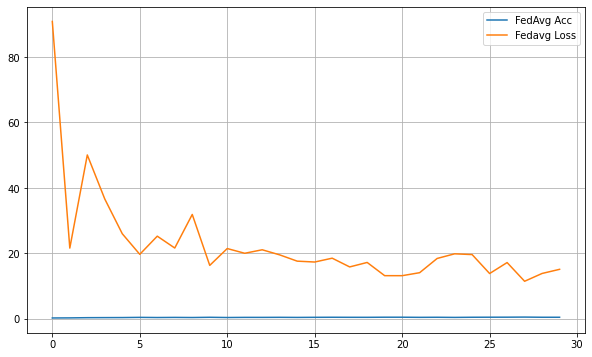

In [4]:
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

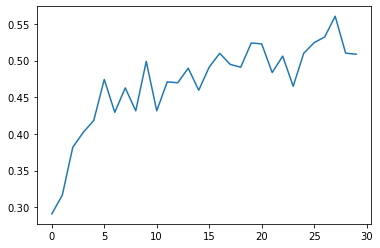

In [5]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [6]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.2908255566325452, 0.31637000002794796, 0.38171888780262736, 0.4021077804267407, 0.41832333480318384, 0.47423000079062244, 0.429467777411143, 0.4626844428479671, 0.43141666708721055, 0.498821111023426, 0.43147111294998064, 0.4709666654467583, 0.4697255578305986, 0.4895966674718591, 0.45955999948912196, 0.4911499984562397, 0.5098500016662809, 0.49477666748894594, 0.49091333366102646, 0.5239377786715825, 0.5227877767549621, 0.4836866680946615, 0.50603444567985, 0.464945556802882, 0.509816665864653, 0.5244766668313079, 0.5321411112944285, 0.5604611116151016, 0.5101333333386315, 0.5086455560392803] 

[90.85477025376427, 21.63735234869851, 50.083041057984026, 36.62273561623362, 26.02012562486861, 19.72815724015236, 25.2763911485672, 21.656328246328567, 31.907831150955626, 16.35238247579998, 21.49794149465031, 20.052028458648255, 21.120103712876638, 19.563329126437505, 17.64574949675136, 17.380112412903042, 18.554056630531946, 15.88294101556142, 17.250071723593607, 13.212968956761891, 13.2

# FedSGD

In [7]:
acc0 = [[], [0.2703999876976013, 0.10000000149011612, 0.25060001015663147, 0.4481000006198883, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3944999873638153, 0.5145000219345093, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4059999883174896, 0.2782999873161316, 0.17069999873638153, 0.10000000149011612, 0.28200000524520874, 0.18790000677108765, 0.41659998893737793, 0.10000000149011612, 0.2842999994754791, 0.10000000149011612, 0.2784999907016754, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.21130000054836273, 0.36250001192092896, 0.10000000149011612, 0.48100000619888306, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3732999861240387, 0.10000000149011612, 0.3228999972343445, 0.45080000162124634, 0.10000000149011612, 0.19349999725818634, 0.28189998865127563, 0.10000000149011612, 0.4124000072479248, 0.3018999993801117, 0.10000000149011612, 0.10000000149011612, 0.3043000102043152, 0.3846000134944916, 0.42179998755455017, 0.10000000149011612, 0.3774999976158142, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.1745000034570694, 0.21549999713897705, 0.3763999938964844, 0.3384999930858612, 0.10000000149011612, 0.3806000053882599, 0.10000000149011612, 0.10000000149011612, 0.37290000915527344, 0.3813000023365021, 0.2865000069141388, 0.19760000705718994, 0.10000000149011612, 0.3160000145435333, 0.3357999920845032, 0.10000000149011612, 0.36899998784065247, 0.10379999876022339, 0.10140000283718109, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29589998722076416, 0.3084000051021576, 0.30239999294281006, 0.2818000018596649, 0.24199999868869781], [0.498199999332428, 0.10000000149011612, 0.3828999996185303, 0.2720000147819519, 0.24529999494552612, 0.10000000149011612, 0.5284000039100647, 0.10000000149011612, 0.367000013589859, 0.10000000149011612, 0.10000000149011612, 0.4106999933719635, 0.4065000116825104, 0.4754999876022339, 0.5465999841690063, 0.29269999265670776, 0.4551999866962433, 0.10000000149011612, 0.40939998626708984, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.4050999879837036, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.3675000071525574, 0.33570000529289246, 0.2890999913215637, 0.4180999994277954, 0.3856000006198883, 0.3882000148296356, 0.10000000149011612, 0.5271000266075134, 0.10000000149011612, 0.10000000149011612, 0.3853999972343445, 0.10000000149011612, 0.15160000324249268, 0.10000000149011612, 0.3653999865055084, 0.25780001282691956, 0.10000000149011612, 0.40860000252723694, 0.10000000149011612, 0.5511000156402588, 0.3986000120639801, 0.43470001220703125, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4587000012397766, 0.3815999925136566, 0.10000000149011612, 0.49779999256134033], [0.5554999709129333, 0.5026000142097473, 0.46869999170303345, 0.10000000149011612, 0.5152000188827515, 0.10000000149011612, 0.550599992275238, 0.26249998807907104, 0.5065000057220459, 0.5327000021934509, 0.5, 0.47679999470710754, 0.5333999991416931, 0.10000000149011612, 0.5160999894142151, 0.33489999175071716, 0.45399999618530273, 0.10000000149011612, 0.4309999942779541, 0.12470000237226486, 0.4740999937057495, 0.10000000149011612, 0.10000000149011612, 0.49889999628067017, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1867000013589859, 0.2759000062942505, 0.382999986410141], [0.47749999165534973, 0.10000000149011612, 0.10000000149011612, 0.5163999795913696, 0.3140999972820282, 0.5037000179290771, 0.10000000149011612, 0.5141000151634216, 0.53329998254776, 0.10000000149011612, 0.10000000149011612, 0.41999998688697815, 0.448199987411499, 0.43810001015663147, 0.5820000171661377, 0.10000000149011612, 0.10000000149011612, 0.4848000109195709, 0.5091999769210815, 0.10000000149011612, 0.10000000149011612, 0.40880000591278076, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5389000177383423, 0.49410000443458557, 0.10000000149011612, 0.35519999265670776, 0.10000000149011612], [0.5131999850273132, 0.349700003862381, 0.2662999927997589, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5189999938011169, 0.6007999777793884, 0.10000000149011612, 0.49079999327659607, 0.10000000149011612, 0.4357999861240387, 0.10000000149011612, 0.10000000149011612, 0.5827000141143799, 0.10000000149011612, 0.10000000149011612, 0.5022000074386597, 0.10000000149011612, 0.10000000149011612, 0.5478000044822693, 0.5810999870300293, 0.4569999873638153, 0.5041000247001648, 0.10000000149011612, 0.10000000149011612, 0.519599974155426, 0.44530001282691956, 0.10000000149011612, 0.42660000920295715], [0.10000000149011612, 0.10000000149011612, 0.11800000071525574, 0.567799985408783, 0.6047999858856201, 0.10000000149011612, 0.5932000279426575, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5494999885559082, 0.4032999873161316, 0.10000000149011612, 0.5501000285148621, 0.10000000149011612, 0.4235000014305115, 0.5396999716758728, 0.41359999775886536, 0.51910001039505, 0.10029999911785126, 0.4041000008583069, 0.534500002861023, 0.49079999327659607, 0.6262999773025513, 0.15880000591278076, 0.13210000097751617, 0.10000000149011612, 0.5170000195503235, 0.10000000149011612, 0.10000000149011612], [0.6322000026702881, 0.4684999883174896, 0.4481000006198883, 0.6044999957084656, 0.10000000149011612, 0.4657999873161316, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6051999926567078, 0.10000000149011612, 0.17139999568462372, 0.5927000045776367, 0.10000000149011612, 0.6018000245094299, 0.6471999883651733, 0.37279999256134033, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.27469998598098755, 0.4401000142097473, 0.40299999713897705, 0.560699999332428, 0.10000000149011612, 0.6692000031471252, 0.36959999799728394], [0.5623999834060669, 0.10000000149011612, 0.605400025844574, 0.4973999857902527, 0.5541999936103821, 0.47940000891685486, 0.6098999977111816, 0.1046999990940094, 0.6147000193595886, 0.6176999807357788, 0.10000000149011612, 0.5813999772071838, 0.10000000149011612, 0.6453999876976013, 0.5758000016212463, 0.6230999827384949, 0.5800999999046326, 0.4657000005245209, 0.5194000005722046, 0.48590001463890076, 0.507099986076355, 0.6104000210762024, 0.5230000019073486, 0.49160000681877136, 0.3562000095844269, 0.5485000014305115, 0.5192999839782715, 0.10000000149011612, 0.35920000076293945, 0.45809999108314514], [0.6086999773979187, 0.10000000149011612, 0.6643000245094299, 0.10000000149011612, 0.4106000065803528, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4505999982357025, 0.6434000134468079, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.546999990940094, 0.6133999824523926, 0.10000000149011612, 0.5784000158309937, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6735000014305115, 0.10000000149011612, 0.5537999868392944, 0.6820999979972839, 0.6197999715805054, 0.10000000149011612, 0.10000000149011612, 0.695900022983551, 0.6794000267982483, 0.6491000056266785], [0.5893999934196472, 0.10000000149011612, 0.4763000011444092, 0.5249999761581421, 0.4950999915599823, 0.10000000149011612, 0.7214000225067139, 0.47029998898506165, 0.10000000149011612, 0.5504999756813049, 0.10000000149011612, 0.531000018119812, 0.6136000156402588, 0.10000000149011612, 0.5810999870300293, 0.10010000318288803, 0.10000000149011612, 0.6169000267982483, 0.6449000239372253, 0.5958999991416931, 0.10000000149011612, 0.5260999798774719, 0.5861999988555908, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5735999941825867, 0.45339998602867126, 0.5117999911308289], [0.6653000116348267, 0.6402999758720398, 0.10000000149011612, 0.5593000054359436, 0.617900013923645, 0.696399986743927, 0.635699987411499, 0.6348000168800354, 0.4424000084400177, 0.10000000149011612, 0.5587000250816345, 0.10000000149011612, 0.10000000149011612, 0.5860999822616577, 0.5938000082969666, 0.5983999967575073, 0.6783000230789185, 0.6279000043869019, 0.6859999895095825, 0.6919000148773193, 0.6315000057220459, 0.10000000149011612, 0.10000000149011612, 0.6633999943733215, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.6144999861717224, 0.49950000643730164, 0.5040000081062317], [0.6654000282287598, 0.10209999978542328, 0.593500018119812, 0.6952000260353088, 0.10000000149011612, 0.5005000233650208, 0.10000000149011612, 0.4634999930858612, 0.10000000149011612, 0.6444000005722046, 0.6531000137329102, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5327000021934509, 0.10000000149011612, 0.6166999936103821, 0.637499988079071, 0.10000000149011612, 0.6509000062942505, 0.6492999792098999, 0.5627999901771545, 0.10000000149011612, 0.16910000145435333, 0.6373999714851379, 0.6342999935150146, 0.4632999897003174, 0.6168000102043152, 0.6488000154495239, 0.10010000318288803], [0.5612000226974487, 0.10000000149011612, 0.5953999757766724, 0.19789999723434448, 0.5985999703407288, 0.10000000149011612, 0.6114000082015991, 0.6830999851226807, 0.43860000371932983, 0.10000000149011612, 0.7005000114440918, 0.6703000068664551, 0.5735999941825867, 0.6395999789237976, 0.6963000297546387, 0.5964999794960022, 0.6432999968528748, 0.613099992275238, 0.6154000163078308, 0.6557000279426575, 0.10000000149011612, 0.6200000047683716, 0.5342000126838684, 0.6826000213623047, 0.10000000149011612, 0.6399999856948853, 0.6672000288963318, 0.10000000149011612, 0.6233000159263611, 0.10000000149011612], [0.10000000149011612, 0.6976000070571899, 0.7099999785423279, 0.6288999915122986, 0.6988999843597412, 0.5927000045776367, 0.691100001335144, 0.7111999988555908, 0.6952000260353088, 0.5048999786376953, 0.10000000149011612, 0.6578999757766724, 0.10000000149011612, 0.7275999784469604, 0.10000000149011612, 0.6590999960899353, 0.5557000041007996, 0.5598999857902527, 0.5515999794006348, 0.6876999735832214, 0.10040000081062317, 0.7049999833106995, 0.10000000149011612, 0.6671000123023987, 0.6347000002861023, 0.10000000149011612, 0.2046000063419342, 0.10000000149011612, 0.6671000123023987, 0.10000000149011612], [0.6011999845504761, 0.47920000553131104, 0.6825000047683716, 0.10000000149011612, 0.6593000292778015, 0.1005999967455864, 0.7231000065803528, 0.10000000149011612, 0.6908000111579895, 0.10000000149011612, 0.10000000149011612, 0.4185999929904938, 0.10000000149011612, 0.7121999859809875, 0.7024999856948853, 0.683899998664856, 0.10000000149011612, 0.6966999769210815, 0.6705999970436096, 0.6739000082015991, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5953999757766724, 0.10000000149011612, 0.10000000149011612, 0.5073999762535095, 0.7208999991416931, 0.10000000149011612], [0.6930999755859375, 0.5248000025749207, 0.669700026512146, 0.24580000340938568, 0.6151000261306763, 0.6176000237464905, 0.6132000088691711, 0.10000000149011612, 0.5913000106811523, 0.6869999766349792, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5647000074386597, 0.6521999835968018, 0.6554999947547913, 0.18000000715255737, 0.10000000149011612, 0.6746000051498413, 0.7103999853134155, 0.604200005531311, 0.6898000240325928, 0.10010000318288803, 0.6514999866485596, 0.10360000282526016, 0.7149999737739563, 0.647599995136261, 0.6309999823570251, 0.6736000180244446, 0.6542999744415283], [0.7059000134468079, 0.6705999970436096, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6446999907493591, 0.2451999932527542, 0.10000000149011612, 0.7287999987602234, 0.5142999887466431, 0.6434000134468079, 0.6796000003814697, 0.5468000173568726, 0.623199999332428, 0.65420001745224, 0.6708999872207642, 0.10000000149011612, 0.6930000185966492, 0.6870999932289124, 0.7170000076293945, 0.6965000033378601, 0.6758000254631042, 0.5932999849319458, 0.10000000149011612, 0.10000000149011612, 0.6868000030517578, 0.6190999746322632, 0.10000000149011612, 0.10000000149011612, 0.588699996471405], [0.7127000093460083, 0.11330000311136246, 0.10000000149011612, 0.6897000074386597, 0.5580999851226807, 0.6463000178337097, 0.5597000122070312, 0.10170000046491623, 0.6901000142097473, 0.6067000031471252, 0.6707000136375427, 0.5027999877929688, 0.6735000014305115, 0.7458999752998352, 0.29499998688697815, 0.7171000242233276, 0.7074999809265137, 0.10000000149011612, 0.6430000066757202, 0.1347000002861023, 0.10000000149011612, 0.5720999836921692, 0.6776000261306763, 0.6093999743461609, 0.6783999800682068, 0.10000000149011612, 0.6586999893188477, 0.6103000044822693, 0.10000000149011612, 0.6891000270843506], [0.6572999954223633, 0.10000000149011612, 0.669700026512146, 0.7190999984741211, 0.6808000206947327, 0.6718999743461609, 0.6804999709129333, 0.23160000145435333, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508, 0.7045999765396118, 0.6880999803543091, 0.6152999997138977, 0.7038000226020813, 0.5716999769210815, 0.6019999980926514, 0.6743000149726868, 0.6904000043869019, 0.10010000318288803, 0.5960000157356262, 0.10000000149011612, 0.708299994468689, 0.10000000149011612, 0.6793000102043152, 0.6328999996185303, 0.6510000228881836, 0.10000000149011612, 0.6592000126838684, 0.6129999756813049], [0.41350001096725464, 0.12520000338554382, 0.6660000085830688, 0.1582999974489212, 0.10000000149011612, 0.10000000149011612, 0.633899986743927, 0.10000000149011612, 0.10000000149011612, 0.6284000277519226, 0.10000000149011612, 0.6011000275611877, 0.6570000052452087, 0.1265999972820282, 0.7148000001907349, 0.10000000149011612, 0.6365000009536743, 0.6690999865531921, 0.10000000149011612, 0.7368000149726868, 0.22429999709129333, 0.5799000263214111, 0.707099974155426, 0.10000000149011612, 0.421999990940094, 0.6363999843597412, 0.10000000149011612, 0.2371000051498413, 0.7276999950408936, 0.6256999969482422], [0.6777999997138977, 0.6575000286102295, 0.5439000129699707, 0.13750000298023224, 0.5709999799728394, 0.10000000149011612, 0.6258000135421753, 0.5835000276565552, 0.7132999897003174, 0.23559999465942383, 0.6394000053405762, 0.5198000073432922, 0.6805999875068665, 0.10000000149011612, 0.6901999711990356, 0.10010000318288803, 0.10019999742507935, 0.10080000013113022, 0.6532999873161316, 0.3937999904155731, 0.7170000076293945, 0.10000000149011612, 0.7214000225067139, 0.6175000071525574, 0.10000000149011612, 0.6485999822616577, 0.6463000178337097, 0.6549000144004822, 0.6794999837875366, 0.6800000071525574], [0.7407000064849854, 0.5260000228881836, 0.7185999751091003, 0.6807000041007996, 0.7067999839782715, 0.6873999834060669, 0.7070000171661377, 0.692300021648407, 0.22120000422000885, 0.6790000200271606, 0.10000000149011612, 0.12680000066757202, 0.6937999725341797, 0.6751000285148621, 0.7394000291824341, 0.10000000149011612, 0.618399977684021, 0.10090000182390213, 0.16689999401569366, 0.20329999923706055, 0.6984999775886536, 0.6362000107765198, 0.640999972820282, 0.7384999990463257, 0.10010000318288803, 0.6003000140190125, 0.10000000149011612, 0.6520000100135803, 0.2386000007390976, 0.10000000149011612], [0.6331999897956848, 0.1525000035762787, 0.6773999929428101, 0.10000000149011612, 0.6972000002861023, 0.7368999719619751, 0.7211999893188477, 0.10050000250339508, 0.6564000248908997, 0.7021999955177307, 0.6955999732017517, 0.10000000149011612, 0.6191999912261963, 0.10000000149011612, 0.7124000191688538, 0.20090000331401825, 0.7074999809265137, 0.10000000149011612, 0.5708000063896179, 0.6550999879837036, 0.10000000149011612, 0.6938999891281128, 0.10000000149011612, 0.6377999782562256, 0.10000000149011612, 0.6366000175476074, 0.7006000280380249, 0.1858000010251999, 0.6639999747276306, 0.17919999361038208], [0.10000000149011612, 0.10000000149011612, 0.6251000165939331, 0.6976000070571899, 0.7074000239372253, 0.10000000149011612, 0.11100000143051147, 0.677299976348877, 0.5971999764442444, 0.7468000054359436, 0.717199981212616, 0.6413999795913696, 0.5370000004768372, 0.7059000134468079, 0.588100016117096, 0.6288999915122986, 0.10000000149011612, 0.10000000149011612, 0.1039000004529953, 0.5922999978065491, 0.10000000149011612, 0.7056000232696533, 0.11479999870061874, 0.7276999950408936, 0.6938999891281128, 0.6783000230789185, 0.6765000224113464, 0.6947000026702881, 0.7454000115394592, 0.6909999847412109], [0.5497999787330627, 0.10000000149011612, 0.10010000318288803, 0.5713000297546387, 0.7501999735832214, 0.1899999976158142, 0.7085000276565552, 0.6949999928474426, 0.10000000149011612, 0.10000000149011612, 0.6371999979019165, 0.10080000013113022, 0.10559999942779541, 0.6980000138282776, 0.18950000405311584, 0.7276999950408936, 0.7031000256538391, 0.2563999891281128, 0.7049999833106995, 0.10000000149011612, 0.7103999853134155, 0.6437000036239624, 0.6567000150680542, 0.21410000324249268, 0.18050000071525574, 0.5303000211715698, 0.5745000243186951, 0.7124999761581421, 0.10000000149011612, 0.7103999853134155], [0.7465000152587891, 0.7451000213623047, 0.16009999811649323, 0.5351999998092651, 0.7049999833106995, 0.6621999740600586, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7005000114440918, 0.7091000080108643, 0.6456999778747559, 0.7401999831199646, 0.6154999732971191, 0.10010000318288803, 0.660099983215332, 0.7202000021934509, 0.6358000040054321, 0.10000000149011612, 0.6546000242233276, 0.6082000136375427, 0.7062000036239624, 0.6843000054359436, 0.10000000149011612, 0.4352000057697296, 0.10000000149011612, 0.6114000082015991, 0.6327000260353088, 0.18490000069141388, 0.6908000111579895], [0.12039999663829803, 0.6409000158309937, 0.708299994468689, 0.4973999857902527, 0.10000000149011612, 0.7128000259399414, 0.6891000270843506, 0.10000000149011612, 0.10000000149011612, 0.2563999891281128, 0.6965000033378601, 0.6783999800682068, 0.6840999722480774, 0.7264999747276306, 0.670199990272522, 0.19179999828338623, 0.6935999989509583, 0.7236999869346619, 0.10000000149011612, 0.6980999708175659, 0.10000000149011612, 0.6126999855041504, 0.10130000114440918, 0.12099999934434891, 0.10000000149011612, 0.670799970626831, 0.10000000149011612, 0.1054999977350235, 0.10000000149011612, 0.6467999815940857]]
loss0 = [[], [2.0100207328796387, 47.13420104980469, 2.2035374641418457, 2.116039752960205, 2.8576419353485107, 3.3849949836730957, 2.4224061965942383, 11.588640213012695, 2.2517881393432617, 1.9488013982772827, 1.6851543188095093, 51.71148681640625, 12.628052711486816, 5.2867536544799805, 3.8094875812530518, 2.0118634700775146, 2.161914825439453, 2.243054151535034, 3.5843844413757324, 2.2007932662963867, 2.288726568222046, 1.8769763708114624, 12.598820686340332, 2.3533670902252197, 58.41397476196289, 2.104139566421509, 2.449913740158081, 21.067707061767578, 20.096548080444336, 5.386281490325928], [15.502620697021484, 2.398296356201172, 2.0997915267944336, 23.423290252685547, 1.7246668338775635, 27.480253219604492, 2.269171953201294, 17.437522888183594, 56.3253059387207, 13.620357513427734, 41.15570831298828, 1.8229097127914429, 3.139503002166748, 2.0905184745788574, 2.0496904850006104, 14.064934730529785, 2.683966636657715, 2.1031334400177, 14.207767486572266, 2.017239809036255, 2.025230646133423, 24.509140014648438, 31.500730514526367, 1.9073446989059448, 1.9996953010559082, 2.0475635528564453, 8.179054260253906, 2.060615062713623, 14.624676704406738, 20.720232009887695], [15.923782348632812, 2.7598981857299805, 2.186284303665161, 2.017920970916748, 1.8875027894973755, 30.463327407836914, 1.7586642503738403, 26.199291229248047, 59.14765548706055, 1.8368914127349854, 1.8157503604888916, 2.1183080673217773, 2.385369300842285, 10.436573028564453, 2.056443691253662, 1.994438886642456, 62.37636947631836, 1.8639439344406128, 3.8595340251922607, 2.8923327922821045, 79.30783081054688, 21.902822494506836, 37.8603401184082, 30.16303825378418, 6.354525566101074, 2.1384620666503906, 1.884907841682434, 1.8025033473968506, 1.974695086479187, 2.093248128890991], [1.5163062810897827, 3.704312801361084, 1.7273361682891846, 1.959554672241211, 3.1758134365081787, 7.490743160247803, 1.640718936920166, 37.88285446166992, 1.888435959815979, 40.41812515258789, 14.831460952758789, 1.5604311227798462, 1.845723032951355, 1.7374414205551147, 1.7346361875534058, 1.8774404525756836, 1.618167519569397, 6.158493995666504, 1.675194501876831, 13.533415794372559, 16.227693557739258, 5.793850898742676, 6.441806316375732, 52.955013275146484, 6.9226274490356445, 53.15084457397461, 5.8906378746032715, 1.7942121028900146, 54.571861267089844, 74.37527465820312], [26.047571182250977, 1.8705908060073853, 2.583470106124878, 7.059873580932617, 1.70811128616333, 1.7677172422409058, 1.9486802816390991, 49.148101806640625, 1.7405400276184082, 25.593149185180664, 17.469600677490234, 1.736638069152832, 33.838809967041016, 2.977128028869629, 45.02233123779297, 2.0962979793548584, 5.734548091888428, 16.793664932250977, 1.638763666152954, 11.62435531616211, 1.3307276964187622, 1.5560442209243774, 2.121048927307129, 71.0849380493164, 30.865671157836914, 33.71051025390625, 1.7184330224990845, 1.5940310955047607, 39.10601043701172, 1.4398102760314941], [1.3585695028305054, 1.3496041297912598, 1.5656124353408813, 28.15792465209961, 1.6494392156600952, 39.3716926574707, 1.3684865236282349, 1.9293675422668457, 1.3650848865509033, 1.247165322303772, 1.5024175643920898, 1.6929301023483276, 1.4702929258346558, 6.489282608032227, 1.5315570831298828, 1.9460978507995605, 1.4161239862442017, 85.59481048583984, 1.7206239700317383, 5.3233642578125, 1.6703517436981201, 23.742586135864258, 40.146175384521484, 1.5842941999435425, 12.782938003540039, 9.78543472290039, 10.983211517333984, 3.0211474895477295, 2.6645448207855225, 1.8562275171279907], [1.7610456943511963, 39.09495162963867, 39.28746032714844, 1.4829086065292358, 2.346831798553467, 1.556099534034729, 36.5992546081543, 1.3786793947219849, 2.2897846698760986, 10.506218910217285, 13.132892608642578, 1.622963309288025, 1.3945419788360596, 1.7092077732086182, 1.1119027137756348, 22.794965744018555, 34.546810150146484, 1.7218601703643799, 1.4181256294250488, 74.6461410522461, 35.602996826171875, 2.6914472579956055, 16.232555389404297, 30.750797271728516, 37.65596389770508, 1.3445253372192383, 1.579938292503357, 17.27623176574707, 2.0658137798309326, 48.1810302734375], [1.5328128337860107, 1.8963576555252075, 3.3947012424468994, 22.584224700927734, 6.283109188079834, 23.071819305419922, 1.5735738277435303, 1.1495479345321655, 13.226273536682129, 1.4575607776641846, 43.62710189819336, 1.7859851121902466, 40.17133712768555, 28.767581939697266, 1.2553764581680298, 12.68024730682373, 24.803762435913086, 1.7434203624725342, 4.955179214477539, 59.70977020263672, 1.513899564743042, 1.286833643913269, 1.5025544166564941, 1.5032871961593628, 27.65605354309082, 6.48695707321167, 1.2958106994628906, 1.6767802238464355, 26.84461784362793, 3.0916237831115723], [49.67235565185547, 57.82248306274414, 2.719644546508789, 1.248685598373413, 1.1569874286651611, 29.9859619140625, 1.2555960416793823, 4.51465368270874, 63.3848876953125, 31.60335922241211, 1.315994143486023, 1.5754742622375488, 91.7967758178711, 1.2512502670288086, 45.84764862060547, 1.5226659774780273, 1.1952706575393677, 1.6694419384002686, 1.2950228452682495, 3.000699043273926, 1.4524157047271729, 1.3092020750045776, 1.3766555786132812, 1.2990325689315796, 4.489473819732666, 4.544047832489014, 50.60429000854492, 1.3149234056472778, 5.485727787017822, 35.83032989501953], [1.3338242769241333, 2.7240564823150635, 1.79971444606781, 1.1951074600219727, 35.753517150878906, 1.3201045989990234, 21.399600982666016, 22.124675750732422, 32.663272857666016, 13.144027709960938, 1.211334228515625, 22.8065185546875, 4.333558082580566, 1.3452547788619995, 32.021751403808594, 1.3351848125457764, 1.0943485498428345, 2.445338726043701, 29.564380645751953, 24.112171173095703, 24.011722564697266, 64.11479949951172, 41.38800811767578, 3.710573434829712, 2.79329514503479, 2.2707040309906006, 1.3619344234466553, 61.58159255981445, 1.1499135494232178, 3.424260139465332], [1.5209102630615234, 17.039783477783203, 1.1355918645858765, 1.5006046295166016, 1.1902259588241577, 1.781942367553711, 1.272911548614502, 4.584591865539551, 1.1007493734359741, 1.259716510772705, 82.97444915771484, 1.2817312479019165, 8.944445610046387, 1.2672837972640991, 1.1852879524230957, 1.1892746686935425, 1.2742985486984253, 1.4036322832107544, 2.5262198448181152, 1.672914981842041, 1.8455559015274048, 1.2397806644439697, 1.2361847162246704, 1.3981434106826782, 3.587799310684204, 1.2738301753997803, 1.2575998306274414, 14.008240699768066, 2.0882012844085693, 1.7460732460021973], [1.4318499565124512, 38.896602630615234, 0.9547166228294373, 11.168702125549316, 2.1423285007476807, 43.33613586425781, 59.52059555053711, 29.536022186279297, 3.664017677307129, 1.2174142599105835, 37.45116424560547, 36.45414352416992, 10.958130836486816, 1.6335608959197998, 1.1803429126739502, 43.93453598022461, 1.197698712348938, 15.759415626525879, 29.936237335205078, 20.87997055053711, 1.0098068714141846, 17.63364028930664, 2.1639952659606934, 0.9783135056495667, 1.0521855354309082, 14.486913681030273, 57.70138168334961, 0.834082841873169, 0.9365469813346863, 0.9449308514595032], [1.1054221391677856, 19.91744041442871, 1.4179474115371704, 1.2983760833740234, 1.4034080505371094, 22.440933227539062, 0.8579222559928894, 1.766709327697754, 5.838688850402832, 1.6279964447021484, 4.037435531616211, 1.2908120155334473, 1.508177399635315, 49.831878662109375, 1.1032062768936157, 11.926185607910156, 7.6372575759887695, 1.1363178491592407, 1.1184521913528442, 1.1232999563217163, 37.574974060058594, 1.2958890199661255, 1.1820056438446045, 56.17283248901367, 28.408639907836914, 16.335289001464844, 24.138608932495117, 1.38848078250885, 3.6056206226348877, 1.3709101676940918], [0.9090631604194641, 1.082676649093628, 25.96885108947754, 2.2233774662017822, 1.0548816919326782, 0.8279198408126831, 1.0118026733398438, 0.9927436709403992, 1.8558982610702515, 23.410320281982422, 1.1850842237472534, 24.948898315429688, 68.6600112915039, 1.1703660488128662, 1.195621132850647, 1.117664098739624, 0.8699158430099487, 1.4056119918823242, 0.8900533318519592, 0.9523680806159973, 1.0648584365844727, 42.50897216796875, 27.961387634277344, 1.1669163703918457, 29.01829719543457, 16.024580001831055, 37.93608474731445, 1.0616812705993652, 1.352575659751892, 1.3520785570144653], [0.9541935324668884, 12.105658531188965, 1.7151265144348145, 0.9618311524391174, 20.034536361694336, 2.170668125152588, 11.086631774902344, 1.7705026865005493, 19.197296142578125, 1.023747444152832, 1.0686140060424805, 11.883131980895996, 35.53251647949219, 9.37872314453125, 1.532585620880127, 39.43754196166992, 1.1091300249099731, 1.1100163459777832, 18.943893432617188, 1.0455621480941772, 1.1859252452850342, 1.589796543121338, 18.48111343383789, 4.983364105224609, 1.145098328590393, 1.0955108404159546, 2.705354690551758, 1.4368367195129395, 1.0567995309829712, 9.482773780822754], [1.1769884824752808, 7.426908016204834, 1.1728492975234985, 3.6075069904327393, 0.9818683862686157, 15.40791130065918, 1.0405802726745605, 0.8962290287017822, 2.4737260341644287, 44.92580795288086, 0.9597649574279785, 0.9624339938163757, 1.3051313161849976, 0.968037486076355, 0.8715882897377014, 1.6706503629684448, 1.1016082763671875, 1.087908148765564, 1.0361872911453247, 0.9762209057807922, 10.970250129699707, 1.0578687191009521, 2.200751304626465, 0.9522334933280945, 21.200571060180664, 1.031912088394165, 0.9337238073348999, 23.8172664642334, 0.9569845795631409, 75.59883117675781], [26.27808380126953, 0.975562334060669, 0.7985973954200745, 1.0128657817840576, 1.0397619009017944, 1.1746504306793213, 0.8409824371337891, 0.7926675081253052, 0.7779832482337952, 1.7892990112304688, 30.05845069885254, 0.9934860467910767, 21.479915618896484, 0.748567521572113, 21.493053436279297, 1.1088135242462158, 1.8694640398025513, 1.3666127920150757, 2.2213213443756104, 0.9586247801780701, 12.609090805053711, 0.932712972164154, 58.933223724365234, 0.9755091071128845, 1.2336909770965576, 22.93164825439453, 4.487310409545898, 33.31061553955078, 0.946753978729248, 23.443281173706055], [1.1535414457321167, 1.8454084396362305, 1.1079432964324951, 18.14442253112793, 1.2330938577651978, 8.561071395874023, 0.802361249923706, 20.11514663696289, 0.9097398519515991, 28.935487747192383, 8.874605178833008, 6.324882984161377, 57.661781311035156, 0.8472967743873596, 0.8705661296844482, 1.2494299411773682, 67.70559692382812, 0.8997191190719604, 1.002726674079895, 0.8976207971572876, 42.02614974975586, 14.727842330932617, 35.66384506225586, 36.98394775390625, 1.1423932313919067, 13.884190559387207, 27.870065689086914, 1.6381727457046509, 0.8832530975341797, 95.423583984375], [0.8579220771789551, 1.5675197839736938, 0.9803960919380188, 2.771477699279785, 1.9731812477111816, 1.0262367725372314, 1.5232725143432617, 30.269540786743164, 1.1092102527618408, 1.1429165601730347, 38.922645568847656, 20.542835235595703, 31.10651206970215, 1.3780683279037476, 1.100533127784729, 1.2521883249282837, 4.892371654510498, 20.48615264892578, 1.0509357452392578, 0.8575543165206909, 1.0548112392425537, 0.9486517310142517, 25.027114868164062, 0.9042676687240601, 14.880496978759766, 0.8957540988922119, 1.1231218576431274, 1.0807973146438599, 0.8418482542037964, 1.0362799167633057], [0.8249365091323853, 0.9483422636985779, 47.250980377197266, 66.56978607177734, 19.751197814941406, 0.9751747250556946, 5.229222774505615, 74.86956024169922, 0.8390242457389832, 1.3803049325942993, 1.0027190446853638, 0.9169954061508179, 3.01908016204834, 1.828456997871399, 0.9555130004882812, 1.0270274877548218, 53.38479995727539, 0.8997175693511963, 1.098073959350586, 0.8050973415374756, 0.9321677684783936, 0.939494252204895, 1.3898597955703735, 19.468505859375, 16.705060958862305, 0.8665861487388611, 1.3178095817565918, 24.729394912719727, 57.08106994628906, 1.4091674089431763], [0.9445816278457642, 10.93114185333252, 20.906755447387695, 1.0067414045333862, 1.9127695560455322, 0.9660750031471252, 1.3304219245910645, 6.84250020980835, 1.0195062160491943, 2.3036022186279297, 0.9905597567558289, 1.8176273107528687, 1.152800440788269, 0.7704243659973145, 2.613837957382202, 1.0135517120361328, 0.8696313500404358, 59.75127410888672, 1.3238157033920288, 7.1378092765808105, 73.84008026123047, 2.0444421768188477, 1.018249273300171, 1.150261640548706, 1.0506395101547241, 48.66934585571289, 1.0446256399154663, 1.1903159618377686, 34.6563606262207, 0.9014299511909485], [0.9920981526374817, 18.020606994628906, 0.9818597435951233, 0.7863763570785522, 0.9328398704528809, 0.9947991967201233, 0.8857423663139343, 4.559510707855225, 19.685396194458008, 20.6098575592041, 11.778159141540527, 1.4242788553237915, 0.8701785206794739, 0.9906340837478638, 0.821550190448761, 1.5697152614593506, 1.256970763206482, 0.9302393794059753, 0.9493703842163086, 9.973661422729492, 1.0419561862945557, 26.10654067993164, 0.8789949417114258, 41.209510803222656, 1.004375696182251, 0.9588910937309265, 0.9152745008468628, 11.779013633728027, 0.9215262532234192, 1.1788413524627686], [1.651044487953186, 8.634632110595703, 0.9917508959770203, 6.142386436462402, 50.43768310546875, 26.084609985351562, 2.070997953414917, 31.963027954101562, 29.171037673950195, 1.3946839570999146, 29.29450035095215, 1.427754521369934, 1.218076229095459, 10.945708274841309, 0.833710253238678, 13.717123031616211, 1.1003053188323975, 0.917919933795929, 7.530178070068359, 0.6925696134567261, 4.24675178527832, 1.7931814193725586, 0.829574704170227, 38.28162384033203, 4.547357559204102, 1.1292763948440552, 44.342403411865234, 6.6365766525268555, 1.139609456062317, 1.0868091583251953], [1.0042153596878052, 1.0204582214355469, 1.6975568532943726, 15.176223754882812, 1.2879835367202759, 14.10509204864502, 1.477997899055481, 1.3708726167678833, 0.7944369912147522, 4.983387470245361, 0.9882038235664368, 1.9455628395080566, 0.9013794660568237, 9.962228775024414, 0.8865764737129211, 15.351056098937988, 9.222715377807617, 11.69773006439209, 0.984035849571228, 6.15606689453125, 0.8594725728034973, 31.934444427490234, 0.8163107633590698, 1.1984776258468628, 44.10723876953125, 1.2354880571365356, 0.951870322227478, 0.9275462627410889, 0.9126619100570679, 1.1517248153686523], [0.7929771542549133, 1.6010189056396484, 0.753319501876831, 0.8553044199943542, 0.807059645652771, 0.8513815402984619, 0.8554975390434265, 0.9075682759284973, 4.634514331817627, 1.0020948648452759, 38.76020431518555, 16.52059555053711, 0.8413624167442322, 1.6166341304779053, 0.7570838928222656, 39.56691360473633, 1.155973196029663, 9.27696418762207, 9.9307279586792, 8.905840873718262, 0.8536012768745422, 1.5507234334945679, 0.980332612991333, 0.8358730673789978, 16.60186767578125, 1.719366431236267, 9.353326797485352, 1.0089950561523438, 5.356865406036377, 33.6405143737793], [1.2227181196212769, 9.94801139831543, 0.8802877068519592, 30.831581115722656, 0.8228464126586914, 0.7552202343940735, 0.7733944654464722, 16.063697814941406, 0.9994961619377136, 0.8318637609481812, 0.8825541138648987, 44.73094940185547, 1.1404144763946533, 34.0782356262207, 1.175784707069397, 7.397940635681152, 0.956797182559967, 46.51532745361328, 2.364664077758789, 1.5243927240371704, 38.60067367553711, 1.0250352621078491, 15.519415855407715, 1.6829285621643066, 58.01065444946289, 0.943217396736145, 0.9073382019996643, 3.793955087661743, 1.1799429655075073, 5.317718982696533], [18.52412986755371, 31.76432228088379, 1.218078374862671, 1.1298809051513672, 0.7692912220954895, 23.289966583251953, 9.034820556640625, 1.1841883659362793, 1.146065592765808, 0.8060801029205322, 0.7587687373161316, 0.9000975489616394, 1.285879135131836, 0.8529975414276123, 1.5848093032836914, 0.9814595580101013, 26.045570373535156, 15.149230003356934, 12.373177528381348, 2.2820935249328613, 21.264863967895508, 0.7682141661643982, 11.217093467712402, 0.837923526763916, 0.8932645320892334, 0.8475965857505798, 1.4241465330123901, 0.8355754613876343, 0.6880170702934265, 0.982657790184021], [1.272567629814148, 47.12486267089844, 14.2555513381958, 1.504699468612671, 0.6746821999549866, 6.12130069732666, 0.8176842927932739, 0.8664125800132751, 27.73971176147461, 37.34693145751953, 1.094533085823059, 6.623864650726318, 8.058436393737793, 0.842416524887085, 8.342939376831055, 0.8723292946815491, 0.881176769733429, 7.36222505569458, 0.8187161684036255, 19.647106170654297, 0.7913522720336914, 0.9017945528030396, 0.9005922079086304, 6.549315452575684, 4.6113739013671875, 1.6170791387557983, 1.3641834259033203, 1.0503604412078857, 32.64451599121094, 0.8043366074562073], [0.7207146883010864, 0.7114283442497253, 11.552058219909668, 1.9400891065597534, 0.860571563243866, 0.977699875831604, 27.723106384277344, 26.257749557495117, 32.77433776855469, 0.8264077305793762, 0.8279908299446106, 1.048146367073059, 0.803451657295227, 1.940110206604004, 7.440074443817139, 1.0205830335617065, 0.7804756760597229, 1.5812114477157593, 54.995513916015625, 1.1357041597366333, 1.1965396404266357, 0.9084019660949707, 0.9450216889381409, 53.284889221191406, 4.042373180389404, 22.535472869873047, 1.3520294427871704, 1.7647744417190552, 8.800505638122559, 0.8848493099212646], [9.379030227661133, 0.9973167181015015, 0.7513502836227417, 1.6514302492141724, 38.3785514831543, 0.9484416246414185, 0.953302264213562, 37.5327262878418, 29.432968139648438, 5.412380695343018, 0.8695984482765198, 0.9046213030815125, 0.9820055961608887, 0.8251688480377197, 1.023032307624817, 8.645349502563477, 0.8784770369529724, 1.637160062789917, 30.38289451599121, 0.9182000160217285, 21.69510841369629, 1.8050189018249512, 13.169496536254883, 15.153668403625488, 68.321044921875, 1.1093615293502808, 43.421268463134766, 15.804387092590332, 13.803812026977539, 1.223149061203003]] 

acc1 = [[], [0.10000000149011612, 0.10000000149011612, 0.22519999742507935, 0.28859999775886536, 0.10719999670982361, 0.10000000149011612, 0.10010000318288803, 0.29490000009536743, 0.20479999482631683, 0.1014999970793724, 0.10000000149011612, 0.29440000653266907, 0.17790000140666962, 0.10000000149011612, 0.2833999991416931, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19200000166893005, 0.10000000149011612, 0.3416000008583069, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29249998927116394, 0.2126999944448471, 0.10000000149011612, 0.10000000149011612, 0.2939000129699707, 0.38370001316070557], [0.1987999975681305, 0.10000000149011612, 0.4108999967575073, 0.35519999265670776, 0.10000000149011612, 0.32280001044273376, 0.10000000149011612, 0.41589999198913574, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11129999905824661, 0.1712999939918518, 0.10000000149011612, 0.10000000149011612, 0.20069999992847443, 0.10000000149011612, 0.21580000221729279, 0.4009000062942505, 0.10000000149011612, 0.1234000027179718, 0.38999998569488525, 0.22120000422000885, 0.10000000149011612, 0.13079999387264252, 0.3009999990463257, 0.10000000149011612, 0.33329999446868896, 0.35040000081062317, 0.10000000149011612], [0.2980000078678131, 0.10000000149011612, 0.35280001163482666, 0.10000000149011612, 0.4059000015258789, 0.32510000467300415, 0.23589999973773956, 0.3562999963760376, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.3472999930381775, 0.33309999108314514, 0.24160000681877136, 0.21619999408721924, 0.10000000149011612, 0.31940001249313354, 0.4000000059604645, 0.10000000149011612, 0.10000000149011612, 0.24040000140666962, 0.19169999659061432, 0.10000000149011612, 0.2955999970436096, 0.3783000111579895, 0.3813000023365021, 0.2680000066757202, 0.10000000149011612, 0.28600001335144043, 0.49239999055862427], [0.4318999946117401, 0.3395000100135803, 0.10000000149011612, 0.10270000249147415, 0.23929999768733978, 0.10000000149011612, 0.3921000063419342, 0.42640000581741333, 0.10000000149011612, 0.10000000149011612, 0.41019999980926514, 0.3100000023841858, 0.10000000149011612, 0.20990000665187836, 0.19840000569820404, 0.10000000149011612, 0.10000000149011612, 0.4300000071525574, 0.2953000068664551, 0.1046999990940094, 0.10000000149011612, 0.4203000068664551, 0.10000000149011612, 0.10000000149011612, 0.3077000081539154, 0.5342000126838684, 0.10000000149011612, 0.10000000149011612, 0.3215000033378601, 0.24199999868869781], [0.4661000072956085, 0.43939998745918274, 0.10000000149011612, 0.5180000066757202, 0.351500004529953, 0.10000000149011612, 0.10000000149011612, 0.3718000054359436, 0.45910000801086426, 0.38659998774528503, 0.38119998574256897, 0.4691999852657318, 0.10000000149011612, 0.23810000717639923, 0.3508000075817108, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4894999861717224, 0.37790000438690186, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.47040000557899475, 0.3573000133037567, 0.438400000333786, 0.475600004196167, 0.38960000872612], [0.1509000062942505, 0.32659998536109924, 0.35089999437332153, 0.48159998655319214, 0.34549999237060547, 0.10000000149011612, 0.38690000772476196, 0.40790000557899475, 0.34689998626708984, 0.48350000381469727, 0.10000000149011612, 0.21130000054836273, 0.4171999990940094, 0.41190001368522644, 0.10000000149011612, 0.38999998569488525, 0.3797999918460846, 0.57669997215271, 0.10000000149011612, 0.10000000149011612, 0.38659998774528503, 0.5942000150680542, 0.10000000149011612, 0.24410000443458557, 0.10000000149011612, 0.10000000149011612, 0.5049999952316284, 0.46950000524520874, 0.35030001401901245, 0.5209000110626221], [0.10000000149011612, 0.4458000063896179, 0.10000000149011612, 0.5843999981880188, 0.10000000149011612, 0.4478999972343445, 0.48170000314712524, 0.4945000112056732, 0.4244999885559082, 0.10000000149011612, 0.5509999990463257, 0.43869999051094055, 0.5658000111579895, 0.10000000149011612, 0.3659999966621399, 0.5568000078201294, 0.47679999470710754, 0.46540001034736633, 0.4595000147819519, 0.4837000072002411, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.391400009393692, 0.3725000023841858, 0.10000000149011612, 0.44449999928474426, 0.5235999822616577, 0.5325999855995178, 0.10000000149011612], [0.5364999771118164, 0.10000000149011612, 0.5192000269889832, 0.579800009727478, 0.45559999346733093, 0.10000000149011612, 0.10000000149011612, 0.5666000247001648, 0.10000000149011612, 0.5145000219345093, 0.10000000149011612, 0.3882000148296356, 0.5418000221252441, 0.43380001187324524, 0.18209999799728394, 0.48010000586509705, 0.47189998626708984, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.48730000853538513, 0.4950000047683716, 0.10000000149011612, 0.10000000149011612, 0.572700023651123, 0.10199999809265137, 0.10000000149011612, 0.12690000236034393, 0.10000000149011612, 0.5404000282287598], [0.5895000100135803, 0.10000000149011612, 0.5723000168800354, 0.349700003862381, 0.5612999796867371, 0.4977000057697296, 0.3928999900817871, 0.5289999842643738, 0.10000000149011612, 0.4717000126838684, 0.10000000149011612, 0.5936999917030334, 0.10000000149011612, 0.47200000286102295, 0.10000000149011612, 0.358599990606308, 0.34950000047683716, 0.10000000149011612, 0.5738999843597412, 0.5461000204086304, 0.4453999996185303, 0.5214999914169312, 0.10000000149011612, 0.10459999740123749, 0.5770999789237976, 0.5295000076293945, 0.10000000149011612, 0.5095000267028809, 0.6044999957084656, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.33889999985694885, 0.19820000231266022, 0.10000000149011612, 0.6693000197410583, 0.10000000149011612, 0.10000000149011612, 0.49149999022483826, 0.1096000000834465, 0.5027999877929688, 0.13899999856948853, 0.4830999970436096, 0.5504000186920166, 0.4530999958515167, 0.6432999968528748, 0.4805000126361847, 0.5134999752044678, 0.5444999933242798, 0.49950000643730164, 0.45879998803138733, 0.5763000249862671, 0.10000000149011612, 0.10000000149011612, 0.4828999936580658, 0.10000000149011612, 0.45410001277923584, 0.10000000149011612, 0.4999000132083893, 0.48410001397132874], [0.4943000078201294, 0.10000000149011612, 0.5382000207901001, 0.382099986076355, 0.5091999769210815, 0.3061000108718872, 0.6274999976158142, 0.10000000149011612, 0.6323999762535095, 0.49799999594688416, 0.4154999852180481, 0.5515999794006348, 0.10000000149011612, 0.10000000149011612, 0.4350999891757965, 0.5921000242233276, 0.5134999752044678, 0.4672999978065491, 0.5170000195503235, 0.5917999744415283, 0.48350000381469727, 0.5788999795913696, 0.10000000149011612, 0.5095000267028809, 0.10000000149011612, 0.5228000283241272, 0.10000000149011612, 0.5299000144004822, 0.10000000149011612, 0.6337000131607056], [0.10000000149011612, 0.6399000287055969, 0.5224000215530396, 0.5709999799728394, 0.10000000149011612, 0.6406000256538391, 0.10000000149011612, 0.6007999777793884, 0.6086999773979187, 0.5339999794960022, 0.659500002861023, 0.10000000149011612, 0.10000000149011612, 0.644599974155426, 0.10000000149011612, 0.10050000250339508, 0.5830000042915344, 0.4968000054359436, 0.10000000149011612, 0.5640000104904175, 0.10000000149011612, 0.5493999719619751, 0.34540000557899475, 0.10000000149011612, 0.542900025844574, 0.5200999975204468, 0.10000000149011612, 0.10000000149011612, 0.6043000221252441, 0.5246000289916992], [0.10000000149011612, 0.3416000008583069, 0.10000000149011612, 0.6306999921798706, 0.5667999982833862, 0.5870000123977661, 0.10000000149011612, 0.6757000088691711, 0.5910000205039978, 0.5615000128746033, 0.10000000149011612, 0.659600019454956, 0.5270000100135803, 0.10000000149011612, 0.10000000149011612, 0.6523000001907349, 0.5281999707221985, 0.5231000185012817, 0.4812999963760376, 0.10000000149011612, 0.6432999968528748, 0.10000000149011612, 0.10000000149011612, 0.6316999793052673, 0.6309999823570251, 0.628000020980835, 0.10000000149011612, 0.7195000052452087, 0.542900025844574, 0.5297999978065491], [0.6460000276565552, 0.5297999978065491, 0.567799985408783, 0.6287999749183655, 0.6812000274658203, 0.10000000149011612, 0.10000000149011612, 0.6022999882698059, 0.14869999885559082, 0.5619000196456909, 0.48330000042915344, 0.5954999923706055, 0.4327999949455261, 0.10000000149011612, 0.5695000290870667, 0.6427000164985657, 0.5315999984741211, 0.5072000026702881, 0.10000000149011612, 0.6169000267982483, 0.6935999989509583, 0.499099999666214, 0.505299985408783, 0.5813000202178955, 0.10040000081062317, 0.10000000149011612, 0.44279998540878296, 0.5884000062942505, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.5246999859809875, 0.10000000149011612, 0.10010000318288803, 0.595300018787384, 0.5604000091552734, 0.10000000149011612, 0.10000000149011612, 0.6572999954223633, 0.10000000149011612, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612, 0.49050000309944153, 0.613099992275238, 0.6771000027656555, 0.28459998965263367, 0.6431999802589417, 0.5157999992370605, 0.6585999727249146, 0.4456000030040741, 0.5900999903678894, 0.428600013256073, 0.608299970626831, 0.4781000018119812, 0.5885000228881836, 0.10000000149011612, 0.4918000102043152, 0.5491999983787537], [0.6848999857902527, 0.6671000123023987, 0.6133000254631042, 0.10000000149011612, 0.5802000164985657, 0.6518999934196472, 0.6845999956130981, 0.14920000731945038, 0.10000000149011612, 0.6474000215530396, 0.6438000202178955, 0.650600016117096, 0.6769999861717224, 0.10000000149011612, 0.5401999950408936, 0.2102999985218048, 0.10000000149011612, 0.6571000218391418, 0.5891000032424927, 0.6348000168800354, 0.6074000000953674, 0.10000000149011612, 0.5914999842643738, 0.10000000149011612, 0.10000000149011612, 0.6535000205039978, 0.10000000149011612, 0.6427000164985657, 0.4284999966621399, 0.10000000149011612], [0.5651999711990356, 0.10000000149011612, 0.5999000072479248, 0.5605000257492065, 0.44350001215934753, 0.579200029373169, 0.6097000241279602, 0.6133999824523926, 0.6668000221252441, 0.5895000100135803, 0.31839999556541443, 0.10019999742507935, 0.5389999747276306, 0.6883000135421753, 0.6446999907493591, 0.6028000116348267, 0.17270000278949738, 0.10029999911785126, 0.6643000245094299, 0.642300009727478, 0.10000000149011612, 0.10000000149011612, 0.5218999981880188, 0.4345000088214874, 0.10000000149011612, 0.10080000013113022, 0.6506999731063843, 0.5379999876022339, 0.17829999327659607, 0.597000002861023], [0.42739999294281006, 0.6987000107765198, 0.5601999759674072, 0.10000000149011612, 0.6172000169754028, 0.5662000179290771, 0.6973000168800354, 0.6340000033378601, 0.10000000149011612, 0.10000000149011612, 0.3822999894618988, 0.14810000360012054, 0.6924999952316284, 0.6656000018119812, 0.612500011920929, 0.10000000149011612, 0.48910000920295715, 0.10000000149011612, 0.6549000144004822, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2581999897956848, 0.6873000264167786, 0.6187999844551086, 0.5378000140190125, 0.10000000149011612, 0.6470000147819519, 0.690500020980835, 0.6610000133514404], [0.6834999918937683, 0.41519999504089355, 0.6485000252723694, 0.5728999972343445, 0.4553999900817871, 0.10000000149011612, 0.6298999786376953, 0.6924999952316284, 0.612500011920929, 0.6317999958992004, 0.6439999938011169, 0.10000000149011612, 0.10000000149011612, 0.10220000147819519, 0.5715000033378601, 0.61080002784729, 0.10000000149011612, 0.7120000123977661, 0.10040000081062317, 0.10000000149011612, 0.6248000264167786, 0.10429999977350235, 0.5604000091552734, 0.6467000246047974, 0.609499990940094, 0.10000000149011612, 0.3871999979019165, 0.5164999961853027, 0.6279000043869019, 0.5708000063896179], [0.11969999969005585, 0.32510000467300415, 0.5899999737739563, 0.675599992275238, 0.6819999814033508, 0.1720999926328659, 0.659600019454956, 0.10000000149011612, 0.5285999774932861, 0.6662999987602234, 0.6705999970436096, 0.10000000149011612, 0.40540000796318054, 0.6687999963760376, 0.6686000227928162, 0.5845999717712402, 0.6697999835014343, 0.6322000026702881, 0.5716000199317932, 0.6873999834060669, 0.5924999713897705, 0.6194999814033508, 0.6470000147819519, 0.26910001039505005, 0.5485000014305115, 0.10000000149011612, 0.7146000266075134, 0.10000000149011612, 0.6643999814987183, 0.10000000149011612], [0.6553000211715698, 0.621399998664856, 0.10000000149011612, 0.10010000318288803, 0.6682999730110168, 0.697700023651123, 0.5922999978065491, 0.6625999808311462, 0.6604999899864197, 0.6431000232696533, 0.4943000078201294, 0.1005999967455864, 0.10000000149011612, 0.6061999797821045, 0.6166999936103821, 0.6481999754905701, 0.10029999911785126, 0.7016000151634216, 0.7127000093460083, 0.6571000218391418, 0.10010000318288803, 0.4715999960899353, 0.6843000054359436, 0.6610000133514404, 0.5985999703407288, 0.10000000149011612, 0.10000000149011612, 0.6485000252723694, 0.6395999789237976, 0.12210000306367874], [0.6200000047683716, 0.6438000202178955, 0.6276999711990356, 0.10000000149011612, 0.7174000144004822, 0.5073000192642212, 0.6150000095367432, 0.10000000149011612, 0.646399974822998, 0.597100019454956, 0.7006999850273132, 0.6690000295639038, 0.6220999956130981, 0.6049000024795532, 0.4936999976634979, 0.6528000235557556, 0.7387999892234802, 0.10000000149011612, 0.6881999969482422, 0.10090000182390213, 0.26269999146461487, 0.10050000250339508, 0.5687000155448914, 0.6187999844551086, 0.4668000042438507, 0.6780999898910522, 0.6669999957084656, 0.10000000149011612, 0.10000000149011612, 0.5859000086784363], [0.10000000149011612, 0.260699987411499, 0.6869999766349792, 0.6395000219345093, 0.10000000149011612, 0.6850000023841858, 0.6416000127792358, 0.10000000149011612, 0.5888000130653381, 0.10010000318288803, 0.678600013256073, 0.6341000199317932, 0.675599992275238, 0.629800021648407, 0.7021999955177307, 0.10050000250339508, 0.10119999945163727, 0.6266000270843506, 0.13439999520778656, 0.2498999983072281, 0.7044000029563904, 0.5942999720573425, 0.10000000149011612, 0.7009000182151794, 0.6071000099182129, 0.10000000149011612, 0.10000000149011612, 0.6919999718666077, 0.6115999817848206, 0.10000000149011612], [0.6608999967575073, 0.7062000036239624, 0.10040000081062317, 0.30079999566078186, 0.6358000040054321, 0.6489999890327454, 0.7200999855995178, 0.6459000110626221, 0.1281999945640564, 0.5953999757766724, 0.1005999967455864, 0.6532999873161316, 0.7265999913215637, 0.5371000170707703, 0.22769999504089355, 0.10090000182390213, 0.4115999937057495, 0.37459999322891235, 0.6355999708175659, 0.10000000149011612, 0.6194000244140625, 0.5587000250816345, 0.5130000114440918, 0.6428999900817871, 0.6233000159263611, 0.10000000149011612, 0.10000000149011612, 0.7160999774932861, 0.6381999850273132, 0.6618000268936157], [0.6773999929428101, 0.6603999733924866, 0.6486999988555908, 0.5692999958992004, 0.6604999899864197, 0.6474000215530396, 0.4004000127315521, 0.6284000277519226, 0.6424999833106995, 0.6557000279426575, 0.5740000009536743, 0.6753000020980835, 0.7312999963760376, 0.7246000170707703, 0.10019999742507935, 0.20569999516010284, 0.10350000113248825, 0.10000000149011612, 0.7106000185012817, 0.10040000081062317, 0.5375999808311462, 0.7014999985694885, 0.10019999742507935, 0.5964000225067139, 0.6678000092506409, 0.10000000149011612, 0.7454000115394592, 0.2676999866962433, 0.7282999753952026, 0.10000000149011612], [0.10000000149011612, 0.6074000000953674, 0.10000000149011612, 0.659600019454956, 0.4122999906539917, 0.7107999920845032, 0.10000000149011612, 0.631600022315979, 0.10000000149011612, 0.666100025177002, 0.637499988079071, 0.6190000176429749, 0.6263999938964844, 0.676800012588501, 0.6992999911308289, 0.6406000256538391, 0.10000000149011612, 0.10000000149011612, 0.6233999729156494, 0.7127000093460083, 0.6384000182151794, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6800000071525574, 0.7311000227928162, 0.7192000150680542, 0.675000011920929], [0.10000000149011612, 0.18619999289512634, 0.10000000149011612, 0.10000000149011612, 0.36250001192092896, 0.6848999857902527, 0.5600000023841858, 0.7102000117301941, 0.35569998621940613, 0.6718999743461609, 0.10010000318288803, 0.5099999904632568, 0.5866000056266785, 0.7027000188827515, 0.6990000009536743, 0.1657000035047531, 0.5949000120162964, 0.680400013923645, 0.3635999858379364, 0.6187000274658203, 0.671500027179718, 0.6067000031471252, 0.6549000144004822, 0.6814000010490417, 0.20579999685287476, 0.6348999738693237, 0.10130000114440918, 0.10649999976158142, 0.10220000147819519, 0.26179999113082886], [0.12399999797344208, 0.6643999814987183, 0.6420000195503235, 0.7386000156402588, 0.13050000369548798, 0.10000000149011612, 0.5534999966621399, 0.5325999855995178, 0.10000000149011612, 0.6412000060081482, 0.6947000026702881, 0.7258999943733215, 0.7089999914169312, 0.6657000184059143, 0.6413999795913696, 0.24639999866485596, 0.6431999802589417, 0.6686000227928162, 0.6639000177383423, 0.6363000273704529, 0.6674000024795532, 0.6960999965667725, 0.6200000047683716, 0.7041000127792358, 0.10000000149011612, 0.551800012588501, 0.5162000060081482, 0.6751999855041504, 0.6610999703407288, 0.17880000174045563], [0.459199994802475, 0.10000000149011612, 0.5698999762535095, 0.7537999749183655, 0.5866000056266785, 0.6570000052452087, 0.10029999911785126, 0.6607999801635742, 0.10000000149011612, 0.10180000215768814, 0.6299999952316284, 0.35839998722076416, 0.7052000164985657, 0.65420001745224, 0.4325999915599823, 0.6811000108718872, 0.6933000087738037, 0.6633999943733215, 0.14569999277591705, 0.7444000244140625, 0.1039000004529953, 0.1005999967455864, 0.6894999742507935, 0.5927000045776367, 0.10819999873638153, 0.6466000080108643, 0.10000000149011612, 0.6485999822616577, 0.1005999967455864, 0.6499999761581421], [0.6621999740600586, 0.666700005531311, 0.23240000009536743, 0.10000000149011612, 0.5968000292778015, 0.7178000211715698, 0.6732000112533569, 0.4047999978065491, 0.501800000667572, 0.6347000002861023, 0.5903000235557556, 0.6819999814033508, 0.6383000016212463, 0.2897000014781952, 0.6736999750137329, 0.10010000318288803, 0.6643000245094299, 0.7258999943733215, 0.10000000149011612, 0.10000000149011612, 0.508899986743927, 0.6053000092506409, 0.5641999840736389, 0.10000000149011612, 0.5986999869346619, 0.1371999979019165, 0.6195999979972839, 0.10019999742507935, 0.6830000281333923, 0.5802000164985657]]
loss1 = [[], [6.490678310394287, 2.239954948425293, 2.2166709899902344, 2.2198734283447266, 2.306796073913574, 10.039717674255371, 2.381786823272705, 2.176089286804199, 2.2534918785095215, 2.2886157035827637, 11.911539077758789, 1.9581187963485718, 2.2495813369750977, 23.089866638183594, 3.0170371532440186, 13.820409774780273, 3.089470624923706, 6.369890213012695, 2.80012583732605, 10.28194808959961, 1.877684235572815, 31.09000587463379, 6.799520492553711, 46.40328598022461, 2.28084659576416, 2.9450466632843018, 22.89921760559082, 2.506021499633789, 2.23461651802063, 2.1552443504333496], [2.2375919818878174, 15.031009674072266, 2.07960844039917, 2.033270835876465, 22.030771255493164, 2.0142111778259277, 7.825895309448242, 1.8496527671813965, 3.1344380378723145, 2.6678483486175537, 9.660888671875, 3.1805522441864014, 2.4633567333221436, 28.9510555267334, 17.430667877197266, 2.2828001976013184, 14.938068389892578, 1.9806737899780273, 1.7327066659927368, 22.29751968383789, 2.2967538833618164, 1.7855252027511597, 2.1039633750915527, 40.098960876464844, 2.164151906967163, 2.1475024223327637, 19.5798282623291, 1.8124743700027466, 1.9862421751022339, 24.887165069580078], [2.199023485183716, 23.659725189208984, 2.537625551223755, 48.834739685058594, 2.031691312789917, 2.082279682159424, 5.600217342376709, 2.185293674468994, 34.40966796875, 10.859697341918945, 2.6880412101745605, 1.8122482299804688, 1.954425573348999, 2.040757417678833, 2.023366689682007, 10.957626342773438, 2.0421829223632812, 1.9471906423568726, 7.441400051116943, 23.13966941833496, 1.9788095951080322, 2.9773690700531006, 33.09555435180664, 2.021134376525879, 1.9991451501846313, 1.9812746047973633, 1.9635716676712036, 17.211668014526367, 2.9149889945983887, 1.8922624588012695], [1.996651530265808, 1.892063856124878, 32.928375244140625, 4.36928653717041, 2.7704567909240723, 42.112648010253906, 1.7668763399124146, 1.8303216695785522, 32.1526985168457, 8.820319175720215, 1.6015896797180176, 1.9786487817764282, 16.50641632080078, 2.7130753993988037, 1.9007099866867065, 6.333590984344482, 63.230018615722656, 1.697802186012268, 1.8133599758148193, 5.189905643463135, 18.62598991394043, 1.7145613431930542, 21.066556930541992, 9.288570404052734, 2.1399145126342773, 1.5733442306518555, 9.446196556091309, 14.110990524291992, 2.6583752632141113, 2.4043242931365967], [1.7245711088180542, 1.8435988426208496, 39.37102508544922, 1.6887720823287964, 3.765277624130249, 35.07676315307617, 39.15058898925781, 1.91536283493042, 1.842591643333435, 1.9002021551132202, 1.8336881399154663, 1.8660099506378174, 41.06563186645508, 4.802143573760986, 1.9772162437438965, 52.782649993896484, 19.788429260253906, 9.12351131439209, 42.601924896240234, 1.7565490007400513, 1.8096853494644165, 33.06558609008789, 52.11460876464844, 29.51445960998535, 6.932142734527588, 1.864532232284546, 2.046757698059082, 2.0079879760742188, 2.6040380001068115, 1.9352314472198486], [3.397193431854248, 1.7789591550827026, 2.2743399143218994, 1.6195179224014282, 1.8353484869003296, 62.3711051940918, 1.6997458934783936, 1.5555498600006104, 2.0623724460601807, 1.5220237970352173, 74.70128631591797, 2.8830277919769287, 2.6827948093414307, 1.9637833833694458, 23.42881965637207, 1.7593574523925781, 1.6366554498672485, 1.3896832466125488, 3.9091455936431885, 6.950153350830078, 1.6852357387542725, 1.5854885578155518, 13.626108169555664, 14.570043563842773, 12.889374732971191, 31.03392791748047, 1.407518982887268, 1.7233489751815796, 2.639885663986206, 1.510923981666565], [44.60221481323242, 2.1598870754241943, 30.316532135009766, 1.3794927597045898, 39.48554229736328, 1.5954043865203857, 1.5155977010726929, 1.6268848180770874, 2.267197608947754, 4.2753682136535645, 1.6915199756622314, 1.5601791143417358, 1.3869708776474, 44.20228576660156, 1.7844085693359375, 1.628740668296814, 1.6141146421432495, 2.257242202758789, 1.6823880672454834, 1.7638753652572632, 27.939638137817383, 25.829999923706055, 9.080923080444336, 1.7726126909255981, 2.5516676902770996, 26.558822631835938, 1.9076310396194458, 1.4691319465637207, 1.4309824705123901, 24.953964233398438], [1.2899575233459473, 14.438782691955566, 1.2847633361816406, 1.2587342262268066, 1.5070244073867798, 33.17451095581055, 31.499412536621094, 1.3537617921829224, 27.729393005371094, 1.3771262168884277, 21.106571197509766, 2.31577467918396, 1.493956446647644, 1.5032587051391602, 2.2684123516082764, 2.074347734451294, 1.485426425933838, 4.432551383972168, 35.019859313964844, 44.659366607666016, 1.5145931243896484, 1.4676060676574707, 10.672981262207031, 16.66596794128418, 1.4633692502975464, 5.802270412445068, 71.1154556274414, 9.482404708862305, 36.35746383666992, 1.382144808769226], [1.4238067865371704, 11.082478523254395, 1.5644434690475464, 1.6422828435897827, 1.4392634630203247, 1.5819154977798462, 2.6214139461517334, 1.4194711446762085, 4.307675361633301, 1.4416403770446777, 19.755619049072266, 1.1570099592208862, 44.391788482666016, 1.533521056175232, 53.89822006225586, 5.193721294403076, 4.823070049285889, 4.62821626663208, 1.4733020067214966, 1.3341057300567627, 1.6174442768096924, 1.2927393913269043, 54.693973541259766, 3.4177510738372803, 1.2685998678207397, 1.3150434494018555, 4.357569217681885, 1.4899656772613525, 1.1759449243545532, 29.73356819152832], [60.40617370605469, 44.846431732177734, 2.6388442516326904, 3.123962640762329, 32.42570877075195, 1.174216866493225, 17.248188018798828, 23.497905731201172, 1.4890319108963013, 4.219833850860596, 1.539491057395935, 5.7011518478393555, 1.6692771911621094, 1.2714494466781616, 1.6382590532302856, 1.1295413970947266, 1.4668097496032715, 1.4835292100906372, 1.405774474143982, 1.4171452522277832, 1.5967739820480347, 1.2427424192428589, 51.834495544433594, 25.165889739990234, 1.4874759912490845, 10.563864707946777, 1.472241759300232, 39.70814895629883, 1.7411779165267944, 2.2480454444885254], [1.5606492757797241, 29.091081619262695, 1.281038522720337, 1.952640414237976, 1.5280641317367554, 2.927922010421753, 1.030036449432373, 26.85013771057129, 1.1287455558776855, 1.818818211555481, 1.6825495958328247, 1.7329535484313965, 22.65203094482422, 55.63731384277344, 2.6865670680999756, 1.207820177078247, 1.3243392705917358, 1.9389779567718506, 1.2791833877563477, 1.323058843612671, 1.4522210359573364, 1.4386399984359741, 12.510119438171387, 2.073854923248291, 44.34164810180664, 1.345472812652588, 46.13013458251953, 1.599373698234558, 10.307779312133789, 0.947437584400177], [29.375587463378906, 1.1696357727050781, 1.723191738128662, 1.3333816528320312, 77.46977233886719, 1.1317332983016968, 9.642755508422852, 1.1906684637069702, 1.2425450086593628, 1.703432559967041, 1.0510973930358887, 28.00981330871582, 13.691122055053711, 1.0766234397888184, 41.658023834228516, 18.503236770629883, 1.2287967205047607, 1.370267629623413, 61.748313903808594, 1.3915181159973145, 20.64605140686035, 1.5593280792236328, 2.268543243408203, 34.67354202270508, 1.8008112907409668, 1.3462750911712646, 21.2236270904541, 17.36562728881836, 1.288684368133545, 1.1857502460479736], [35.4219970703125, 4.664202690124512, 23.712308883666992, 1.0817909240722656, 1.1798465251922607, 1.121513843536377, 43.14917755126953, 1.0012106895446777, 1.0314282178878784, 1.3580373525619507, 24.167850494384766, 1.2664657831192017, 1.1976439952850342, 19.489988327026367, 32.251461029052734, 1.0041574239730835, 1.231550693511963, 1.447833776473999, 1.5917820930480957, 20.99234962463379, 1.3309924602508545, 20.0417537689209, 17.704753875732422, 1.1696062088012695, 1.028947114944458, 0.9969340562820435, 28.168643951416016, 0.784704864025116, 1.2523565292358398, 1.2556178569793701], [1.1031633615493774, 2.338223934173584, 1.2045230865478516, 1.478838562965393, 0.888333797454834, 70.61295318603516, 50.933082580566406, 1.146834373474121, 6.779008388519287, 1.5180058479309082, 1.6593925952911377, 1.445241093635559, 2.2660489082336426, 19.179161071777344, 1.4537423849105835, 1.0157749652862549, 1.3808820247650146, 1.4694823026657104, 46.37677764892578, 1.0000070333480835, 0.8669187426567078, 2.8733315467834473, 1.5121030807495117, 1.3805869817733765, 23.893875122070312, 79.00273895263672, 3.540149688720703, 1.3467302322387695, 37.02653121948242, 69.00090026855469], [23.99983787536621, 33.87299346923828, 1.2304019927978516, 16.121599197387695, 9.723881721496582, 1.350637674331665, 1.3377381563186646, 65.04725646972656, 20.653989791870117, 0.9892324209213257, 17.704336166381836, 11.494282722473145, 62.51991271972656, 15.619933128356934, 2.3043935298919678, 1.072770595550537, 0.8501603603363037, 2.190563201904297, 1.0085821151733398, 1.3458815813064575, 1.0025874376296997, 2.28695011138916, 1.9436371326446533, 1.6505708694458008, 1.091116189956665, 1.490706443786621, 1.2761144638061523, 21.24286651611328, 1.6308530569076538, 1.2105040550231934], [0.879402756690979, 0.9298729300498962, 1.2434557676315308, 35.18097686767578, 1.3133018016815186, 0.9907038807868958, 0.9018459916114807, 11.213820457458496, 28.186790466308594, 1.2421828508377075, 1.0095292329788208, 0.9651220440864563, 0.9579960703849792, 50.1285400390625, 1.2385739088058472, 5.769443511962891, 60.25322341918945, 0.9595170617103577, 1.6273607015609741, 1.0275006294250488, 1.1031410694122314, 15.42703914642334, 1.1733317375183105, 32.67686080932617, 26.002302169799805, 1.4460387229919434, 37.15749740600586, 1.0815187692642212, 2.559809446334839, 60.898319244384766], [1.141200304031372, 16.937108993530273, 1.164518117904663, 1.3864843845367432, 1.451701283454895, 1.0996339321136475, 1.1350754499435425, 1.0545748472213745, 0.9507600665092468, 1.6095162630081177, 3.556222677230835, 6.426853656768799, 1.1583880186080933, 0.887523353099823, 1.258559226989746, 1.1516380310058594, 11.738107681274414, 15.0527982711792, 0.9515575170516968, 1.2027249336242676, 66.51880645751953, 24.51957130432129, 1.2301870584487915, 1.652469515800476, 62.9890251159668, 14.471046447753906, 1.1348069906234741, 1.2821682691574097, 10.2959566116333, 1.0555949211120605], [2.0188705921173096, 1.0593864917755127, 1.5915883779525757, 12.06562614440918, 1.193238377571106, 1.7710661888122559, 1.2947335243225098, 1.01649010181427, 38.84584426879883, 31.09978675842285, 7.143199443817139, 12.16372299194336, 0.8946473598480225, 0.9348145723342896, 1.1861504316329956, 58.821231842041016, 2.566741466522217, 64.01604461669922, 1.130755066871643, 34.4933967590332, 28.136371612548828, 21.119888305664062, 6.105674743652344, 0.9835613965988159, 1.0913715362548828, 2.7628090381622314, 20.232929229736328, 0.9668473601341248, 1.0144150257110596, 1.0030661821365356], [0.9802650213241577, 4.188541412353516, 0.9898651242256165, 1.2056982517242432, 2.9064724445343018, 31.529590606689453, 1.037019968032837, 0.9417359232902527, 1.2966159582138062, 1.2649322748184204, 1.2367786169052124, 63.243656158447266, 30.925174713134766, 20.500696182250977, 1.471829891204834, 1.165459156036377, 13.804959297180176, 0.8370219469070435, 14.541951179504395, 18.905736923217773, 1.0817756652832031, 22.2437744140625, 1.2218824625015259, 1.300984501838684, 1.0245088338851929, 28.131872177124023, 2.5549752712249756, 1.681855320930481, 1.0860506296157837, 1.3702644109725952], [10.362319946289062, 1.9997771978378296, 1.0932625532150269, 1.2331526279449463, 0.9093506932258606, 17.15041160583496, 1.0121588706970215, 20.231210708618164, 1.3150427341461182, 0.9518827199935913, 0.954687774181366, 63.090187072753906, 1.8446775674819946, 1.4156672954559326, 0.9999481439590454, 1.1805357933044434, 0.9427350759506226, 1.0803673267364502, 1.1442079544067383, 0.9376341104507446, 1.1196470260620117, 0.991468071937561, 1.0602426528930664, 3.6174192428588867, 1.5425859689712524, 41.15182113647461, 0.7924979329109192, 56.25297546386719, 0.9238163232803345, 19.716445922851562], [0.985466718673706, 1.1381468772888184, 21.858619689941406, 28.48333168029785, 0.9000124931335449, 0.8413130640983582, 1.0237159729003906, 1.0294238328933716, 1.0026949644088745, 0.8767768740653992, 1.7200285196304321, 20.192508697509766, 44.01451110839844, 1.0952372550964355, 1.1121574640274048, 1.1328965425491333, 11.65302848815918, 0.8251979351043701, 0.8896059393882751, 1.0375746488571167, 13.036473274230957, 2.6944925785064697, 0.9572391510009766, 0.8993574380874634, 1.2122639417648315, 37.87578201293945, 47.60099792480469, 0.9522720575332642, 1.042270541191101, 23.78705406188965], [1.4099736213684082, 1.1052913665771484, 1.0483850240707397, 42.98469543457031, 0.8914874196052551, 1.3145641088485718, 1.3489904403686523, 38.2037239074707, 0.9693610072135925, 1.0991877317428589, 1.0161601305007935, 0.9728344678878784, 1.7666860818862915, 1.0333919525146484, 1.512556552886963, 0.9815348386764526, 0.762531042098999, 47.13296127319336, 0.9373754858970642, 12.817845344543457, 2.5315372943878174, 22.270689010620117, 1.1305686235427856, 1.174174189567566, 2.1978189945220947, 0.9257989525794983, 1.0478068590164185, 18.585023880004883, 43.59258270263672, 1.2321299314498901], [66.34983825683594, 8.364087104797363, 1.0399500131607056, 1.4270421266555786, 15.011119842529297, 1.0587445497512817, 1.0862466096878052, 31.79349708557129, 2.193188190460205, 15.638769149780273, 0.8883922696113586, 0.953514814376831, 0.8158866763114929, 1.2458311319351196, 0.8842707872390747, 11.940924644470215, 9.125969886779785, 1.128751277923584, 9.334158897399902, 9.882291793823242, 0.8789938688278198, 1.050269365310669, 59.87910079956055, 1.1525650024414062, 1.3856613636016846, 31.754636764526367, 20.29848861694336, 0.7985700964927673, 1.2242655754089355, 17.51251983642578], [1.0529917478561401, 0.8143998384475708, 23.419342041015625, 9.342555046081543, 1.0981714725494385, 0.9073801040649414, 0.9328838586807251, 0.9181628823280334, 12.972846031188965, 1.148512363433838, 7.806224346160889, 1.1637122631072998, 0.7861658334732056, 2.4156594276428223, 8.480864524841309, 20.741273880004883, 3.3065245151519775, 2.161181926727295, 0.8972029089927673, 30.16733741760254, 1.6660664081573486, 1.731502890586853, 1.2135655879974365, 0.9681034088134766, 0.9659038186073303, 67.3427734375, 32.60675048828125, 0.9387689232826233, 1.6519325971603394, 1.045120358467102], [0.9553190469741821, 0.9612905979156494, 0.9665706753730774, 1.3643391132354736, 0.970099687576294, 1.1933856010437012, 3.6177585124969482, 1.0741984844207764, 1.2024970054626465, 0.9728795886039734, 1.1564615964889526, 0.9169342517852783, 0.9670327305793762, 0.8667166829109192, 36.87028884887695, 3.3390469551086426, 16.63971519470215, 55.07740783691406, 1.290581464767456, 17.752695083618164, 2.8775177001953125, 0.8569701313972473, 35.150726318359375, 1.2523581981658936, 0.9065314531326294, 18.474424362182617, 0.6992344856262207, 6.386181831359863, 0.7652556896209717, 41.035186767578125], [32.3544807434082, 1.0526214838027954, 28.624197006225586, 1.1731700897216797, 4.482993125915527, 0.8082273006439209, 17.058536529541016, 1.494253158569336, 31.667709350585938, 0.921457827091217, 1.1296777725219727, 1.054199457168579, 1.0543372631072998, 0.8674010634422302, 0.7880709767341614, 1.2877253293991089, 16.059146881103516, 39.379356384277344, 1.3267803192138672, 0.9202538132667542, 0.977431058883667, 29.138181686401367, 74.58040618896484, 26.3053035736084, 24.289146423339844, 23.48434066772461, 1.0622695684432983, 0.7707231044769287, 0.8497620820999146, 1.0207453966140747], [73.2074203491211, 6.979854583740234, 22.97947120666504, 42.48721694946289, 3.2752583026885986, 1.5870357751846313, 1.4609264135360718, 0.7857046723365784, 3.8192851543426514, 0.8908818364143372, 23.777395248413086, 2.9967763423919678, 1.1887898445129395, 0.8206443190574646, 0.8115525245666504, 8.754167556762695, 0.9055771231651306, 0.8466376066207886, 4.254369258880615, 1.310654878616333, 0.9454518556594849, 1.0881388187408447, 0.9605056643486023, 0.8765193223953247, 4.661048889160156, 1.1118755340576172, 20.845245361328125, 10.264974594116211, 21.21794891357422, 3.878164052963257], [19.039987564086914, 1.0776991844177246, 0.9513775110244751, 0.7419741749763489, 15.877217292785645, 26.34427833557129, 1.35617995262146, 1.6034287214279175, 42.543331146240234, 1.0036715269088745, 0.8264804482460022, 0.7496732473373413, 0.8327056765556335, 0.9851840138435364, 1.061657428741455, 4.455601692199707, 1.1372648477554321, 0.783562183380127, 0.942344069480896, 1.303380012512207, 1.047386646270752, 0.8229748010635376, 0.9985239505767822, 0.850671112537384, 72.51165771484375, 1.9249402284622192, 3.6659157276153564, 1.0070773363113403, 0.9052088856697083, 18.123241424560547], [4.49668025970459, 16.554468154907227, 1.6816363334655762, 0.7356925010681152, 1.9321259260177612, 1.355639100074768, 17.9124813079834, 0.9589943289756775, 57.41344451904297, 12.89137077331543, 1.193798303604126, 5.129446983337402, 1.0303272008895874, 1.0041868686676025, 5.747857093811035, 0.8516518473625183, 0.7905784845352173, 0.9359054565429688, 17.60680389404297, 0.725226640701294, 10.657124519348145, 6.88725471496582, 0.847491979598999, 3.3497989177703857, 6.6565141677856445, 1.0869731903076172, 26.232271194458008, 1.112727165222168, 19.080324172973633, 1.292628526687622], [1.3257720470428467, 0.9342591762542725, 5.601752758026123, 50.82353591918945, 1.1776729822158813, 0.8572574257850647, 0.9551039338111877, 1.8020859956741333, 1.523993730545044, 0.9978592991828918, 1.0627670288085938, 0.8668563365936279, 1.1892577409744263, 5.3246283531188965, 0.8224228620529175, 15.392090797424316, 0.8604695200920105, 0.75957852602005, 42.31182861328125, 38.801475524902344, 1.4150738716125488, 1.3026432991027832, 1.4827518463134766, 21.23087501525879, 1.0688806772232056, 21.06314468383789, 1.2225923538208008, 19.04703140258789, 0.8362584710121155, 1.518407940864563]] 

acc2 = [[], [0.36980000138282776, 0.10000000149011612, 0.28279998898506165, 0.2232999950647354, 0.1973000019788742, 0.2842999994754791, 0.2637999951839447, 0.10000000149011612, 0.10000000149011612, 0.42160001397132874, 0.10000000149011612, 0.42239999771118164, 0.414000004529953, 0.10000000149011612, 0.29269999265670776, 0.10000000149011612, 0.10000000149011612, 0.27239999175071716, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3637000024318695, 0.10000000149011612, 0.19269999861717224, 0.2854999899864197, 0.35670000314712524, 0.3668999969959259, 0.12939999997615814, 0.2184000015258789, 0.3228999972343445], [0.24879999458789825, 0.30480000376701355, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3522999882698059, 0.13950000703334808, 0.10000000149011612, 0.10000000149011612, 0.5220000147819519, 0.10000000149011612, 0.20430000126361847, 0.10000000149011612, 0.28380000591278076, 0.3702999949455261, 0.34860000014305115, 0.10000000149011612, 0.4415999948978424, 0.4634000062942505, 0.10000000149011612, 0.1738000065088272, 0.19059999287128448, 0.326200008392334, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29660001397132874, 0.18649999797344208], [0.4065000116825104, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19140000641345978, 0.44110000133514404, 0.27079999446868896, 0.427700012922287, 0.16859999299049377, 0.30300000309944153, 0.3790999948978424, 0.10000000149011612, 0.4300000071525574, 0.4065000116825104, 0.18619999289512634, 0.10000000149011612, 0.4641999900341034, 0.45590001344680786, 0.10000000149011612, 0.10000000149011612, 0.3359000086784363, 0.10000000149011612, 0.4230000078678131, 0.4632999897003174, 0.37959998846054077, 0.40869998931884766, 0.2948000133037567, 0.40869998931884766, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.38850000500679016, 0.43050000071525574, 0.10000000149011612, 0.10000000149011612, 0.48539999127388, 0.10000000149011612, 0.10000000149011612, 0.25200000405311584, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2037000060081482, 0.5913000106811523, 0.5514000058174133, 0.10000000149011612, 0.3634999990463257, 0.5264999866485596, 0.10000000149011612, 0.10000000149011612, 0.23479999601840973, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4684000015258789, 0.2531999945640564, 0.4002000093460083, 0.48730000853538513, 0.44769999384880066], [0.5964999794960022, 0.4634000062942505, 0.4359999895095825, 0.10000000149011612, 0.10000000149011612, 0.10270000249147415, 0.37450000643730164, 0.48429998755455017, 0.42100000381469727, 0.5260999798774719, 0.24369999766349792, 0.10000000149011612, 0.46540001034736633, 0.5055000185966492, 0.5795000195503235, 0.4629000127315521, 0.10000000149011612, 0.4146000146865845, 0.41760000586509705, 0.38019999861717224, 0.2272000014781952, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.48669999837875366, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4934999942779541], [0.10000000149011612, 0.5856000185012817, 0.44929999113082886, 0.10000000149011612, 0.5580999851226807, 0.3716000020503998, 0.4896000027656555, 0.10000000149011612, 0.10000000149011612, 0.5884000062942505, 0.42809998989105225, 0.10000000149011612, 0.5989000201225281, 0.6097000241279602, 0.5845000147819519, 0.262800008058548, 0.47699999809265137, 0.5415999889373779, 0.49970000982284546, 0.4878999888896942, 0.10010000318288803, 0.5040000081062317, 0.6674000024795532, 0.10000000149011612, 0.5748000144958496, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5630000233650208, 0.10000000149011612], [0.10000000149011612, 0.6074000000953674, 0.614799976348877, 0.10000000149011612, 0.5648000240325928, 0.5627999901771545, 0.10000000149011612, 0.47749999165534973, 0.5210000276565552, 0.10000000149011612, 0.5580999851226807, 0.583299994468689, 0.10000000149011612, 0.6794000267982483, 0.46389999985694885, 0.10000000149011612, 0.5356000065803528, 0.4657999873161316, 0.10000000149011612, 0.42829999327659607, 0.5525000095367432, 0.5424000024795532, 0.10000000149011612, 0.6046000123023987, 0.5231999754905701, 0.10000000149011612, 0.10000000149011612, 0.616100013256073, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.4740000069141388, 0.5748000144958496, 0.3179999887943268, 0.10000000149011612, 0.47699999809265137, 0.5070000290870667, 0.5777000188827515, 0.19740000367164612, 0.551800012588501, 0.4880000054836273, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.32710000872612, 0.5432999730110168, 0.10000000149011612, 0.54339998960495, 0.10000000149011612, 0.10000000149011612, 0.5241000056266785, 0.564300000667572, 0.10000000149011612, 0.4259999990463257, 0.5440999865531921, 0.10000000149011612, 0.10000000149011612, 0.5806000232696533, 0.3564000129699707, 0.10000000149011612], [0.10000000149011612, 0.5838000178337097, 0.5684000253677368, 0.10000000149011612, 0.10000000149011612, 0.5928999781608582, 0.10000000149011612, 0.6241999864578247, 0.5680999755859375, 0.10000000149011612, 0.10000000149011612, 0.5421000123023987, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6233999729156494, 0.10000000149011612, 0.6266999840736389, 0.10000000149011612, 0.47040000557899475, 0.5968000292778015, 0.4577000141143799, 0.10000000149011612, 0.5497999787330627, 0.10000000149011612, 0.19339999556541443, 0.5716000199317932, 0.52920001745224], [0.3249000012874603, 0.6334999799728394, 0.5110999941825867, 0.5171999931335449, 0.4140999913215637, 0.10000000149011612, 0.10000000149011612, 0.6043000221252441, 0.507099986076355, 0.6269999742507935, 0.5249999761581421, 0.42089998722076416, 0.6489999890327454, 0.10000000149011612, 0.6287999749183655, 0.4537999927997589, 0.5058000087738037, 0.18000000715255737, 0.5927000045776367, 0.4372999966144562, 0.6140000224113464, 0.6579999923706055, 0.10000000149011612, 0.6126000285148621, 0.5928000211715698, 0.5458999872207642, 0.5651000142097473, 0.10000000149011612, 0.640999972820282, 0.607699990272522], [0.6873000264167786, 0.10000000149011612, 0.10000000149011612, 0.5620999932289124, 0.6398000121116638, 0.6815000176429749, 0.6991000175476074, 0.10000000149011612, 0.5864999890327454, 0.6158999800682068, 0.10980000346899033, 0.10000000149011612, 0.10000000149011612, 0.6464999914169312, 0.621999979019165, 0.5562000274658203, 0.6029999852180481, 0.5916000008583069, 0.10000000149011612, 0.6510000228881836, 0.5612000226974487, 0.5806000232696533, 0.10000000149011612, 0.4311999976634979, 0.5555999875068665, 0.629800021648407, 0.5267999768257141, 0.6449000239372253, 0.6491000056266785, 0.10000000149011612], [0.6258000135421753, 0.6119999885559082, 0.5952000021934509, 0.4982999861240387, 0.6403999924659729, 0.63919997215271, 0.4641999900341034, 0.10000000149011612, 0.5989999771118164, 0.6085000038146973, 0.6011000275611877, 0.10000000149011612, 0.5860999822616577, 0.6118999719619751, 0.10000000149011612, 0.10000000149011612, 0.6093000173568726, 0.10000000149011612, 0.5548999905586243, 0.10000000149011612, 0.6039000153541565, 0.6283000111579895, 0.5271000266075134, 0.10000000149011612, 0.10000000149011612, 0.6887999773025513, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.593500018119812], [0.6061999797821045, 0.711899995803833, 0.10000000149011612, 0.10000000149011612, 0.11909999698400497, 0.6710000038146973, 0.10000000149011612, 0.5083000063896179, 0.6646000146865845, 0.1014999970793724, 0.10220000147819519, 0.5303000211715698, 0.6446999907493591, 0.4392000138759613, 0.6452000141143799, 0.6766999959945679, 0.6031000018119812, 0.6693000197410583, 0.5881999731063843, 0.49390000104904175, 0.7098000049591064, 0.10000000149011612, 0.4853000044822693, 0.6380000114440918, 0.4018000066280365, 0.10000000149011612, 0.5382000207901001, 0.10000000149011612, 0.10010000318288803, 0.6330000162124634], [0.10000000149011612, 0.4968999922275543, 0.5823000073432922, 0.6570000052452087, 0.10000000149011612, 0.6186000108718872, 0.10000000149011612, 0.5285000205039978, 0.10000000149011612, 0.10050000250339508, 0.16259999573230743, 0.10000000149011612, 0.10000000149011612, 0.6230000257492065, 0.6766999959945679, 0.3537999987602234, 0.10000000149011612, 0.6219000220298767, 0.6482999920845032, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6934000253677368, 0.6380000114440918, 0.6980999708175659, 0.6132000088691711, 0.12129999697208405, 0.10000000149011612, 0.628000020980835, 0.618399977684021], [0.10000000149011612, 0.5684000253677368, 0.10000000149011612, 0.6836000084877014, 0.6395999789237976, 0.6101999878883362, 0.10000000149011612, 0.7139000296592712, 0.5799000263214111, 0.6053000092506409, 0.10010000318288803, 0.5996000170707703, 0.6782000064849854, 0.10199999809265137, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5993000268936157, 0.10000000149011612, 0.10000000149011612, 0.6966999769210815, 0.5360000133514404, 0.6283000111579895, 0.5745999813079834, 0.1145000010728836, 0.10000000149011612, 0.10000000149011612, 0.6359999775886536, 0.3109000027179718, 0.10000000149011612], [0.5598000288009644, 0.6110000014305115, 0.10000000149011612, 0.10000000149011612, 0.6302000284194946, 0.47620001435279846, 0.10000000149011612, 0.5295000076293945, 0.10000000149011612, 0.6193000078201294, 0.10000000149011612, 0.6729999780654907, 0.16699999570846558, 0.6917999982833862, 0.6717000007629395, 0.16009999811649323, 0.677299976348877, 0.5151000022888184, 0.7014999985694885, 0.10000000149011612, 0.6474999785423279, 0.6413999795913696, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.5497000217437744, 0.19930000603199005, 0.10000000149011612, 0.10000000149011612, 0.6603000164031982], [0.6115000247955322, 0.6071000099182129, 0.6108999848365784, 0.5242999792098999, 0.10000000149011612, 0.10010000318288803, 0.5242000222206116, 0.10000000149011612, 0.10000000149011612, 0.5054000020027161, 0.6019999980926514, 0.10000000149011612, 0.1005999967455864, 0.5095999836921692, 0.5626000165939331, 0.661899983882904, 0.6869999766349792, 0.6018999814987183, 0.23360000550746918, 0.5759000182151794, 0.5575000047683716, 0.5264999866485596, 0.628000020980835, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6998999714851379, 0.10000000149011612, 0.6259999871253967, 0.10000000149011612], [0.17739999294281006, 0.6309000253677368, 0.10000000149011612, 0.10000000149011612, 0.6437000036239624, 0.10000000149011612, 0.5145000219345093, 0.27410000562667847, 0.5669000148773193, 0.10000000149011612, 0.7070000171661377, 0.6787999868392944, 0.5999000072479248, 0.6335999965667725, 0.10239999741315842, 0.5450000166893005, 0.10090000182390213, 0.10580000281333923, 0.6571999788284302, 0.5755000114440918, 0.10000000149011612, 0.10000000149011612, 0.5821999907493591, 0.6625000238418579, 0.10000000149011612, 0.5726000070571899, 0.570900022983551, 0.10000000149011612, 0.6151999831199646, 0.6270999908447266], [0.10000000149011612, 0.6604999899864197, 0.10000000149011612, 0.10599999874830246, 0.10000000149011612, 0.10000000149011612, 0.5907999873161316, 0.1597999930381775, 0.6583999991416931, 0.633400022983551, 0.5404999852180481, 0.10000000149011612, 0.6445000171661377, 0.10000000149011612, 0.6503999829292297, 0.10000000149011612, 0.10000000149011612, 0.6263999938964844, 0.35569998621940613, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5903000235557556, 0.10000000149011612, 0.10000000149011612, 0.6341999769210815, 0.5800999999046326, 0.6011999845504761, 0.6747000217437744], [0.616100013256073, 0.3140000104904175, 0.10000000149011612, 0.607699990272522, 0.6777999997138977, 0.6514000296592712, 0.1826000064611435, 0.6931999921798706, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6639999747276306, 0.6460999846458435, 0.5390999913215637, 0.10000000149011612, 0.691100001335144, 0.6743000149726868, 0.10000000149011612, 0.6601999998092651, 0.652999997138977, 0.10000000149011612, 0.3767000138759613, 0.6481999754905701, 0.10000000149011612, 0.6837999820709229, 0.645799994468689, 0.6150000095367432, 0.6590999960899353, 0.5878000259399414], [0.10000000149011612, 0.6919999718666077, 0.10239999741315842, 0.10760000348091125, 0.6717000007629395, 0.2061000019311905, 0.6671000123023987, 0.7275999784469604, 0.6915000081062317, 0.10000000149011612, 0.656000018119812, 0.5896999835968018, 0.7384999990463257, 0.6966999769210815, 0.10000000149011612, 0.7141000032424927, 0.10760000348091125, 0.6819999814033508, 0.33869999647140503, 0.10000000149011612, 0.5819000005722046, 0.10000000149011612, 0.10000000149011612, 0.6486999988555908, 0.612500011920929, 0.10199999809265137, 0.1670999974012375, 0.7229999899864197, 0.7297999858856201, 0.6866999864578247], [0.6812999844551086, 0.6402000188827515, 0.13439999520778656, 0.11349999904632568, 0.6164000034332275, 0.6378999948501587, 0.16859999299049377, 0.7010999917984009, 0.10000000149011612, 0.17419999837875366, 0.10000000149011612, 0.6707000136375427, 0.10040000081062317, 0.7005000114440918, 0.6732000112533569, 0.6784999966621399, 0.5281000137329102, 0.10000000149011612, 0.6154999732971191, 0.671999990940094, 0.4821999967098236, 0.6843000054359436, 0.10000000149011612, 0.15719999372959137, 0.5511000156402588, 0.10000000149011612, 0.699400007724762, 0.14149999618530273, 0.694100022315979, 0.7350000143051147], [0.708899974822998, 0.10000000149011612, 0.7148000001907349, 0.5846999883651733, 0.6315000057220459, 0.6998999714851379, 0.6498000025749207, 0.6894999742507935, 0.6496999859809875, 0.6225000023841858, 0.10000000149011612, 0.6516000032424927, 0.6385999917984009, 0.6180999875068665, 0.6157000064849854, 0.7074999809265137, 0.13289999961853027, 0.6647999882698059, 0.5681999921798706, 0.6837000250816345, 0.7386000156402588, 0.7170000076293945, 0.6554999947547913, 0.7261000275611877, 0.10000000149011612, 0.15850000083446503, 0.14499999582767487, 0.6583999991416931, 0.7005000114440918, 0.10000000149011612], [0.7006999850273132, 0.10000000149011612, 0.6938999891281128, 0.7102000117301941, 0.4375, 0.34850001335144043, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.6650000214576721, 0.7057999968528748, 0.10000000149011612, 0.6593000292778015, 0.6057999730110168, 0.6955000162124634, 0.6111999750137329, 0.10019999742507935, 0.710099995136261, 0.7246000170707703, 0.133200004696846, 0.697700023651123, 0.6241000294685364, 0.6625999808311462, 0.10000000149011612, 0.10000000149011612, 0.7117999792098999, 0.6287000179290771, 0.10000000149011612, 0.6646000146865845], [0.6394000053405762, 0.11240000277757645, 0.10010000318288803, 0.29600000381469727, 0.6283000111579895, 0.4047999978065491, 0.6304000020027161, 0.7294999957084656, 0.6984000205993652, 0.6215000152587891, 0.10000000149011612, 0.6589999794960022, 0.10000000149011612, 0.741100013256073, 0.7293999791145325, 0.7024000287055969, 0.664900004863739, 0.10000000149011612, 0.6823999881744385, 0.6811000108718872, 0.6674000024795532, 0.10000000149011612, 0.6513000130653381, 0.7430999875068665, 0.6485000252723694, 0.13279999792575836, 0.6588000059127808, 0.7142000198364258, 0.6579999923706055, 0.6182000041007996], [0.6780999898910522, 0.6898999810218811, 0.7448999881744385, 0.10000000149011612, 0.6952000260353088, 0.10000000149011612, 0.6990000009536743, 0.6554999947547913, 0.6588000059127808, 0.646399974822998, 0.6741999983787537, 0.7106000185012817, 0.21289999783039093, 0.7074000239372253, 0.7134000062942505, 0.6136000156402588, 0.10090000182390213, 0.7146999835968018, 0.10000000149011612, 0.10000000149011612, 0.6431000232696533, 0.10000000149011612, 0.6854000091552734, 0.6589999794960022, 0.10000000149011612, 0.6847000122070312, 0.5947999954223633, 0.6868000030517578, 0.6728000044822693, 0.13050000369548798], [0.10000000149011612, 0.6866000294685364, 0.6729000210762024, 0.7045000195503235, 0.10000000149011612, 0.28110000491142273, 0.10000000149011612, 0.6288999915122986, 0.10520000010728836, 0.6941999793052673, 0.15230000019073486, 0.6661999821662903, 0.7373999953269958, 0.6851999759674072, 0.682699978351593, 0.7121999859809875, 0.6140999794006348, 0.10000000149011612, 0.6729999780654907, 0.3711000084877014, 0.6140999794006348, 0.6990000009536743, 0.5877000093460083, 0.7160000205039978, 0.5386000275611877, 0.6891999840736389, 0.10000000149011612, 0.6640999913215637, 0.7038999795913696, 0.10000000149011612], [0.7045000195503235, 0.10000000149011612, 0.7226999998092651, 0.10000000149011612, 0.6255000233650208, 0.7139000296592712, 0.2020999938249588, 0.5313000082969666, 0.6682000160217285, 0.6935999989509583, 0.4162999987602234, 0.6499999761581421, 0.7111999988555908, 0.683899998664856, 0.6687999963760376, 0.6747000217437744, 0.6557999849319458, 0.6819000244140625, 0.11400000005960464, 0.6650999784469604, 0.16110000014305115, 0.3619000017642975, 0.6847000122070312, 0.673799991607666, 0.7142999768257141, 0.6735000014305115, 0.5918999910354614, 0.10019999742507935, 0.646399974822998, 0.6680999994277954], [0.6848000288009644, 0.6556000113487244, 0.6176999807357788, 0.6865000128746033, 0.10000000149011612, 0.5309000015258789, 0.24060000479221344, 0.14390000700950623, 0.6456999778747559, 0.6557000279426575, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.1151999980211258, 0.6495000123977661, 0.7253999710083008, 0.6692000031471252, 0.6758999824523926, 0.34869998693466187, 0.6129000186920166, 0.6306999921798706, 0.5260999798774719, 0.10000000149011612, 0.6875, 0.7193999886512756, 0.5453000068664551, 0.10010000318288803, 0.6886000037193298, 0.6969000101089478, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10119999945163727, 0.7567999958992004, 0.7009000182151794, 0.6916000247001648, 0.5472000241279602, 0.7289999723434448, 0.6536999940872192, 0.10000000149011612, 0.5853000283241272, 0.2741999924182892, 0.13770000636577606, 0.6644999980926514, 0.10000000149011612, 0.49939998984336853, 0.7236999869346619, 0.7509999871253967, 0.10000000149011612, 0.10000000149011612, 0.6983000040054321, 0.21369999647140503, 0.6032000184059143, 0.6518999934196472, 0.6561999917030334, 0.7365000247955322, 0.23309999704360962, 0.47749999165534973, 0.6460999846458435]]
loss2 = [[], [2.1307802200317383, 13.908949851989746, 2.1112325191497803, 2.136472463607788, 2.214952230453491, 2.5906457901000977, 2.388701915740967, 2.529966115951538, 7.770761489868164, 1.7984392642974854, 13.42514419555664, 2.2183735370635986, 2.1500351428985596, 22.884693145751953, 2.099766492843628, 2.8085219860076904, 26.641605377197266, 2.0199620723724365, 42.24822998046875, 38.424713134765625, 6.367164611816406, 2.2050788402557373, 3.076171636581421, 2.211210250854492, 2.162160634994507, 1.911644697189331, 1.9525517225265503, 2.2677762508392334, 2.259845018386841, 2.0311360359191895], [2.0202372074127197, 1.8571456670761108, 11.990943908691406, 3.1451363563537598, 23.14243507385254, 16.404836654663086, 1.9366648197174072, 2.4139082431793213, 2.6246352195739746, 51.11656951904297, 1.892632246017456, 2.466970443725586, 2.0670480728149414, 36.63496780395508, 2.407052755355835, 1.7711163759231567, 2.0838623046875, 44.145851135253906, 1.802450180053711, 2.072570562362671, 50.45651626586914, 2.1093900203704834, 3.0258584022521973, 1.8547687530517578, 5.153308391571045, 11.450573921203613, 12.834386825561523, 15.119356155395508, 2.663978099822998, 2.2889068126678467], [1.7192929983139038, 6.688546657562256, 36.69282531738281, 31.99602508544922, 2.9160468578338623, 1.6867332458496094, 2.889193534851074, 1.689712643623352, 4.200354099273682, 2.4442331790924072, 1.8034178018569946, 17.412155151367188, 1.7625107765197754, 1.8447740077972412, 2.4555788040161133, 29.63374137878418, 1.9303652048110962, 1.7940433025360107, 19.362762451171875, 8.842490196228027, 1.7389894723892212, 38.46474075317383, 1.8237144947052002, 1.8544248342514038, 1.8678455352783203, 1.739715576171875, 2.1739442348480225, 1.8438042402267456, 3.4738550186157227, 20.109779357910156], [30.711584091186523, 13.924034118652344, 1.561302900314331, 1.4611860513687134, 21.730173110961914, 39.83108901977539, 1.4635909795761108, 21.42125129699707, 3.2201967239379883, 2.518994092941284, 29.072168350219727, 22.200700759887695, 9.887742042541504, 4.353163719177246, 1.4340720176696777, 1.5539817810058594, 21.712514877319336, 1.8571892976760864, 1.332108736038208, 8.788412094116211, 3.2085068225860596, 2.418821334838867, 39.610130310058594, 60.226593017578125, 28.883413314819336, 1.5482155084609985, 3.033006191253662, 2.154874324798584, 1.473683476448059, 2.051121473312378], [1.5096365213394165, 1.989615797996521, 1.7259879112243652, 22.092931747436523, 18.1749324798584, 6.523252010345459, 1.572623610496521, 1.7825998067855835, 1.630769968032837, 1.351619005203247, 2.566523551940918, 38.951786041259766, 1.8032474517822266, 1.6083722114562988, 1.4501656293869019, 1.7941704988479614, 15.504690170288086, 1.8614906072616577, 1.6639896631240845, 1.7301673889160156, 2.6162772178649902, 61.51631164550781, 35.142269134521484, 61.071537017822266, 36.50215148925781, 1.4791282415390015, 14.216086387634277, 7.588366985321045, 12.946240425109863, 1.5528351068496704], [10.186328887939453, 1.2482632398605347, 1.6244823932647705, 53.95977020263672, 1.2375319004058838, 2.0210089683532715, 1.605099081993103, 58.332218170166016, 40.8778190612793, 1.1882624626159668, 1.8063035011291504, 32.15911865234375, 1.3810638189315796, 1.0479987859725952, 1.1432247161865234, 3.567441701889038, 1.500049352645874, 1.448731780052185, 1.5583224296569824, 1.3148185014724731, 3.3942508697509766, 1.563610315322876, 1.1830273866653442, 23.64737319946289, 1.3264716863632202, 33.876399993896484, 52.169307708740234, 44.30696105957031, 1.413438320159912, 35.30125045776367], [36.74188232421875, 1.4587326049804688, 1.280144214630127, 73.65467834472656, 1.1513444185256958, 1.3043806552886963, 27.57601547241211, 1.6024664640426636, 1.2725423574447632, 35.141876220703125, 1.3883647918701172, 1.2049812078475952, 19.879220962524414, 1.1923712491989136, 1.578601360321045, 22.21335220336914, 1.8718396425247192, 1.7031608819961548, 44.87099075317383, 1.5249924659729004, 1.2876025438308716, 1.3786215782165527, 16.536293029785156, 1.2348130941390991, 1.4116590023040771, 19.235952377319336, 7.547248363494873, 1.1177693605422974, 9.853293418884277, 5.649454116821289], [24.933204650878906, 1.7106012105941772, 1.2121717929840088, 4.5590739250183105, 16.082963943481445, 1.244779348373413, 1.5131077766418457, 1.0977853536605835, 2.0665488243103027, 1.1655558347702026, 1.371945858001709, 15.343833923339844, 42.074127197265625, 11.762463569641113, 3.6524343490600586, 1.484363317489624, 80.83139038085938, 1.9391039609909058, 14.038641929626465, 33.858612060546875, 1.3843605518341064, 1.2179620265960693, 37.88841247558594, 1.6882144212722778, 1.1925708055496216, 33.22980880737305, 9.953228950500488, 1.1528754234313965, 2.2742626667022705, 40.51753616333008], [35.845279693603516, 1.1443973779678345, 1.2913168668746948, 19.251754760742188, 14.44612979888916, 1.2211625576019287, 18.210630416870117, 1.1901464462280273, 1.2193444967269897, 75.70975494384766, 45.56865692138672, 1.2535521984100342, 10.791740417480469, 40.68963623046875, 45.16545486450195, 37.49912643432617, 23.238924026489258, 1.1387630701065063, 49.52329635620117, 1.1246141195297241, 16.126544952392578, 1.9658677577972412, 1.079063892364502, 2.620781660079956, 49.754676818847656, 1.2551618814468384, 42.95768356323242, 5.308285713195801, 1.3525030612945557, 1.2058632373809814], [2.728347063064575, 1.2261347770690918, 1.3805001974105835, 1.3702768087387085, 2.7363293170928955, 39.00079345703125, 38.14386749267578, 1.084847092628479, 1.268976092338562, 1.0922778844833374, 1.1454864740371704, 4.012228012084961, 1.1275993585586548, 34.5283317565918, 1.2308441400527954, 1.2952333688735962, 1.2728421688079834, 4.582791805267334, 1.1703245639801025, 2.5429561138153076, 1.193849802017212, 1.0422855615615845, 16.74367332458496, 1.0475293397903442, 1.1420129537582397, 1.0831561088562012, 1.3043701648712158, 38.81536102294922, 1.05950927734375, 1.5543888807296753], [0.9585496187210083, 37.918617248535156, 41.70177459716797, 1.114573359489441, 1.0510815382003784, 0.8930544853210449, 0.9077728390693665, 40.69903564453125, 1.2228626012802124, 1.1825255155563354, 6.430410385131836, 18.866060256958008, 77.5390625, 1.0917048454284668, 1.1527777910232544, 1.1805405616760254, 1.1081262826919556, 1.3268622159957886, 11.94144058227539, 0.9697585701942444, 1.3732296228408813, 1.2862783670425415, 18.265724182128906, 1.7449867725372314, 1.626727819442749, 1.0939751863479614, 1.5998204946517944, 1.0405983924865723, 1.1026740074157715, 14.253335952758789], [1.4243875741958618, 1.129539966583252, 1.2118439674377441, 1.3871859312057495, 1.115842342376709, 1.0676299333572388, 1.8327447175979614, 43.005069732666016, 1.1769421100616455, 1.0928488969802856, 1.1123785972595215, 23.102815628051758, 1.290598750114441, 1.0652202367782593, 28.07468032836914, 20.680564880371094, 1.2805107831954956, 23.067197799682617, 1.2715526819229126, 12.317702293395996, 1.0658990144729614, 1.017401933670044, 1.2346258163452148, 13.58525276184082, 46.4699592590332, 0.9542945027351379, 63.00388717651367, 17.821870803833008, 51.763160705566406, 1.1835843324661255], [1.0661413669586182, 0.9152079820632935, 16.61433982849121, 35.493064880371094, 5.428061485290527, 0.9344485402107239, 12.308296203613281, 2.43172025680542, 0.9682015776634216, 6.165317058563232, 9.575225830078125, 1.192606806755066, 1.442792534828186, 2.7988007068634033, 1.0079456567764282, 0.9230917692184448, 1.312991738319397, 0.9115383625030518, 1.2410712242126465, 1.9061919450759888, 0.7944839596748352, 41.31766891479492, 1.6242202520370483, 1.3070483207702637, 3.2995996475219727, 27.7694091796875, 1.2913037538528442, 12.603025436401367, 8.925776481628418, 0.9957812428474426], [29.028289794921875, 1.9693716764450073, 1.5363285541534424, 1.007900595664978, 40.163246154785156, 1.0736924409866333, 26.474075317382812, 1.2670328617095947, 15.508424758911133, 5.724381923675537, 8.622283935546875, 17.09743881225586, 34.027496337890625, 1.0053390264511108, 0.8756213784217834, 4.7903642654418945, 42.51134490966797, 1.059646725654602, 1.0422791242599487, 25.32478904724121, 22.02923583984375, 15.57028579711914, 0.8550928831100464, 1.4039151668548584, 0.8652811646461487, 1.111906886100769, 4.46527099609375, 37.51628112792969, 1.402734637260437, 1.0315905809402466], [20.380859375, 1.1868724822998047, 32.527679443359375, 0.988265335559845, 1.0332815647125244, 1.0779544115066528, 29.325084686279297, 0.7667639851570129, 1.1483124494552612, 1.0750069618225098, 17.196287155151367, 1.3460943698883057, 0.9659006595611572, 8.996960639953613, 14.716926574707031, 20.914878845214844, 28.49285316467285, 1.1647027730941772, 44.95281219482422, 14.662603378295898, 0.8542930483818054, 1.3451242446899414, 1.2750499248504639, 1.488457202911377, 5.598541736602783, 52.54361343383789, 13.61104965209961, 0.929726779460907, 4.4896063804626465, 24.40773582458496], [1.0853365659713745, 1.101155400276184, 17.147254943847656, 21.283315658569336, 1.6319531202316284, 1.3114655017852783, 13.118139266967773, 1.4574247598648071, 10.271745681762695, 1.345534324645996, 32.796756744384766, 0.9055882692337036, 4.141885757446289, 1.0159497261047363, 0.976731538772583, 5.1715898513793945, 1.2664414644241333, 2.0191941261291504, 0.8280094861984253, 56.14739990234375, 0.9857736229896545, 0.9612255096435547, 3.8813512325286865, 19.502288818359375, 22.138477325439453, 1.3343875408172607, 5.690611839294434, 11.431875228881836, 13.591050148010254, 0.9031522274017334], [1.0153049230575562, 1.239863395690918, 1.2802813053131104, 2.4740960597991943, 23.445981979370117, 9.448847770690918, 1.6125010251998901, 52.82298278808594, 27.344200134277344, 1.7684072256088257, 1.2140164375305176, 30.79991340637207, 8.779027938842773, 3.9483234882354736, 1.5058860778808594, 0.9260709881782532, 0.8058032989501953, 1.0255427360534668, 4.280148029327393, 1.230024814605713, 2.2118663787841797, 1.7927876710891724, 1.0067778825759888, 14.13983154296875, 24.93508529663086, 30.216175079345703, 0.8505976796150208, 11.244800567626953, 1.1277519464492798, 33.104732513427734], [5.278308868408203, 1.1972568035125732, 33.39890670776367, 60.32331848144531, 0.9659423828125, 24.501413345336914, 1.2160099744796753, 3.002124309539795, 1.3046053647994995, 18.11085319519043, 0.9799799919128418, 0.9037588834762573, 1.090126633644104, 1.031890630722046, 13.665102005004883, 1.9588960409164429, 11.540071487426758, 9.041484832763672, 1.0790964365005493, 1.2121599912643433, 36.528568267822266, 15.44240665435791, 1.0601398944854736, 1.1015583276748657, 22.417203903198242, 1.5819593667984009, 1.018645167350769, 61.98523712158203, 1.0728962421417236, 1.1933140754699707], [38.23858642578125, 0.9466521739959717, 39.61463165283203, 7.920538425445557, 9.762144088745117, 11.369393348693848, 2.4248664379119873, 9.105825424194336, 1.0379506349563599, 1.042117714881897, 1.3101075887680054, 21.573871612548828, 1.1004457473754883, 16.055978775024414, 1.0185468196868896, 26.403146743774414, 14.946883201599121, 1.0196645259857178, 2.7717225551605225, 46.241390228271484, 16.252208709716797, 14.8601655960083, 24.901247024536133, 1.155177354812622, 12.430665016174316, 18.267812728881836, 1.0183733701705933, 1.0430749654769897, 1.1132652759552002, 0.876524806022644], [1.0081273317337036, 5.812399387359619, 34.07258605957031, 1.2742459774017334, 0.9563106298446655, 1.1581381559371948, 7.068782806396484, 0.8190592527389526, 28.656221389770508, 27.82094383239746, 31.858306884765625, 11.888238906860352, 0.9413287043571472, 0.9934322237968445, 2.097099781036377, 42.36503219604492, 0.8730818629264832, 1.4941895008087158, 12.655641555786133, 0.9086764454841614, 1.0944955348968506, 28.935928344726562, 3.7524640560150146, 0.9536152482032776, 23.26879119873047, 0.8099964261054993, 0.9246361255645752, 1.3518095016479492, 0.9671808481216431, 1.1072126626968384], [17.83877944946289, 0.8344634771347046, 11.367561340332031, 5.888906002044678, 1.28242826461792, 3.752462148666382, 1.1572506427764893, 1.4117542505264282, 1.1010148525238037, 17.641620635986328, 0.9439336657524109, 1.2033805847167969, 0.7510641813278198, 0.8329193592071533, 21.99220085144043, 1.1050649881362915, 9.700323104858398, 0.8640784025192261, 4.505589008331299, 26.225862503051758, 2.6786019802093506, 32.7295036315918, 32.38564682006836, 1.0488799810409546, 1.8496816158294678, 9.024282455444336, 3.8592000007629395, 0.84604412317276, 0.7536603808403015, 1.1816542148590088], [0.8197428584098816, 1.3391647338867188, 4.914908409118652, 10.013294219970703, 0.9607334733009338, 1.2450827360153198, 6.679157733917236, 0.9857224822044373, 45.57306671142578, 7.84375, 23.919218063354492, 0.9492146372795105, 5.197544574737549, 0.829262912273407, 1.001281499862671, 1.0136802196502686, 1.4859354496002197, 15.426013946533203, 1.1658544540405273, 0.8919821977615356, 2.089949607849121, 1.1165077686309814, 12.028743743896484, 9.38615894317627, 2.680633544921875, 32.42085647583008, 0.9465349316596985, 7.5931220054626465, 0.8612618446350098, 0.9877846837043762], [0.7937975525856018, 43.132171630859375, 0.786523699760437, 1.6365164518356323, 1.0377329587936401, 0.823371171951294, 0.8510173559188843, 0.8539280295372009, 1.1165450811386108, 1.1266816854476929, 17.955854415893555, 1.1483116149902344, 1.3754534721374512, 1.0091346502304077, 1.0771396160125732, 1.1165810823440552, 16.776735305786133, 0.9730265736579895, 1.4393867254257202, 0.8503798842430115, 0.7981331944465637, 0.873929500579834, 1.4730277061462402, 0.7371323108673096, 5.977552890777588, 6.3091864585876465, 6.6312255859375, 0.9820505976676941, 0.8798959255218506, 35.6492919921875], [0.8558022379875183, 21.548133850097656, 1.0006986856460571, 0.7706058621406555, 3.831212043762207, 4.784495830535889, 41.63145065307617, 37.83174514770508, 11.521409034729004, 21.106416702270508, 0.85946124792099, 0.8490433692932129, 18.411128997802734, 1.1614954471588135, 1.3173555135726929, 0.9046798944473267, 1.1319063901901245, 10.42068862915039, 0.8385484218597412, 0.7226585745811462, 10.337011337280273, 0.9141964912414551, 1.2489341497421265, 0.9041027426719666, 34.39116287231445, 25.95101547241211, 1.0717134475708008, 1.6522927284240723, 39.137367248535156, 1.3377143144607544], [0.9856777191162109, 12.195462226867676, 9.627902030944824, 5.8276472091674805, 1.8399462699890137, 5.5681986808776855, 1.517849326133728, 0.7829688191413879, 0.868179976940155, 1.0782219171524048, 37.14748764038086, 0.9434560537338257, 28.663816452026367, 0.8334721922874451, 0.810619592666626, 0.8077054023742676, 0.941354513168335, 34.71968078613281, 1.0043977499008179, 0.8803813457489014, 0.9353212714195251, 73.46825408935547, 1.032714605331421, 0.7332013845443726, 1.2395755052566528, 4.768362522125244, 0.913357138633728, 0.8971583247184753, 1.0398540496826172, 1.2385348081588745], [0.8620117902755737, 1.0411039590835571, 0.7579858899116516, 29.846487045288086, 0.8877165913581848, 23.044355392456055, 0.9031499028205872, 0.9565297961235046, 0.9890491366386414, 1.3774687051773071, 0.856713593006134, 0.7873407602310181, 5.577815532684326, 0.9702298045158386, 0.750863254070282, 1.0718529224395752, 9.939583778381348, 0.7910826206207275, 51.028385162353516, 14.125528335571289, 1.5253028869628906, 27.24009132385254, 0.9034644365310669, 1.0296263694763184, 19.37507438659668, 0.8023830056190491, 2.1540942192077637, 1.0707225799560547, 1.3656896352767944, 8.092377662658691], [22.6176700592041, 0.8756580948829651, 0.9465226531028748, 0.8249639868736267, 42.0192756652832, 3.1339778900146484, 23.507854461669922, 1.6177303791046143, 9.121169090270996, 0.8298084735870361, 6.833003997802734, 0.9425854682922363, 0.8267888426780701, 0.8649974465370178, 0.8410332202911377, 0.8639336824417114, 1.3444997072219849, 21.223861694335938, 0.9060235619544983, 2.6992383003234863, 1.3451200723648071, 0.8453130722045898, 1.627179741859436, 0.785759449005127, 2.0899784564971924, 1.0397576093673706, 28.32337188720703, 0.9058585166931152, 0.8168980479240417, 32.54619216918945], [0.8135964274406433, 18.568580627441406, 0.7609315514564514, 31.870882034301758, 1.4862568378448486, 0.7895244359970093, 6.874784469604492, 1.7538433074951172, 0.8340100646018982, 0.8815396428108215, 2.178844451904297, 0.9778406023979187, 0.7333772778511047, 1.3040066957473755, 0.9036087989807129, 1.1413588523864746, 1.0184417963027954, 0.9984951019287109, 18.525495529174805, 0.9073122143745422, 6.229811668395996, 3.906094551086426, 1.4044451713562012, 1.0884239673614502, 1.0671019554138184, 0.9310823082923889, 1.330965280532837, 9.410438537597656, 0.9061239957809448, 0.8102899193763733], [0.8164008855819702, 1.038710117340088, 1.1662629842758179, 1.0129040479660034, 28.441862106323242, 2.28941011428833, 8.834033012390137, 9.835840225219727, 1.0130493640899658, 1.1873940229415894, 29.086563110351562, 15.070327758789062, 27.550155639648438, 6.9373931884765625, 1.371618628501892, 0.8307322263717651, 1.2346141338348389, 0.7901357412338257, 2.8970229625701904, 2.3414766788482666, 0.9392015337944031, 3.8447179794311523, 13.305329322814941, 1.0136466026306152, 0.7118345499038696, 1.8073467016220093, 12.881129264831543, 0.8757264614105225, 0.9620676636695862, 25.97797203063965], [21.341720581054688, 14.626579284667969, 12.924788475036621, 10.05642032623291, 0.6753749847412109, 0.9434456825256348, 0.904166042804718, 1.4853836297988892, 0.7402562499046326, 0.9341695308685303, 26.496496200561523, 1.3899539709091187, 5.5733771324157715, 10.141831398010254, 0.9041983485221863, 22.207212448120117, 2.352538585662842, 0.7245609164237976, 0.6949548125267029, 15.533611297607422, 53.711524963378906, 0.9126233458518982, 11.276044845581055, 1.1929943561553955, 0.9605755805969238, 0.9916224479675293, 0.7285313606262207, 4.462996006011963, 2.5460495948791504, 0.925687313079834]] 


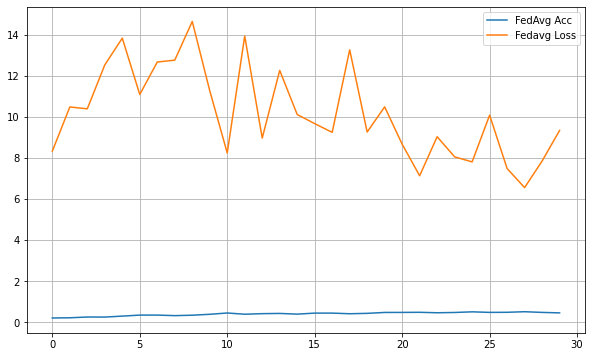

In [8]:
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

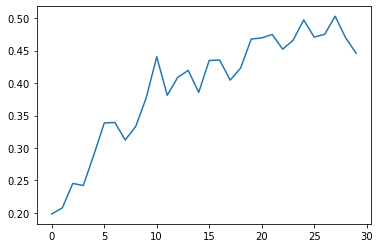

In [9]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [10]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.19841555572218364, 0.20762777858310275, 0.24545333451694915, 0.2421788901090622, 0.28904889076948165, 0.33849000044994887, 0.33941111200385626, 0.31234889162911306, 0.3332777782446808, 0.3774488884541723, 0.4406388897862699, 0.3812222231593397, 0.40884666865070657, 0.41959778053892977, 0.3857355570627583, 0.43494222528404664, 0.43541444374455346, 0.4045500022669633, 0.4233755564524068, 0.4678388886153699, 0.4696655549936824, 0.4749666679236624, 0.45228111156158973, 0.4662744455039501, 0.4973788910441928, 0.470852223618163, 0.47517000022861694, 0.5030366676549116, 0.4697877776291635, 0.4458999993900458] 

[8.324636795785691, 10.475890726513333, 10.386676887671152, 12.52642098930147, 13.829094244374168, 11.086333636442822, 12.665997919771407, 12.757415012518564, 14.641851517889236, 11.270169479317135, 8.23569474948777, 13.931914822922813, 8.961371094650692, 12.258164965444143, 10.110578560829161, 9.663982045650483, 9.240497896406387, 13.259037685394288, 9.25666153828303, 10.4813470873

# Our Algorithm

In [11]:
acc0 = [[], [0.3012000024318695, 0.35850000381469727, 0.5601999759674072, 0.2825999855995178, 0.4916999936103821, 0.5491999983787537, 0.5550000071525574, 0.4174000024795532, 0.477400004863739, 0.37700000405311584, 0.536300003528595, 0.5357000231742859, 0.613099992275238, 0.3652999997138977, 0.5357999801635742, 0.6017000079154968, 0.4645000100135803, 0.5552999973297119, 0.5909000039100647, 0.4731999933719635, 0.45100000500679016, 0.6139000058174133, 0.5530999898910522, 0.5358999967575073, 0.42660000920295715, 0.5835999846458435, 0.2662999927997589, 0.5239999890327454, 0.5145999789237976, 0.5468000173568726], [0.6097999811172485, 0.6251000165939331, 0.59170001745224, 0.44110000133514404, 0.5634999871253967, 0.5489000082015991, 0.5849000215530396, 0.6069999933242798, 0.6628999710083008, 0.40790000557899475, 0.5956000089645386, 0.6467000246047974, 0.41179999709129333, 0.6083999872207642, 0.6065999865531921, 0.5188000202178955, 0.6114000082015991, 0.5022000074386597, 0.5001999735832214, 0.5371000170707703, 0.5575000047683716, 0.4551999866962433, 0.5770999789237976, 0.6159999966621399, 0.47839999198913574, 0.616100013256073, 0.660099983215332, 0.5404999852180481, 0.4535999894142151, 0.5471000075340271], [0.6600000262260437, 0.5688999891281128, 0.6467999815940857, 0.6355000138282776, 0.5443000197410583, 0.5716999769210815, 0.46939998865127563, 0.5884000062942505, 0.5133000016212463, 0.6680999994277954, 0.6588000059127808, 0.4447999894618988, 0.5740000009536743, 0.6467000246047974, 0.5917999744415283, 0.656499981880188, 0.682699978351593, 0.6685000061988831, 0.553600013256073, 0.6402999758720398, 0.6776999831199646, 0.6258000135421753, 0.6195999979972839, 0.6103000044822693, 0.625, 0.593500018119812, 0.6589999794960022, 0.5181999802589417, 0.6531000137329102, 0.5508000254631042], [0.613099992275238, 0.5860000252723694, 0.6841999888420105, 0.63919997215271, 0.5418999791145325, 0.6744999885559082, 0.5412999987602234, 0.656000018119812, 0.6876999735832214, 0.5936999917030334, 0.7027000188827515, 0.6172000169754028, 0.6858999729156494, 0.6952999830245972, 0.5515999794006348, 0.5993000268936157, 0.654699981212616, 0.6047000288963318, 0.5619000196456909, 0.6471999883651733, 0.6966999769210815, 0.6238999962806702, 0.5368000268936157, 0.6226000189781189, 0.638700008392334, 0.5291000008583069, 0.6134999990463257, 0.6869999766349792, 0.6281999945640564, 0.6243000030517578], [0.6317999958992004, 0.6995999813079834, 0.5767999887466431, 0.6729999780654907, 0.6588000059127808, 0.6887999773025513, 0.5187000036239624, 0.6869999766349792, 0.6481000185012817, 0.6626999974250793, 0.722000002861023, 0.5559999942779541, 0.5339999794960022, 0.6851999759674072, 0.6561999917030334, 0.6808000206947327, 0.7032999992370605, 0.6341000199317932, 0.6323999762535095, 0.65420001745224, 0.6836000084877014, 0.6359000205993652, 0.6636999845504761, 0.6603999733924866, 0.6898999810218811, 0.7013999819755554, 0.6700000166893005, 0.6861000061035156, 0.6574000120162964, 0.7084000110626221], [0.6765999794006348, 0.6085000038146973, 0.7034000158309937, 0.6714000105857849, 0.7060999870300293, 0.7024000287055969, 0.6966999769210815, 0.7131999731063843, 0.6632000207901001, 0.6439999938011169, 0.7008000016212463, 0.6040999889373779, 0.597100019454956, 0.713699996471405, 0.6589000225067139, 0.6051999926567078, 0.683899998664856, 0.7073000073432922, 0.6503000259399414, 0.638700008392334, 0.7206000089645386, 0.6934999823570251, 0.6194999814033508, 0.7121000289916992, 0.6769999861717224, 0.6582000255584717, 0.6899999976158142, 0.7365999817848206, 0.6859999895095825, 0.6922000050544739], [0.7386999726295471, 0.6974999904632568, 0.7343999743461609, 0.5311999917030334, 0.6978999972343445, 0.6643999814987183, 0.6988999843597412, 0.6261000037193298, 0.7261999845504761, 0.6504999995231628, 0.7301999926567078, 0.6766999959945679, 0.6011000275611877, 0.7001000046730042, 0.5611000061035156, 0.7233999967575073, 0.6988999843597412, 0.7077000141143799, 0.7027000188827515, 0.7386000156402588, 0.6972000002861023, 0.6743999719619751, 0.7347000241279602, 0.7056000232696533, 0.6894999742507935, 0.6722000241279602, 0.7267000079154968, 0.7253999710083008, 0.7045999765396118, 0.7006000280380249], [0.6873999834060669, 0.6473000049591064, 0.6187000274658203, 0.7437999844551086, 0.7333999872207642, 0.7501999735832214, 0.679099977016449, 0.6743000149726868, 0.6758999824523926, 0.729200005531311, 0.7096999883651733, 0.7096999883651733, 0.7024999856948853, 0.6917999982833862, 0.7170000076293945, 0.7010999917984009, 0.7253999710083008, 0.7160000205039978, 0.7565000057220459, 0.6938999891281128, 0.6917999982833862, 0.7020999789237976, 0.6639999747276306, 0.6905999779701233, 0.6826000213623047, 0.7172999978065491, 0.6707000136375427, 0.6608999967575073, 0.694100022315979, 0.6718000173568726], [0.6944000124931335, 0.6751999855041504, 0.7070000171661377, 0.6678000092506409, 0.7121000289916992, 0.6769000291824341, 0.7143999934196472, 0.7246000170707703, 0.6478000283241272, 0.7286999821662903, 0.6172999739646912, 0.6431999802589417, 0.6873000264167786, 0.7203999757766724, 0.7085999846458435, 0.7509999871253967, 0.7059000134468079, 0.703000009059906, 0.7297999858856201, 0.7228000164031982, 0.5641999840736389, 0.7005000114440918, 0.7114999890327454, 0.7299000024795532, 0.5943999886512756, 0.6696000099182129, 0.6973999738693237, 0.7156999707221985, 0.6959999799728394, 0.7135999798774719], [0.7577000260353088, 0.7533000111579895, 0.7261999845504761, 0.7462000250816345, 0.7706000208854675, 0.7184000015258789, 0.7310000061988831, 0.7458000183105469, 0.6320000290870667, 0.7077999711036682, 0.6635000109672546, 0.6985999941825867, 0.7210000157356262, 0.7117999792098999, 0.6532999873161316, 0.7310000061988831, 0.7188000082969666, 0.7598000168800354, 0.6970999836921692, 0.7402999997138977, 0.6646000146865845, 0.7297999858856201, 0.7656000256538391, 0.6805999875068665, 0.7516999840736389, 0.739300012588501, 0.7631000280380249, 0.6937000155448914, 0.743399977684021, 0.7143999934196472], [0.7064999938011169, 0.6241999864578247, 0.6827999949455261, 0.7441999912261963, 0.6626999974250793, 0.6866000294685364, 0.7131999731063843, 0.7540000081062317, 0.7470999956130981, 0.6898999810218811, 0.7422999739646912, 0.6481999754905701, 0.7627999782562256, 0.6660000085830688, 0.6836000084877014, 0.7063000202178955, 0.6510999798774719, 0.6693000197410583, 0.7228999733924866, 0.7177000045776367, 0.7415000200271606, 0.710099995136261, 0.645799994468689, 0.7105000019073486, 0.7134000062942505, 0.7233999967575073, 0.7319999933242798, 0.7490000128746033, 0.7402999997138977, 0.6852999925613403], [0.7084000110626221, 0.7099999785423279, 0.7584999799728394, 0.757099986076355, 0.7175999879837036, 0.7462999820709229, 0.6951000094413757, 0.7386999726295471, 0.7565000057220459, 0.677299976348877, 0.7031000256538391, 0.7595000267028809, 0.6581000089645386, 0.7541999816894531, 0.6729999780654907, 0.6967999935150146, 0.7366999983787537, 0.7548999786376953, 0.7523000240325928, 0.76419997215271, 0.7468000054359436, 0.7602999806404114, 0.7275999784469604, 0.7235000133514404, 0.705299973487854, 0.7461000084877014, 0.7425000071525574, 0.7498000264167786, 0.7075999975204468, 0.7502999901771545], [0.7242000102996826, 0.7368000149726868, 0.6388000249862671, 0.7411999702453613, 0.7314000129699707, 0.7706999778747559, 0.6617000102996826, 0.7384999990463257, 0.7195000052452087, 0.7276999950408936, 0.7294999957084656, 0.7506999969482422, 0.7401999831199646, 0.7032999992370605, 0.7074999809265137, 0.7343000173568726, 0.7605999708175659, 0.7342000007629395, 0.7595000267028809, 0.7414000034332275, 0.7239999771118164, 0.7386999726295471, 0.7552000284194946, 0.7739999890327454, 0.736299991607666, 0.7088000178337097, 0.7335000038146973, 0.5576000213623047, 0.7457000017166138, 0.7639999985694885], [0.7682999968528748, 0.6467000246047974, 0.7476999759674072, 0.7222999930381775, 0.7340999841690063, 0.7497000098228455, 0.775600016117096, 0.7458000183105469, 0.6868000030517578, 0.7646999955177307, 0.7659000158309937, 0.6577000021934509, 0.7131999731063843, 0.738099992275238, 0.6913999915122986, 0.767300009727478, 0.777400016784668, 0.6718000173568726, 0.690500020980835, 0.7764000296592712, 0.7601000070571899, 0.6157000064849854, 0.7389000058174133, 0.7501999735832214, 0.7450000047683716, 0.7613000273704529, 0.7153000235557556, 0.7642999887466431, 0.6718999743461609, 0.76910001039505], [0.7498999834060669, 0.7044000029563904, 0.7781999707221985, 0.751800000667572, 0.6876999735832214, 0.7696999907493591, 0.7542999982833862, 0.7534000277519226, 0.739799976348877, 0.6990000009536743, 0.7193999886512756, 0.7055000066757202, 0.7434999942779541, 0.7493000030517578, 0.7709000110626221, 0.771399974822998, 0.7476000189781189, 0.7490000128746033, 0.6098999977111816, 0.7494000196456909, 0.628600001335144, 0.7465999722480774, 0.6747000217437744, 0.7057999968528748, 0.7448999881744385, 0.72079998254776, 0.7192999720573425, 0.7447999715805054, 0.6875, 0.6850000023841858], [0.6639999747276306, 0.7245000004768372, 0.6169000267982483, 0.7730000019073486, 0.7281000018119812, 0.7401999831199646, 0.7759000062942505, 0.7329000234603882, 0.7835000157356262, 0.7588000297546387, 0.7311999797821045, 0.6586999893188477, 0.7657999992370605, 0.7578999996185303, 0.7488999962806702, 0.6577000021934509, 0.7849000096321106, 0.6944000124931335, 0.7440999746322632, 0.6822999715805054, 0.7799000144004822, 0.6843000054359436, 0.732699990272522, 0.7452999949455261, 0.7595000267028809, 0.6539000272750854, 0.6517000198364258, 0.758400022983551, 0.777899980545044, 0.7391999959945679], [0.7721999883651733, 0.7263000011444092, 0.7451000213623047, 0.6758000254631042, 0.7254999876022339, 0.7560999989509583, 0.7347999811172485, 0.7498000264167786, 0.7257999777793884, 0.779699981212616, 0.7450000047683716, 0.718500018119812, 0.7121999859809875, 0.7587000131607056, 0.694599986076355, 0.7181000113487244, 0.746399998664856, 0.7336999773979187, 0.7455999851226807, 0.7534999847412109, 0.7439000010490417, 0.746999979019165, 0.7226999998092651, 0.7177000045776367, 0.7591999769210815, 0.7585999965667725, 0.766700029373169, 0.7684000134468079, 0.7547000050544739, 0.6833999752998352], [0.7197999954223633, 0.782800018787384, 0.7882999777793884, 0.7371000051498413, 0.7838000059127808, 0.741599977016449, 0.6873000264167786, 0.7124999761581421, 0.6782000064849854, 0.7872999906539917, 0.751800000667572, 0.7526000142097473, 0.7268000245094299, 0.7524999976158142, 0.766700029373169, 0.7372000217437744, 0.7038000226020813, 0.7641000151634216, 0.7533000111579895, 0.75, 0.7520999908447266, 0.7132999897003174, 0.7279999852180481, 0.7390000224113464, 0.7684999704360962, 0.6690000295639038, 0.7720999717712402, 0.7720000147819519, 0.6586999893188477, 0.7523999810218811], [0.7400000095367432, 0.7824000120162964, 0.7580999732017517, 0.7674999833106995, 0.7581999897956848, 0.71670001745224, 0.7264000177383423, 0.7674999833106995, 0.7806000113487244, 0.7832000255584717, 0.7771999835968018, 0.7476999759674072, 0.7497000098228455, 0.7384999990463257, 0.708899974822998, 0.7117000222206116, 0.7648000121116638, 0.7731999754905701, 0.7522000074386597, 0.7333999872207642, 0.7753999829292297, 0.7635999917984009, 0.7584999799728394, 0.7638999819755554, 0.7458000183105469, 0.7483999729156494, 0.7746999859809875, 0.7466999888420105, 0.7573000192642212, 0.7955999970436096], [0.7174000144004822, 0.7508000135421753, 0.7117000222206116, 0.792900025844574, 0.7473000288009644, 0.7760999798774719, 0.758400022983551, 0.7687000036239624, 0.7229999899864197, 0.7774999737739563, 0.7689999938011169, 0.7802000045776367, 0.7670999765396118, 0.7833999991416931, 0.7871999740600586, 0.7821000218391418, 0.7651000022888184, 0.7623999714851379, 0.736299991607666, 0.7364000082015991, 0.7412999868392944, 0.7315000295639038, 0.7422000169754028, 0.7924000024795532, 0.7858999967575073, 0.7477999925613403, 0.7912999987602234, 0.758899986743927, 0.7009000182151794, 0.7085000276565552], [0.7311999797821045, 0.7731999754905701, 0.7473000288009644, 0.7813000082969666, 0.7710999846458435, 0.7710999846458435, 0.7541000247001648, 0.7605999708175659, 0.7699999809265137, 0.7660999894142151, 0.7687000036239624, 0.7616999745368958, 0.7641000151634216, 0.7767999768257141, 0.7210999727249146, 0.7773000001907349, 0.7617999911308289, 0.7523999810218811, 0.766700029373169, 0.7774999737739563, 0.6832000017166138, 0.7795000076293945, 0.7699999809265137, 0.7099000215530396, 0.7315999865531921, 0.7811999917030334, 0.7021999955177307, 0.7851999998092651, 0.7455999851226807, 0.7537999749183655], [0.7839000225067139, 0.737500011920929, 0.8033999800682068, 0.7578999996185303, 0.7578999996185303, 0.741599977016449, 0.7554000020027161, 0.7799999713897705, 0.7556999921798706, 0.7189000248908997, 0.7760000228881836, 0.753600001335144, 0.789900004863739, 0.7749000191688538, 0.7472000122070312, 0.7045000195503235, 0.751800000667572, 0.7588000297546387, 0.7814000248908997, 0.7432000041007996, 0.7757999897003174, 0.7818999886512756, 0.766700029373169, 0.7702999711036682, 0.70169997215271, 0.7598000168800354, 0.7644000053405762, 0.7696999907493591, 0.7724000215530396, 0.6815999746322632], [0.737500011920929, 0.7754999995231628, 0.7724999785423279, 0.75, 0.7433000206947327, 0.7437000274658203, 0.7940999865531921, 0.7842000126838684, 0.7613999843597412, 0.7997000217437744, 0.782800018787384, 0.7322999835014343, 0.7710999846458435, 0.7712000012397766, 0.7404000163078308, 0.7918000221252441, 0.7788000106811523, 0.7519999742507935, 0.7764000296592712, 0.7648000121116638, 0.7322999835014343, 0.7666000127792358, 0.7890999913215637, 0.785099983215332, 0.7864000201225281, 0.7864999771118164, 0.8068000078201294, 0.7706000208854675, 0.6996999979019165, 0.7806000113487244], [0.6272000074386597, 0.7394999861717224, 0.7099999785423279, 0.7763000130653381, 0.7314000129699707, 0.7738000154495239, 0.8064000010490417, 0.788100004196167, 0.7861999869346619, 0.7465999722480774, 0.7803999781608582, 0.7609999775886536, 0.7892000079154968, 0.7732999920845032, 0.7766000032424927, 0.7817000150680542, 0.7990000247955322, 0.7836999893188477, 0.7760000228881836, 0.7993000149726868, 0.7613000273704529, 0.7603999972343445, 0.7293999791145325, 0.7771999835968018, 0.6654000282287598, 0.7287999987602234, 0.7580000162124634, 0.7702999711036682, 0.7833999991416931, 0.7552000284194946], [0.7382000088691711, 0.7613000273704529, 0.788100004196167, 0.7537999749183655, 0.777400016784668, 0.7233999967575073, 0.7592999935150146, 0.7132999897003174, 0.7221999764442444, 0.7886999845504761, 0.7250999808311462, 0.7228000164031982, 0.7689999938011169, 0.7843000292778015, 0.7724000215530396, 0.8062000274658203, 0.7929999828338623, 0.7724999785423279, 0.7286999821662903, 0.7968999743461609, 0.6467999815940857, 0.7621999979019165, 0.6732000112533569, 0.7534999847412109, 0.7792999744415283, 0.8001000285148621, 0.8062999844551086, 0.746999979019165, 0.6840000152587891, 0.7681000232696533], [0.7989000082015991, 0.745199978351593, 0.6923999786376953, 0.7875999808311462, 0.7541999816894531, 0.7785000205039978, 0.7652999758720398, 0.7932000160217285, 0.8065999746322632, 0.8025000095367432, 0.7429999709129333, 0.7680000066757202, 0.70169997215271, 0.7853999733924866, 0.7678999900817871, 0.7315000295639038, 0.7781999707221985, 0.7408999800682068, 0.758400022983551, 0.7828999757766724, 0.7858999967575073, 0.7804999947547913, 0.7685999870300293, 0.7962999939918518, 0.7839000225067139, 0.7626000046730042, 0.7739999890327454, 0.7597000002861023, 0.7602999806404114, 0.7797999978065491], [0.7921000123023987, 0.7663000226020813, 0.7635999917984009, 0.7886999845504761, 0.7348999977111816, 0.7488999962806702, 0.7152000069618225, 0.7980999946594238, 0.7671999931335449, 0.7300000190734863, 0.7822999954223633, 0.7390000224113464, 0.805899977684021, 0.7587000131607056, 0.7476999759674072, 0.7623000144958496, 0.7811999917030334, 0.8194000124931335, 0.7293000221252441, 0.7527999877929688, 0.7936000227928162, 0.7990000247955322, 0.7775999903678894, 0.734499990940094, 0.8066999912261963, 0.7925000190734863, 0.7656999826431274, 0.7883999943733215, 0.765999972820282, 0.7488999962806702], [0.6977999806404114, 0.7627000212669373, 0.791100025177002, 0.7919999957084656, 0.7864999771118164, 0.7724999785423279, 0.8030999898910522, 0.798799991607666, 0.792900025844574, 0.7781000137329102, 0.7720000147819519, 0.7813000082969666, 0.7797999978065491, 0.7598000168800354, 0.7688999772071838, 0.7872999906539917, 0.8019000291824341, 0.7940999865531921, 0.786899983882904, 0.7515000104904175, 0.7867000102996826, 0.7333999872207642, 0.6942999958992004, 0.7576000094413757, 0.794700026512146, 0.7605000138282776, 0.7613000273704529, 0.7735000252723694, 0.7035999894142151, 0.7854999899864197], [0.7533000111579895, 0.8065999746322632, 0.7986000180244446, 0.7565000057220459, 0.7965999841690063, 0.791700005531311, 0.7962999939918518, 0.76910001039505, 0.7831000089645386, 0.7555999755859375, 0.7914999723434448, 0.8025000095367432, 0.8167999982833862, 0.7778000235557556, 0.805400013923645, 0.760200023651123, 0.8039000034332275, 0.7990000247955322, 0.8073999881744385, 0.7817000150680542, 0.7791000008583069, 0.7680000066757202, 0.7879999876022339, 0.7860999703407288, 0.7039999961853027, 0.7494999766349792, 0.7993999719619751, 0.7843000292778015, 0.7738000154495239, 0.8076000213623047], [0.7989000082015991, 0.7652999758720398, 0.7875999808311462, 0.7854999899864197, 0.7404999732971191, 0.8072999715805054, 0.7360000014305115, 0.8180000185966492, 0.8019999861717224, 0.7746999859809875, 0.8072999715805054, 0.8133999705314636, 0.7215999960899353, 0.7694000005722046, 0.7461000084877014, 0.7013000249862671, 0.7401000261306763, 0.7378000020980835, 0.7871999740600586, 0.7450000047683716, 0.7590000033378601, 0.7336000204086304, 0.8090000152587891, 0.7307999730110168, 0.7534999847412109, 0.7055000066757202, 0.7890999913215637, 0.7057999968528748, 0.8069000244140625, 0.8015999794006348]]
loss0 = [[], [1.8886281251907349, 2.69032883644104, 1.2094255685806274, 3.028414487838745, 1.3398549556732178, 1.3216134309768677, 1.4577322006225586, 2.1940975189208984, 1.341491460800171, 1.8749899864196777, 1.3081393241882324, 1.2357341051101685, 1.3570075035095215, 3.0024895668029785, 1.390028953552246, 1.2495784759521484, 2.368168830871582, 1.217328667640686, 1.009657621383667, 2.481126070022583, 1.985785961151123, 1.0733563899993896, 1.5121665000915527, 1.5758721828460693, 2.264601469039917, 1.2457131147384644, 2.22318434715271, 1.323624849319458, 1.5331809520721436, 1.3116141557693481], [1.2544342279434204, 1.2359724044799805, 1.1004317998886108, 1.7222570180892944, 1.2502098083496094, 1.1852576732635498, 1.1306326389312744, 1.2476626634597778, 0.9457640647888184, 1.8713617324829102, 1.1685302257537842, 1.0089514255523682, 2.0930631160736084, 1.166849970817566, 1.0746630430221558, 1.1789830923080444, 1.2050343751907349, 1.9118281602859497, 1.8052624464035034, 1.4026789665222168, 1.5074679851531982, 1.5941522121429443, 1.2456797361373901, 1.4145013093948364, 1.3158949613571167, 1.129669189453125, 0.987500786781311, 1.1931943893432617, 3.3606152534484863, 1.289162278175354], [1.4265358448028564, 1.4781848192214966, 1.180100440979004, 1.4838950634002686, 1.9387980699539185, 2.0575106143951416, 2.3232009410858154, 1.6165273189544678, 1.9026851654052734, 1.2432256937026978, 1.2870066165924072, 1.7688339948654175, 3.683603048324585, 1.169086217880249, 1.5337209701538086, 1.4060393571853638, 1.1475765705108643, 1.0645228624343872, 2.385085344314575, 1.2253499031066895, 1.0621296167373657, 1.6221861839294434, 1.175550937652588, 1.4599940776824951, 0.9903286099433899, 1.1621586084365845, 1.3401515483856201, 1.9651252031326294, 1.6400810480117798, 2.0626745223999023], [2.737046003341675, 2.1302993297576904, 0.8951983451843262, 1.5909209251403809, 1.4685970544815063, 0.9967591762542725, 1.6187304258346558, 1.2234981060028076, 1.05593740940094, 1.811393141746521, 0.9143578410148621, 1.2973322868347168, 1.2493829727172852, 1.0680906772613525, 1.170638084411621, 3.176203966140747, 1.2053182125091553, 1.7965611219406128, 1.3592638969421387, 1.786799430847168, 1.2977783679962158, 1.4618682861328125, 1.290871024131775, 1.8509851694107056, 1.592421293258667, 1.8485658168792725, 1.2275527715682983, 0.860371470451355, 1.833313226699829, 1.6679702997207642], [2.243025541305542, 1.1851667165756226, 1.7556523084640503, 1.068952202796936, 1.1629425287246704, 1.136576533317566, 2.6305789947509766, 1.7915183305740356, 1.9388304948806763, 0.9933896660804749, 1.7287142276763916, 1.5867769718170166, 1.3947787284851074, 1.1495981216430664, 0.995901882648468, 1.1199365854263306, 1.1590180397033691, 1.0469919443130493, 2.0207767486572266, 1.209414005279541, 1.0356968641281128, 1.4743984937667847, 1.0382037162780762, 1.558105230331421, 1.6920408010482788, 0.9423511028289795, 1.3794972896575928, 1.3464149236679077, 0.917001485824585, 1.4554229974746704], [1.299815058708191, 1.6535977125167847, 1.4092307090759277, 1.5919910669326782, 0.9156448245048523, 1.3619616031646729, 1.0096044540405273, 1.3775193691253662, 1.5149829387664795, 1.7969300746917725, 1.3181047439575195, 2.306748628616333, 2.5326173305511475, 1.1486235857009888, 1.1949026584625244, 2.436309576034546, 1.2580089569091797, 1.4096547365188599, 1.4698246717453003, 1.288286566734314, 1.195509433746338, 1.8691117763519287, 1.309226155281067, 1.0325533151626587, 1.42415189743042, 1.946108341217041, 1.0636199712753296, 1.054925799369812, 1.4356257915496826, 1.5515272617340088], [1.1224173307418823, 0.8638246059417725, 1.1546611785888672, 2.3329198360443115, 1.0477102994918823, 1.3754998445510864, 1.0532855987548828, 3.1307132244110107, 1.1521319150924683, 1.2058178186416626, 1.1787126064300537, 1.4325920343399048, 1.4175000190734863, 1.3754642009735107, 2.3438985347747803, 1.4074482917785645, 1.531304955482483, 1.2046586275100708, 0.9777973890304565, 1.242800235748291, 1.6642080545425415, 1.233323097229004, 1.0954397916793823, 0.846402645111084, 1.2340598106384277, 0.9223777055740356, 1.4486279487609863, 1.179862380027771, 1.1473358869552612, 1.2666372060775757], [1.6927443742752075, 1.581208348274231, 2.1018261909484863, 1.3752185106277466, 1.449449896812439, 1.1836005449295044, 1.246083378791809, 1.6825202703475952, 1.5139802694320679, 1.1411199569702148, 1.133943796157837, 1.4913904666900635, 1.5146369934082031, 1.3806040287017822, 1.1811237335205078, 2.536569595336914, 1.8615753650665283, 1.0070242881774902, 0.8802658319473267, 1.2960883378982544, 1.0957976579666138, 1.0835275650024414, 1.3235889673233032, 1.079161286354065, 1.4983645677566528, 1.3994535207748413, 1.2414261102676392, 1.2870010137557983, 1.8242450952529907, 1.6962088346481323], [1.306246280670166, 1.4135088920593262, 1.1146160364151, 1.5791765451431274, 1.2981936931610107, 1.2287803888320923, 1.1817646026611328, 1.5412943363189697, 1.1817007064819336, 1.1038485765457153, 1.656848669052124, 1.7532016038894653, 1.434208869934082, 2.082486629486084, 1.2922637462615967, 0.9155747294425964, 1.1536035537719727, 1.2100938558578491, 0.9249186515808105, 1.1969841718673706, 2.3435451984405518, 1.0304341316223145, 1.5770263671875, 1.1904263496398926, 4.347890853881836, 1.5180325508117676, 1.34522545337677, 1.0145212411880493, 1.353822112083435, 1.274214744567871], [1.2413325309753418, 1.1842925548553467, 0.9647876024246216, 1.1755298376083374, 0.8798384666442871, 1.219777226448059, 1.2118457555770874, 0.8911156058311462, 1.8622896671295166, 1.3032772541046143, 1.9000433683395386, 1.018862009048462, 0.9416773319244385, 1.1468055248260498, 1.9812421798706055, 1.2064919471740723, 1.4374210834503174, 0.7336135506629944, 0.9148241281509399, 1.63801908493042, 1.5634435415267944, 1.0507533550262451, 0.7641451954841614, 1.4025378227233887, 1.2751911878585815, 0.9776787161827087, 0.8123648166656494, 0.8998985290527344, 1.3647552728652954, 1.19839608669281], [1.6500777006149292, 1.3998767137527466, 1.2638098001480103, 1.2638933658599854, 2.282249927520752, 1.825819969177246, 1.3493454456329346, 1.1745854616165161, 1.1307214498519897, 1.2763240337371826, 1.3924733400344849, 1.2425588369369507, 1.1299210786819458, 1.5184012651443481, 1.7445898056030273, 1.0663634538650513, 1.829514503479004, 1.4416764974594116, 1.2712316513061523, 0.9308372139930725, 1.5092178583145142, 1.258538007736206, 1.537370204925537, 1.2013434171676636, 1.3264696598052979, 1.4543052911758423, 1.035321831703186, 1.3837687969207764, 1.0130112171173096, 1.0063916444778442], [1.2266967296600342, 1.5805537700653076, 1.239804744720459, 0.8430871367454529, 1.1903194189071655, 0.9713072180747986, 1.5557078123092651, 1.064815878868103, 1.0618280172348022, 1.152349591255188, 1.3193022012710571, 1.0358684062957764, 1.0138702392578125, 1.2930055856704712, 1.5355020761489868, 1.887593150138855, 1.2545232772827148, 0.9900388717651367, 0.9971328377723694, 0.9124729633331299, 0.7499953508377075, 1.246930480003357, 1.7281556129455566, 0.9524888396263123, 1.3910934925079346, 1.1874473094940186, 0.9285971522331238, 1.0174709558486938, 1.5996618270874023, 1.1740491390228271], [1.3881745338439941, 1.277698278427124, 3.017627000808716, 1.0475584268569946, 0.9593643546104431, 0.7137687802314758, 1.9589189291000366, 1.0512034893035889, 1.1415269374847412, 1.153868317604065, 2.1075963973999023, 0.9956123232841492, 1.4631787538528442, 1.6995607614517212, 1.5037509202957153, 1.0423439741134644, 0.8558623790740967, 1.4159283638000488, 1.0239919424057007, 1.1984282732009888, 2.034553289413452, 1.1152396202087402, 0.8571569323539734, 0.9708815217018127, 1.0912269353866577, 1.4304687976837158, 0.8895297050476074, 1.998919129371643, 1.307642936706543, 1.0040836334228516], [0.7543824315071106, 2.9915804862976074, 0.9980032444000244, 1.1071434020996094, 2.0972096920013428, 1.0022293329238892, 1.0856034755706787, 1.0901060104370117, 1.8545794486999512, 0.894995391368866, 1.2961578369140625, 1.727522850036621, 1.3005343675613403, 1.2863458395004272, 2.0507311820983887, 0.9019969701766968, 0.8710228800773621, 1.0249394178390503, 1.0398659706115723, 0.8560130596160889, 1.8276902437210083, 3.560621976852417, 1.0466755628585815, 1.0884407758712769, 1.1921035051345825, 1.2563738822937012, 1.7571797370910645, 0.9492809772491455, 1.4598734378814697, 0.9957025647163391], [1.4440851211547852, 1.237248420715332, 0.877027153968811, 1.1560018062591553, 1.250218152999878, 0.9850231409072876, 1.0090129375457764, 1.0333788394927979, 1.3171045780181885, 1.5335025787353516, 1.7208294868469238, 1.249566674232483, 1.3219748735427856, 1.0098744630813599, 1.0471643209457397, 1.0310286283493042, 1.010009765625, 1.6270359754562378, 1.7065982818603516, 1.2310484647750854, 1.2651770114898682, 1.4761121273040771, 1.1142101287841797, 0.9590533971786499, 0.913392186164856, 1.4831339120864868, 1.3680589199066162, 1.0054411888122559, 1.5440737009048462, 1.264107584953308], [2.774416923522949, 1.4279159307479858, 1.2774689197540283, 1.213328242301941, 1.2064508199691772, 1.2316646575927734, 0.988029956817627, 1.2931246757507324, 1.064259648323059, 1.2486774921417236, 1.310853123664856, 1.528634786605835, 1.2153197526931763, 1.1405895948410034, 0.9291235208511353, 1.519524335861206, 1.1000710725784302, 1.3728855848312378, 1.386974811553955, 1.5530749559402466, 0.9008269309997559, 2.0740816593170166, 1.2555960416793823, 1.285907506942749, 1.293962836265564, 1.3705536127090454, 1.183288812637329, 0.9192968010902405, 0.9305232167243958, 1.4075415134429932], [1.0167044401168823, 0.8929268717765808, 1.314624547958374, 1.444502592086792, 1.1058706045150757, 1.0214760303497314, 1.4135353565216064, 1.0712106227874756, 0.9677599668502808, 1.0687355995178223, 2.23909854888916, 1.2342017889022827, 1.308176875114441, 1.0362708568572998, 1.542392373085022, 1.4746960401535034, 1.4039541482925415, 1.1032164096832275, 1.4440791606903076, 0.9136289358139038, 1.0888102054595947, 1.1556216478347778, 1.5286451578140259, 1.5206705331802368, 1.1044212579727173, 1.9257423877716064, 0.93631511926651, 1.0192042589187622, 0.8896214962005615, 1.877429485321045], [1.6963138580322266, 0.9973406195640564, 1.0991747379302979, 1.3121925592422485, 1.2156504392623901, 0.9893797636032104, 1.7515811920166016, 0.9903926849365234, 1.8091062307357788, 0.7691684365272522, 1.0238285064697266, 1.2289133071899414, 1.433496117591858, 1.5394388437271118, 1.201810598373413, 1.9042332172393799, 1.0530674457550049, 1.4968535900115967, 1.0870968103408813, 0.8281958699226379, 1.094519853591919, 1.116467833518982, 0.944939136505127, 1.4285672903060913, 1.1539887189865112, 1.647517204284668, 1.3484774827957153, 1.330721139907837, 1.1267027854919434, 1.128738522529602], [1.099596381187439, 0.8741800785064697, 1.2958528995513916, 0.8752277493476868, 1.1050043106079102, 1.587202787399292, 1.578339695930481, 0.8998982310295105, 1.0815279483795166, 0.7363925576210022, 1.3009750843048096, 1.0758978128433228, 1.3102507591247559, 1.1013365983963013, 1.3239771127700806, 1.357334852218628, 1.140061378479004, 1.3373936414718628, 0.9158137440681458, 1.8275941610336304, 1.122712254524231, 1.3143669366836548, 1.0388092994689941, 1.1561684608459473, 1.1073681116104126, 1.4978456497192383, 0.6501067280769348, 1.2373546361923218, 1.1805061101913452, 0.7130395174026489], [1.0806758403778076, 0.9648914337158203, 1.1602144241333008, 0.7237990498542786, 1.237410068511963, 1.0236053466796875, 1.5197813510894775, 1.0730202198028564, 0.8434518575668335, 0.9708354473114014, 0.8114279508590698, 0.8524428009986877, 0.8894522190093994, 0.8180674314498901, 0.8172507882118225, 0.7553625702857971, 1.2334543466567993, 1.2117509841918945, 1.0169801712036133, 1.7171103954315186, 1.920227289199829, 1.1447392702102661, 1.4326342344284058, 0.8342806696891785, 0.7605127096176147, 0.8373388648033142, 0.9178650379180908, 1.2225275039672852, 2.1198861598968506, 0.9818678498268127], [1.7478070259094238, 1.0845861434936523, 1.2906286716461182, 1.0023961067199707, 0.9623655080795288, 1.3236209154129028, 1.253008484840393, 0.9923569560050964, 1.3134894371032715, 0.8050082921981812, 0.8877107501029968, 1.009635329246521, 1.045607089996338, 1.1964952945709229, 2.175438404083252, 0.9428917765617371, 0.9550683498382568, 0.8938654065132141, 1.1226677894592285, 1.2470167875289917, 2.2342705726623535, 0.7980175018310547, 1.4074385166168213, 1.3149369955062866, 1.38716459274292, 1.1164814233779907, 0.9760370254516602, 1.0564918518066406, 1.8341326713562012, 1.6389141082763672], [1.3512624502182007, 1.0690245628356934, 0.9204248189926147, 1.1103709936141968, 1.1352803707122803, 1.5458208322525024, 1.2362233400344849, 1.0793883800506592, 1.0697524547576904, 1.0849074125289917, 1.2556191682815552, 1.051712155342102, 0.8558156490325928, 0.8464176654815674, 1.142004370689392, 1.1427395343780518, 1.097450852394104, 1.3443108797073364, 1.3221369981765747, 1.2343990802764893, 1.120835304260254, 1.4562493562698364, 0.9363132119178772, 0.8762543201446533, 1.5391548871994019, 1.4034687280654907, 0.9031679630279541, 1.0548524856567383, 1.3832931518554688, 2.069464921951294], [1.0328624248504639, 1.2092524766921997, 0.8197646737098694, 1.403536319732666, 1.0715436935424805, 1.2088960409164429, 1.1795579195022583, 0.9897220730781555, 1.4221010208129883, 0.8119405508041382, 0.9662012457847595, 1.3586379289627075, 1.3026578426361084, 1.5767771005630493, 1.0263588428497314, 0.9758695363998413, 0.8713566660881042, 1.5344204902648926, 1.0220842361450195, 1.4471135139465332, 1.174765706062317, 1.0550895929336548, 1.09043288230896, 0.7908979654312134, 0.9240861535072327, 1.2352246046066284, 0.8083531856536865, 1.3178712129592896, 1.108625054359436, 1.05670166015625], [2.036914348602295, 1.0935088396072388, 2.0146749019622803, 0.8921221494674683, 1.2667605876922607, 1.0464746952056885, 0.746971845626831, 0.9674270749092102, 0.8826373219490051, 0.9712590575218201, 1.2967422008514404, 0.8450790047645569, 1.2831531763076782, 1.3370357751846313, 1.0666431188583374, 1.3465867042541504, 0.9528016448020935, 1.3386725187301636, 0.8494143486022949, 0.9096684455871582, 1.0803756713867188, 1.0945738554000854, 1.0086028575897217, 0.9929625988006592, 1.2387149333953857, 1.7611613273620605, 1.3259485960006714, 0.9270328283309937, 1.0892823934555054, 1.1850957870483398], [1.3242061138153076, 0.9198091626167297, 1.0282044410705566, 1.3779329061508179, 1.148718237876892, 2.5872316360473633, 1.0788804292678833, 2.222287654876709, 0.9264994859695435, 1.3384531736373901, 1.6010900735855103, 2.2119598388671875, 1.1721657514572144, 0.7997294664382935, 1.2340738773345947, 1.2488571405410767, 0.887916624546051, 1.1214958429336548, 0.9319332242012024, 1.0029022693634033, 2.6917967796325684, 1.538075566291809, 1.3701728582382202, 1.1138626337051392, 1.1323187351226807, 1.223748803138733, 1.1703121662139893, 1.3126963376998901, 1.2899912595748901, 1.3829597234725952], [0.8772304654121399, 1.4168293476104736, 1.8543925285339355, 0.8090927004814148, 0.7874361872673035, 1.1204142570495605, 1.1581262350082397, 1.63899827003479, 0.8651949167251587, 1.0090372562408447, 1.717183232307434, 1.076709508895874, 1.3138715028762817, 0.7489364743232727, 0.7049717903137207, 1.1338127851486206, 1.8420872688293457, 1.3932262659072876, 0.7592532634735107, 1.0375601053237915, 0.9317587018013, 0.9272826313972473, 1.8551472425460815, 1.0030421018600464, 0.9732601642608643, 1.3025952577590942, 1.1460436582565308, 1.1259115934371948, 1.2057665586471558, 0.9844955801963806], [1.2201913595199585, 1.5136964321136475, 1.44356107711792, 1.201210379600525, 1.4827423095703125, 0.9974620938301086, 1.8619540929794312, 0.7923585176467896, 1.0565441846847534, 1.3178516626358032, 1.2004321813583374, 1.0554125308990479, 0.8497060537338257, 1.026533603668213, 1.3355211019515991, 1.382942795753479, 0.9025769233703613, 0.7387866973876953, 1.3471813201904297, 1.2595301866531372, 0.9322983622550964, 1.2736053466796875, 0.9934532046318054, 1.2906162738800049, 0.716040849685669, 1.3356497287750244, 1.3950258493423462, 1.0380369424819946, 1.2853630781173706, 1.7135297060012817], [2.29520320892334, 1.2646831274032593, 0.8855846524238586, 0.9735158085823059, 0.8989434838294983, 1.1783316135406494, 1.0557167530059814, 0.8149134516716003, 1.0298393964767456, 1.0557451248168945, 1.2477895021438599, 0.8639370799064636, 0.7326005101203918, 1.3166097402572632, 0.8762291073799133, 0.6929931640625, 0.9834488034248352, 1.3490235805511475, 0.765387773513794, 1.338943600654602, 0.9491593837738037, 1.4843190908432007, 1.664578914642334, 1.580783724784851, 1.1712993383407593, 0.9819655418395996, 1.414196252822876, 1.1887584924697876, 1.8377386331558228, 1.2151731252670288], [1.518348217010498, 0.7995567321777344, 1.120959758758545, 1.2939893007278442, 0.9563283324241638, 0.8538073301315308, 1.1601451635360718, 0.9809807538986206, 1.1995723247528076, 1.1191959381103516, 1.0914512872695923, 0.8162986636161804, 0.7276642918586731, 0.9102743864059448, 0.8863950371742249, 1.5033921003341675, 0.996350109577179, 0.7972494959831238, 0.8916095495223999, 1.050567626953125, 0.9095824360847473, 0.9843593835830688, 1.561219334602356, 0.9797089099884033, 1.6138584613800049, 1.15433669090271, 1.3907380104064941, 1.1414259672164917, 1.0955396890640259, 0.7902927994728088], [1.263291835784912, 1.0876777172088623, 1.0993728637695312, 0.9609783887863159, 1.2138348817825317, 1.246010422706604, 1.1695573329925537, 0.8140243887901306, 0.7575077414512634, 1.1635043621063232, 0.9039404988288879, 1.0028125047683716, 1.5970449447631836, 0.953131914138794, 1.1035274267196655, 1.8752765655517578, 1.6387834548950195, 1.4372103214263916, 0.8707784414291382, 1.566036343574524, 0.8256242871284485, 1.6985509395599365, 0.9897549748420715, 2.0834035873413086, 1.065611481666565, 1.5551689863204956, 1.2118496894836426, 1.0017281770706177, 0.9292697310447693, 0.8347768783569336]] 

acc1 = [[], [0.36489999294281006, 0.4659000039100647, 0.5781999826431274, 0.5999000072479248, 0.5782999992370605, 0.4853000044822693, 0.2678000032901764, 0.4896000027656555, 0.46309998631477356, 0.5978000164031982, 0.47999998927116394, 0.5397999882698059, 0.44999998807907104, 0.4602000117301941, 0.225600004196167, 0.48890000581741333, 0.41339999437332153, 0.5934000015258789, 0.5569999814033508, 0.5123999714851379, 0.3124000132083893, 0.5630999803543091, 0.37279999256134033, 0.5042999982833862, 0.3366999924182892, 0.5335999727249146, 0.5281999707221985, 0.5600000023841858, 0.287200003862381, 0.5986999869346619], [0.6546000242233276, 0.4837999939918518, 0.6370999813079834, 0.5957000255584717, 0.661899983882904, 0.5943999886512756, 0.6140999794006348, 0.5856000185012817, 0.48330000042915344, 0.6348000168800354, 0.5052000284194946, 0.5630000233650208, 0.5386000275611877, 0.6474000215530396, 0.6690000295639038, 0.5845999717712402, 0.49889999628067017, 0.44279998540878296, 0.6547999978065491, 0.6137999892234802, 0.4641999900341034, 0.6287000179290771, 0.4431000053882599, 0.399399995803833, 0.3425999879837036, 0.6499999761581421, 0.631600022315979, 0.49149999022483826, 0.5450999736785889, 0.6610999703407288], [0.6653000116348267, 0.5673999786376953, 0.6132000088691711, 0.4586000144481659, 0.5557000041007996, 0.6819999814033508, 0.6579999923706055, 0.6388999819755554, 0.7085999846458435, 0.666100025177002, 0.6848000288009644, 0.6919000148773193, 0.6521999835968018, 0.5501999855041504, 0.6665999889373779, 0.652999997138977, 0.6428999900817871, 0.6000000238418579, 0.5875999927520752, 0.6589999794960022, 0.6582000255584717, 0.6941999793052673, 0.4580000042915344, 0.6898999810218811, 0.6043000221252441, 0.5289000272750854, 0.6118000149726868, 0.5379999876022339, 0.5098999738693237, 0.661899983882904], [0.5934000015258789, 0.6147000193595886, 0.652899980545044, 0.6599000096321106, 0.5702000260353088, 0.5590999722480774, 0.7085000276565552, 0.7038000226020813, 0.708899974822998, 0.6894000172615051, 0.6729000210762024, 0.6672000288963318, 0.673799991607666, 0.670199990272522, 0.6967999935150146, 0.6399000287055969, 0.6043999791145325, 0.6395999789237976, 0.5764999985694885, 0.5504000186920166, 0.6491000056266785, 0.6830999851226807, 0.6434000134468079, 0.6407999992370605, 0.5196999907493591, 0.64410001039505, 0.6927000284194946, 0.6740000247955322, 0.6550999879837036, 0.5637999773025513], [0.7031999826431274, 0.6406999826431274, 0.5812000036239624, 0.6611999869346619, 0.6955999732017517, 0.6638000011444092, 0.6482999920845032, 0.7020000219345093, 0.7213000059127808, 0.6588000059127808, 0.6820999979972839, 0.6955999732017517, 0.6977999806404114, 0.7103000283241272, 0.6862999796867371, 0.6456000208854675, 0.6514999866485596, 0.5113999843597412, 0.6736999750137329, 0.6424999833106995, 0.659600019454956, 0.6588000059127808, 0.6395999789237976, 0.7141000032424927, 0.6988000273704529, 0.6791999936103821, 0.6586999893188477, 0.6414999961853027, 0.6972000002861023, 0.6837999820709229], [0.7034000158309937, 0.6869999766349792, 0.6736000180244446, 0.6877999901771545, 0.7049000263214111, 0.6891999840736389, 0.6978999972343445, 0.6833000183105469, 0.7161999940872192, 0.7052000164985657, 0.6381000280380249, 0.6926000118255615, 0.6888999938964844, 0.7131999731063843, 0.6531999707221985, 0.6358000040054321, 0.7056000232696533, 0.6761999726295471, 0.6833000183105469, 0.6944000124931335, 0.6287000179290771, 0.6934999823570251, 0.6394000053405762, 0.7103000283241272, 0.7045999765396118, 0.6274999976158142, 0.7028999924659729, 0.6514999866485596, 0.7325000166893005, 0.644599974155426], [0.6995000243186951, 0.694100022315979, 0.6960999965667725, 0.6883000135421753, 0.6952999830245972, 0.694100022315979, 0.6383000016212463, 0.7311999797821045, 0.7110999822616577, 0.6949999928474426, 0.707099974155426, 0.6377999782562256, 0.7146000266075134, 0.690500020980835, 0.7257999777793884, 0.7035999894142151, 0.6682999730110168, 0.7157999873161316, 0.7213000059127808, 0.6399000287055969, 0.7240999937057495, 0.6955000162124634, 0.7231000065803528, 0.6819000244140625, 0.7322999835014343, 0.6470000147819519, 0.7318000197410583, 0.7034000158309937, 0.7444999814033508, 0.7355999946594238], [0.5063999891281128, 0.7002999782562256, 0.6534000039100647, 0.7056000232696533, 0.592199981212616, 0.6909000277519226, 0.7070000171661377, 0.6251999735832214, 0.6759999990463257, 0.7002999782562256, 0.7038000226020813, 0.710099995136261, 0.6539000272750854, 0.6783999800682068, 0.7055000066757202, 0.6952000260353088, 0.6801000237464905, 0.7271000146865845, 0.6794999837875366, 0.7157999873161316, 0.6765000224113464, 0.6962000131607056, 0.7170000076293945, 0.6952999830245972, 0.6992999911308289, 0.7160999774932861, 0.7063999772071838, 0.7409999966621399, 0.7110999822616577, 0.6761999726295471], [0.678600013256073, 0.6955999732017517, 0.7221999764442444, 0.6205999851226807, 0.6589000225067139, 0.7333999872207642, 0.7226999998092651, 0.6288999915122986, 0.7303000092506409, 0.7364000082015991, 0.7236999869346619, 0.6696000099182129, 0.6909000277519226, 0.6509000062942505, 0.7005000114440918, 0.695900022983551, 0.6639999747276306, 0.7379999756813049, 0.724399983882904, 0.6858999729156494, 0.7315999865531921, 0.7092000246047974, 0.6549999713897705, 0.6829000115394592, 0.711899995803833, 0.6916999816894531, 0.7325000166893005, 0.717199981212616, 0.7422000169754028, 0.7186999917030334], [0.7260000109672546, 0.6862000226974487, 0.7163000106811523, 0.5662000179290771, 0.715399980545044, 0.5842000246047974, 0.7091000080108643, 0.7134000062942505, 0.6686000227928162, 0.6953999996185303, 0.6712999939918518, 0.7250000238418579, 0.7491999864578247, 0.7451000213623047, 0.6741999983787537, 0.6470999717712402, 0.6704999804496765, 0.6575000286102295, 0.7346000075340271, 0.7250000238418579, 0.7279999852180481, 0.7444999814033508, 0.6155999898910522, 0.6908000111579895, 0.5878000259399414, 0.7202000021934509, 0.7289999723434448, 0.5745000243186951, 0.6886000037193298, 0.6886000037193298], [0.7379999756813049, 0.7106999754905701, 0.6715999841690063, 0.7098000049591064, 0.7218000292778015, 0.7461000084877014, 0.6674000024795532, 0.7397000193595886, 0.7305999994277954, 0.6894000172615051, 0.7213000059127808, 0.6678000092506409, 0.6898999810218811, 0.724399983882904, 0.7200999855995178, 0.7231000065803528, 0.7396000027656555, 0.7328000068664551, 0.7207000255584717, 0.6938999891281128, 0.6958000063896179, 0.6689000129699707, 0.6205000281333923, 0.7293999791145325, 0.689300000667572, 0.6883000135421753, 0.7294999957084656, 0.6787999868392944, 0.6812000274658203, 0.7245000004768372], [0.6945000290870667, 0.6480000019073486, 0.696399986743927, 0.7353000044822693, 0.7062000036239624, 0.6826000213623047, 0.7027000188827515, 0.6848000288009644, 0.7328000068664551, 0.7085999846458435, 0.6919999718666077, 0.6226000189781189, 0.7387999892234802, 0.6577000021934509, 0.7368000149726868, 0.6840999722480774, 0.6915000081062317, 0.6678000092506409, 0.7031000256538391, 0.6891999840736389, 0.7473000288009644, 0.6958000063896179, 0.6996999979019165, 0.7289000153541565, 0.7287999987602234, 0.7452999949455261, 0.694599986076355, 0.7408000230789185, 0.7520999908447266, 0.6236000061035156], [0.6079000234603882, 0.7258999943733215, 0.7544000148773193, 0.7103000283241272, 0.6305999755859375, 0.7634000182151794, 0.6729000210762024, 0.742900013923645, 0.7552000284194946, 0.7305999994277954, 0.7418000102043152, 0.6773999929428101, 0.7229999899864197, 0.7378000020980835, 0.6754000186920166, 0.6672999858856201, 0.7592999935150146, 0.7483000159263611, 0.720300018787384, 0.7548999786376953, 0.6840000152587891, 0.7512999773025513, 0.7221999764442444, 0.708899974822998, 0.7236999869346619, 0.6277999877929688, 0.7217000126838684, 0.6953999996185303, 0.690500020980835, 0.698199987411499], [0.6732000112533569, 0.6284999847412109, 0.7328000068664551, 0.7132999897003174, 0.7432000041007996, 0.7504000067710876, 0.6877999901771545, 0.7519000172615051, 0.7354000210762024, 0.7508999705314636, 0.7125999927520752, 0.7279999852180481, 0.7669000029563904, 0.7559999823570251, 0.7509999871253967, 0.7300000190734863, 0.6780999898910522, 0.7421000003814697, 0.7368999719619751, 0.5857999920845032, 0.6662999987602234, 0.6601999998092651, 0.6604999899864197, 0.7670999765396118, 0.7156999707221985, 0.7384999990463257, 0.7519000172615051, 0.7056999802589417, 0.7032999992370605, 0.6804999709129333], [0.7660999894142151, 0.6517999768257141, 0.7556999921798706, 0.6956999897956848, 0.7200000286102295, 0.6855000257492065, 0.6715999841690063, 0.7738000154495239, 0.7368999719619751, 0.6944000124931335, 0.7075999975204468, 0.7407000064849854, 0.7555000185966492, 0.7382000088691711, 0.6086000204086304, 0.7039999961853027, 0.7379000186920166, 0.7110999822616577, 0.7494000196456909, 0.7335000038146973, 0.6798999905586243, 0.71670001745224, 0.7494999766349792, 0.7346000075340271, 0.6503000259399414, 0.6728000044822693, 0.7427999973297119, 0.6276999711990356, 0.6287999749183655, 0.7178000211715698], [0.7452999949455261, 0.7332000136375427, 0.7052000164985657, 0.7638999819755554, 0.7526000142097473, 0.6909999847412109, 0.6958000063896179, 0.7505999803543091, 0.7081000208854675, 0.6730999946594238, 0.7476999759674072, 0.7046999931335449, 0.7408000230789185, 0.7340999841690063, 0.7450000047683716, 0.7633000016212463, 0.6632000207901001, 0.741100013256073, 0.710099995136261, 0.743399977684021, 0.6272000074386597, 0.7159000039100647, 0.7659000158309937, 0.6945000290870667, 0.7312999963760376, 0.7469000220298767, 0.7628999948501587, 0.7233999967575073, 0.5986999869346619, 0.7023000121116638], [0.7490000128746033, 0.6956999897956848, 0.739799976348877, 0.7286999821662903, 0.7214000225067139, 0.7634999752044678, 0.7257000207901001, 0.7069000005722046, 0.7096999883651733, 0.728600025177002, 0.7577000260353088, 0.7153000235557556, 0.741100013256073, 0.7408999800682068, 0.7418000102043152, 0.7616999745368958, 0.7350999712944031, 0.746399998664856, 0.7163000106811523, 0.7585999965667725, 0.7275999784469604, 0.7694000005722046, 0.7610999941825867, 0.6435999870300293, 0.7368999719619751, 0.7315000295639038, 0.7480000257492065, 0.6730999946594238, 0.7135999798774719, 0.7541000247001648], [0.7324000000953674, 0.6759999990463257, 0.7472000122070312, 0.7734000086784363, 0.760200023651123, 0.7495999932289124, 0.7200000286102295, 0.7664999961853027, 0.7448999881744385, 0.7310000061988831, 0.7325000166893005, 0.7588000297546387, 0.6377000212669373, 0.6949999928474426, 0.728600025177002, 0.7526999711990356, 0.7649999856948853, 0.7738999724388123, 0.7491000294685364, 0.755299985408783, 0.7741000056266785, 0.7501999735832214, 0.6970999836921692, 0.7034000158309937, 0.7081000208854675, 0.6934000253677368, 0.7358999848365784, 0.7312999963760376, 0.7516999840736389, 0.6596999764442444], [0.7717000246047974, 0.7662000060081482, 0.7332000136375427, 0.696399986743927, 0.733299970626831, 0.760200023651123, 0.7580999732017517, 0.661899983882904, 0.7742000222206116, 0.7664999961853027, 0.7791000008583069, 0.7350999712944031, 0.7415000200271606, 0.6654000282287598, 0.6930999755859375, 0.6503999829292297, 0.7486000061035156, 0.7490000128746033, 0.7336999773979187, 0.7060999870300293, 0.7509999871253967, 0.7376999855041504, 0.7142999768257141, 0.6848999857902527, 0.79830002784729, 0.737500011920929, 0.7254999876022339, 0.7545999884605408, 0.7633000016212463, 0.7750999927520752], [0.7516999840736389, 0.7914999723434448, 0.7347000241279602, 0.7340999841690063, 0.7786999940872192, 0.7336000204086304, 0.7455000281333923, 0.7148000001907349, 0.7688999772071838, 0.7366999983787537, 0.7842000126838684, 0.7551000118255615, 0.6829000115394592, 0.7591000199317932, 0.6840999722480774, 0.6542999744415283, 0.7703999876976013, 0.7682999968528748, 0.7425000071525574, 0.777999997138977, 0.7753999829292297, 0.7232999801635742, 0.7439000010490417, 0.7495999932289124, 0.6570000052452087, 0.7746000289916992, 0.7599999904632568, 0.6977999806404114, 0.7003999948501587, 0.7350000143051147], [0.73580002784729, 0.7391999959945679, 0.7246999740600586, 0.7433000206947327, 0.7207000255584717, 0.7152000069618225, 0.6284000277519226, 0.7699000239372253, 0.7172999978065491, 0.7509999871253967, 0.7732999920845032, 0.7544000148773193, 0.7631999850273132, 0.7161999940872192, 0.7871999740600586, 0.7221999764442444, 0.7799999713897705, 0.7746000289916992, 0.7506999969482422, 0.7754999995231628, 0.7164999842643738, 0.777999997138977, 0.715399980545044, 0.7253999710083008, 0.7196999788284302, 0.7350999712944031, 0.711899995803833, 0.7468000054359436, 0.7613999843597412, 0.7479000091552734], [0.7595999836921692, 0.739799976348877, 0.6714000105857849, 0.7789999842643738, 0.741599977016449, 0.71670001745224, 0.7601000070571899, 0.7451000213623047, 0.7541999816894531, 0.7177000045776367, 0.7642999887466431, 0.7800999879837036, 0.7006999850273132, 0.664900004863739, 0.7480999827384949, 0.7250000238418579, 0.7268999814987183, 0.7278000116348267, 0.7638999819755554, 0.7088000178337097, 0.7290999889373779, 0.7186999917030334, 0.7422000169754028, 0.754800021648407, 0.7473000288009644, 0.7620999813079834, 0.7311000227928162, 0.7620999813079834, 0.781000018119812, 0.7379000186920166], [0.7389000058174133, 0.7940000295639038, 0.7515000104904175, 0.7702999711036682, 0.7893999814987183, 0.7235000133514404, 0.7717000246047974, 0.7073000073432922, 0.7635999917984009, 0.7818999886512756, 0.7609000205993652, 0.7746999859809875, 0.7919999957084656, 0.7412999868392944, 0.6665999889373779, 0.761900007724762, 0.7559000253677368, 0.7164999842643738, 0.7656000256538391, 0.7770000100135803, 0.744700014591217, 0.7513999938964844, 0.7542999982833862, 0.77920001745224, 0.6776000261306763, 0.7325999736785889, 0.77920001745224, 0.7896999716758728, 0.7537999749183655, 0.7703999876976013], [0.7434999942779541, 0.7249000072479248, 0.7646999955177307, 0.6969000101089478, 0.7699999809265137, 0.7182999849319458, 0.7075999975204468, 0.7821000218391418, 0.7516000270843506, 0.7145000100135803, 0.7833999991416931, 0.6952999830245972, 0.7202000021934509, 0.7767999768257141, 0.7232000231742859, 0.7443000078201294, 0.7763000130653381, 0.7452999949455261, 0.7204999923706055, 0.7121000289916992, 0.7735000252723694, 0.7462999820709229, 0.6927000284194946, 0.7738000154495239, 0.7642999887466431, 0.7425000071525574, 0.7434999942779541, 0.7738000154495239, 0.6875, 0.7671999931335449], [0.7353000044822693, 0.746399998664856, 0.6660000085830688, 0.7339000105857849, 0.7462999820709229, 0.7792999744415283, 0.7853999733924866, 0.7394000291824341, 0.6664000153541565, 0.7739999890327454, 0.7670999765396118, 0.7260000109672546, 0.7239999771118164, 0.7685999870300293, 0.7675999999046326, 0.7965999841690063, 0.7559999823570251, 0.7633000016212463, 0.5925999879837036, 0.7900000214576721, 0.779699981212616, 0.7804999947547913, 0.7087000012397766, 0.7634000182151794, 0.7505000233650208, 0.7024999856948853, 0.7936000227928162, 0.7184000015258789, 0.792900025844574, 0.7565000057220459], [0.7753999829292297, 0.7473999857902527, 0.7412999868392944, 0.701200008392334, 0.7120000123977661, 0.7409999966621399, 0.7687000036239624, 0.7818999886512756, 0.7404000163078308, 0.7551000118255615, 0.7639999985694885, 0.7336000204086304, 0.7391999959945679, 0.8009999990463257, 0.7075999975204468, 0.7973999977111816, 0.6733999848365784, 0.7904999852180481, 0.785099983215332, 0.7556999921798706, 0.7889000177383423, 0.7699000239372253, 0.6801999807357788, 0.7452999949455261, 0.7682999968528748, 0.6854000091552734, 0.7364000082015991, 0.7470999956130981, 0.7714999914169312, 0.7912999987602234], [0.7972999811172485, 0.7768999934196472, 0.7401000261306763, 0.7978000044822693, 0.7724000215530396, 0.7573999762535095, 0.7717000246047974, 0.7681999802589417, 0.7590000033378601, 0.7882999777793884, 0.6553999781608582, 0.7434999942779541, 0.7947999835014343, 0.7858999967575073, 0.7379000186920166, 0.7616999745368958, 0.782800018787384, 0.7867000102996826, 0.7206000089645386, 0.6963000297546387, 0.8033999800682068, 0.7746000289916992, 0.7407000064849854, 0.7763000130653381, 0.7893000245094299, 0.7307999730110168, 0.7609000205993652, 0.784600019454956, 0.7699999809265137, 0.7944999933242798], [0.7827000021934509, 0.739300012588501, 0.7796000242233276, 0.7782999873161316, 0.7516000270843506, 0.7832000255584717, 0.7573000192642212, 0.7748000025749207, 0.7821999788284302, 0.7597000002861023, 0.7653999924659729, 0.777999997138977, 0.8001999855041504, 0.8027999997138977, 0.766700029373169, 0.7839999794960022, 0.7465999722480774, 0.7402999997138977, 0.7666000127792358, 0.7990000247955322, 0.7335000038146973, 0.7656000256538391, 0.7458000183105469, 0.7580999732017517, 0.6617000102996826, 0.7652999758720398, 0.7771999835968018, 0.7967000007629395, 0.7265999913215637, 0.7802000045776367], [0.7289999723434448, 0.7721999883651733, 0.7814000248908997, 0.7924000024795532, 0.7569000124931335, 0.7789000272750854, 0.7806000113487244, 0.7922000288963318, 0.7797999978065491, 0.788100004196167, 0.6988999843597412, 0.7401999831199646, 0.7512999773025513, 0.7534999847412109, 0.7860000133514404, 0.7458000183105469, 0.7591000199317932, 0.7914000153541565, 0.7777000069618225, 0.7901999950408936, 0.7831000089645386, 0.7684000134468079, 0.7019000053405762, 0.8051000237464905, 0.79339998960495, 0.7275999784469604, 0.7979000210762024, 0.7360000014305115, 0.7073000073432922, 0.7681000232696533], [0.7522000074386597, 0.7534999847412109, 0.7771999835968018, 0.7612000107765198, 0.7504000067710876, 0.7735999822616577, 0.7853999733924866, 0.8019999861717224, 0.7824000120162964, 0.7712000012397766, 0.7300999760627747, 0.76910001039505, 0.7807999849319458, 0.6680999994277954, 0.7961999773979187, 0.7509999871253967, 0.7414000034332275, 0.7878999710083008, 0.805899977684021, 0.7615000009536743, 0.7188000082969666, 0.7340999841690063, 0.7135000228881836, 0.7908999919891357, 0.7656000256538391, 0.7814000248908997, 0.7771000266075134, 0.7768999934196472, 0.7516999840736389, 0.767300009727478]]
loss1 = [[], [3.142542839050293, 2.1076126098632812, 1.0892109870910645, 1.149704098701477, 1.1985812187194824, 2.33089542388916, 3.054197311401367, 1.4501380920410156, 1.5907706022262573, 1.1060460805892944, 1.5044180154800415, 1.34123957157135, 1.6885842084884644, 1.4571244716644287, 2.3842315673828125, 1.5586597919464111, 1.768178105354309, 1.299797534942627, 1.1887518167495728, 1.7537349462509155, 2.0488924980163574, 1.353698492050171, 1.8703135251998901, 1.5988725423812866, 2.6506190299987793, 1.8573178052902222, 1.4149940013885498, 1.815319299697876, 3.563823938369751, 1.0246760845184326], [1.0401146411895752, 1.7597227096557617, 1.0630971193313599, 1.1616101264953613, 0.9979485273361206, 1.3114351034164429, 1.1626935005187988, 1.1277862787246704, 1.7235125303268433, 1.1922478675842285, 1.8707259893417358, 1.4743965864181519, 1.1809862852096558, 1.0475815534591675, 0.9907675981521606, 1.0342741012573242, 1.37129807472229, 1.3537124395370483, 0.9600924849510193, 1.2894115447998047, 1.5932042598724365, 1.1100136041641235, 1.8922630548477173, 2.0253262519836426, 1.7972384691238403, 1.2459428310394287, 1.0941611528396606, 1.3302580118179321, 1.173922061920166, 1.0580803155899048], [1.0595382452011108, 2.428961992263794, 1.1889019012451172, 3.688485622406006, 1.462186574935913, 1.4200881719589233, 1.0633418560028076, 1.2724463939666748, 0.927511990070343, 0.9607226848602295, 0.9471277594566345, 0.8523105382919312, 1.0896506309509277, 1.5726176500320435, 1.2569173574447632, 1.0100538730621338, 1.063966989517212, 1.292405128479004, 1.4293570518493652, 1.176104187965393, 0.9444615244865417, 1.1202995777130127, 1.63609778881073, 1.2191388607025146, 1.504299521446228, 3.0132296085357666, 1.1920018196105957, 1.636188268661499, 2.026733636856079, 0.9505154490470886], [1.3166953325271606, 1.358183741569519, 1.1503623723983765, 1.0030946731567383, 1.9043484926223755, 1.640140414237976, 0.9602688550949097, 1.1418988704681396, 0.876559853553772, 1.2856026887893677, 1.1947516202926636, 0.9236108660697937, 1.3292202949523926, 1.1619292497634888, 1.111881971359253, 1.1948137283325195, 1.5647920370101929, 1.760316252708435, 1.4985425472259521, 1.926598072052002, 1.7082066535949707, 1.264674186706543, 1.2154654264450073, 1.0643727779388428, 2.03816819190979, 1.0439568758010864, 1.0180941820144653, 1.2363834381103516, 1.310271143913269, 1.1810550689697266], [1.0885281562805176, 1.6277673244476318, 2.297597646713257, 1.3563872575759888, 0.9615771770477295, 1.5929784774780273, 1.2504440546035767, 1.412919044494629, 1.0294815301895142, 1.768864631652832, 1.025222897529602, 1.4127048254013062, 1.1907724142074585, 1.1509814262390137, 1.4732822179794312, 1.0855858325958252, 1.0685925483703613, 3.2590725421905518, 1.1426622867584229, 1.126765251159668, 1.1577175855636597, 1.744809627532959, 1.5596612691879272, 0.8703174591064453, 0.94427889585495, 1.3366345167160034, 1.4352705478668213, 1.3884239196777344, 1.0864542722702026, 1.3029450178146362], [1.0649546384811401, 1.253677248954773, 1.3037139177322388, 0.9210443496704102, 1.5008708238601685, 1.119889736175537, 1.3245261907577515, 2.098266124725342, 1.3670281171798706, 1.2808462381362915, 1.563568115234375, 1.671988844871521, 1.1946947574615479, 1.353841781616211, 1.3064048290252686, 1.0540708303451538, 1.0773383378982544, 1.3067878484725952, 1.3213682174682617, 1.306396245956421, 1.3400068283081055, 1.2345119714736938, 1.4536051750183105, 1.105554223060608, 0.9492480754852295, 1.1797677278518677, 1.1483864784240723, 1.5835826396942139, 1.1796824932098389, 1.313468098640442], [1.180057168006897, 1.378504753112793, 1.2835814952850342, 1.592259407043457, 1.3402727842330933, 1.0647943019866943, 1.5808323621749878, 1.1326383352279663, 1.0985924005508423, 1.1034915447235107, 1.3332741260528564, 1.3230443000793457, 1.2252888679504395, 1.3472875356674194, 0.9803338050842285, 0.8656170964241028, 3.1193723678588867, 1.135528564453125, 1.2922143936157227, 2.3228893280029297, 1.3923966884613037, 1.0119866132736206, 1.2914031744003296, 1.4806219339370728, 1.3357023000717163, 1.647048830986023, 0.8702104687690735, 1.122751235961914, 1.2014657258987427, 1.081787109375], [4.8098015785217285, 1.0617564916610718, 1.6543231010437012, 1.6671619415283203, 1.4809730052947998, 0.9491738080978394, 1.0950487852096558, 1.3930459022521973, 1.9918224811553955, 1.4974466562271118, 1.1261831521987915, 1.2143726348876953, 1.6841129064559937, 1.922225832939148, 1.1264640092849731, 1.3091999292373657, 2.0116000175476074, 0.9434305429458618, 1.3111467361450195, 1.04300856590271, 1.5691502094268799, 1.7421599626541138, 1.0129656791687012, 1.2131184339523315, 0.9113052487373352, 1.081958293914795, 1.1433758735656738, 1.1476103067398071, 0.8443737030029297, 1.7083656787872314], [1.3083469867706299, 1.443752408027649, 1.7317436933517456, 1.5012794733047485, 1.4327133893966675, 1.1056883335113525, 1.0024670362472534, 3.5099284648895264, 1.2110650539398193, 1.1681292057037354, 0.9453710913658142, 1.723156452178955, 1.608346700668335, 2.452934503555298, 1.2034519910812378, 1.6041592359542847, 1.555971622467041, 1.0280787944793701, 0.9485759735107422, 1.1225813627243042, 1.0975390672683716, 0.8415905237197876, 2.5344042778015137, 1.206109881401062, 1.176195502281189, 1.0867762565612793, 1.16945219039917, 1.0521005392074585, 0.9057510495185852, 1.2504041194915771], [1.3420499563217163, 1.055631399154663, 1.117897391319275, 2.9381864070892334, 1.762611746788025, 2.5758168697357178, 1.2174838781356812, 1.5351423025131226, 1.3998171091079712, 1.3990634679794312, 1.7600189447402954, 1.0671783685684204, 1.0143101215362549, 1.1758939027786255, 1.25751531124115, 1.0561821460723877, 1.0676796436309814, 1.703859806060791, 0.9936230182647705, 1.2774937152862549, 1.091009259223938, 1.3092026710510254, 3.2186386585235596, 1.3247225284576416, 1.9668225049972534, 1.1510579586029053, 1.1589552164077759, 1.8850321769714355, 2.285031795501709, 1.4889423847198486], [1.2784183025360107, 1.4762053489685059, 1.588291049003601, 1.1941598653793335, 1.3193248510360718, 1.1447744369506836, 1.5840935707092285, 1.4044816493988037, 0.9987621903419495, 1.0417903661727905, 1.0941835641860962, 1.1343952417373657, 2.0273516178131104, 1.373612642288208, 1.162126064300537, 0.9113261699676514, 1.6702861785888672, 0.9804366230964661, 1.2737367153167725, 1.2903348207473755, 1.8887217044830322, 1.09547758102417, 2.3574018478393555, 0.9988839030265808, 1.5272877216339111, 1.5246387720108032, 1.1216610670089722, 1.239837646484375, 2.5648598670959473, 1.3931747674942017], [1.1630891561508179, 1.438963532447815, 1.4782708883285522, 1.1116310358047485, 1.4790397882461548, 1.1860754489898682, 1.7143789529800415, 1.159403920173645, 1.1127886772155762, 1.5560932159423828, 2.060295820236206, 2.640974998474121, 1.0252264738082886, 1.4023910760879517, 1.0207611322402954, 1.4034357070922852, 1.7693699598312378, 1.2003687620162964, 1.0806626081466675, 2.1415092945098877, 1.1805118322372437, 1.0805197954177856, 1.3079218864440918, 1.4354732036590576, 1.0984811782836914, 1.0606894493103027, 0.999374508857727, 1.1338611841201782, 1.3487000465393066, 3.318202257156372], [4.047790050506592, 0.9772114157676697, 1.0246883630752563, 0.9765257835388184, 2.2761611938476562, 0.8587048649787903, 1.7367280721664429, 1.639258623123169, 1.0914150476455688, 1.7018283605575562, 1.1296923160552979, 1.8586750030517578, 1.217982530593872, 0.9513551592826843, 1.9633197784423828, 1.6470203399658203, 1.0697609186172485, 1.0883984565734863, 1.2852362394332886, 1.1367552280426025, 1.8689886331558228, 1.1276941299438477, 1.2854456901550293, 2.0635409355163574, 2.1337437629699707, 1.772949457168579, 1.283103108406067, 1.1774662733078003, 1.6126521825790405, 1.5881913900375366], [1.2013214826583862, 1.9854356050491333, 1.4027099609375, 1.0838301181793213, 1.052402138710022, 0.9842689633369446, 1.092881202697754, 0.9418125748634338, 1.3531701564788818, 1.0003706216812134, 0.9830488562583923, 0.937217116355896, 0.8123977184295654, 0.9426500797271729, 1.0222200155258179, 1.2442039251327515, 1.4317007064819336, 0.9968982338905334, 1.2669248580932617, 3.046527147293091, 1.4730178117752075, 2.814060926437378, 1.357407808303833, 0.9004818201065063, 1.1173230409622192, 1.2292635440826416, 0.8396613001823425, 1.6516138315200806, 1.2389663457870483, 1.250523328781128], [1.1556724309921265, 2.6362428665161133, 0.8164857625961304, 1.7380187511444092, 0.9033268690109253, 2.102179527282715, 2.0875349044799805, 0.789705216884613, 0.9931692481040955, 1.0832322835922241, 2.533482789993286, 1.0556062459945679, 0.9362624883651733, 1.4326632022857666, 3.4210619926452637, 1.8913474082946777, 1.1396762132644653, 1.6649861335754395, 0.9043413996696472, 1.200636386871338, 2.38339900970459, 1.4272552728652954, 0.9735813736915588, 1.3263177871704102, 2.473984479904175, 2.26261043548584, 1.3467483520507812, 2.2143397331237793, 3.0092577934265137, 1.854134202003479], [0.7622659206390381, 1.1785086393356323, 1.4112550020217896, 0.9090718626976013, 1.1253204345703125, 1.171511173248291, 0.9690278172492981, 1.2609727382659912, 1.6451584100723267, 1.3710676431655884, 0.9432706236839294, 1.6884546279907227, 0.9664473533630371, 1.0337400436401367, 0.8345071077346802, 1.4429352283477783, 1.539712905883789, 1.426662564277649, 1.7301753759384155, 1.2878886461257935, 2.9165847301483154, 1.5772403478622437, 1.2172486782073975, 1.3726000785827637, 1.460877537727356, 0.8207058310508728, 0.9497448205947876, 2.179574728012085, 2.924710512161255, 1.2702473402023315], [1.1040828227996826, 1.109647274017334, 1.37200927734375, 1.219821572303772, 1.7627121210098267, 1.1040338277816772, 1.1581060886383057, 1.6253865957260132, 1.894683837890625, 1.6387051343917847, 1.0105645656585693, 1.8114858865737915, 1.4625111818313599, 1.5509133338928223, 0.9653774499893188, 1.011315107345581, 1.688902497291565, 1.0240373611450195, 1.3951350450515747, 1.1236233711242676, 1.673175573348999, 0.8918134570121765, 1.2590426206588745, 1.4580405950546265, 1.6243094205856323, 0.8927617073059082, 1.1164867877960205, 0.9866345524787903, 1.4824756383895874, 1.0406237840652466], [1.284099817276001, 1.187360405921936, 0.8825746774673462, 1.2330422401428223, 0.8577452898025513, 1.1530778408050537, 2.4427459239959717, 1.5908602476119995, 1.084022879600525, 1.164350986480713, 0.8066498637199402, 0.835277259349823, 1.7810134887695312, 1.7364392280578613, 1.132946252822876, 1.0482805967330933, 1.5787945985794067, 0.9078327417373657, 1.8122485876083374, 0.8344966769218445, 1.3786132335662842, 1.2140758037567139, 1.264846920967102, 1.240203619003296, 2.0317635536193848, 1.1125657558441162, 1.067872405052185, 1.7641544342041016, 0.9535196423530579, 3.0298562049865723], [0.8562928438186646, 0.8979424834251404, 1.3789103031158447, 1.1350566148757935, 0.958184003829956, 1.1047700643539429, 1.3119287490844727, 2.5676262378692627, 1.1327464580535889, 0.9004635810852051, 1.4475586414337158, 1.368500828742981, 1.7496769428253174, 1.3500109910964966, 0.9746818542480469, 1.613067865371704, 1.2871546745300293, 1.1290256977081299, 1.1666679382324219, 1.0298470258712769, 1.3086084127426147, 1.4986802339553833, 1.1966869831085205, 1.077369213104248, 0.8284943103790283, 1.065352439880371, 1.4963176250457764, 0.8416100740432739, 0.8531312346458435, 1.2686185836791992], [0.9019123315811157, 0.857245922088623, 1.3033195734024048, 1.0661872625350952, 0.904750406742096, 1.4673657417297363, 1.5692335367202759, 1.18870210647583, 1.138278841972351, 1.1241114139556885, 0.9572824239730835, 1.1032308340072632, 1.0093159675598145, 0.9812083840370178, 1.03770911693573, 1.6076501607894897, 0.7879377603530884, 1.4027528762817383, 1.1640443801879883, 1.1357007026672363, 1.0904215574264526, 1.661706805229187, 1.284559726715088, 0.9985161423683167, 2.7469587326049805, 0.8210527300834656, 1.1970109939575195, 1.1872293949127197, 1.889626145362854, 1.5422981977462769], [1.172527551651001, 1.2690277099609375, 1.464611530303955, 1.1649013757705688, 1.4211385250091553, 1.8413560390472412, 2.309967041015625, 1.6895349025726318, 1.010750651359558, 1.5079489946365356, 0.9008529186248779, 1.1738059520721436, 0.9561461806297302, 1.0574986934661865, 0.8827024698257446, 1.2066247463226318, 0.7164758443832397, 1.0630793571472168, 1.1230963468551636, 0.9422405958175659, 1.4043418169021606, 0.9105110168457031, 1.2624099254608154, 1.9378907680511475, 1.6230952739715576, 1.2737364768981934, 0.9901368021965027, 1.692215085029602, 1.4755662679672241, 1.4450404644012451], [0.7990865707397461, 0.9790115356445312, 1.6701576709747314, 1.0645079612731934, 1.0690879821777344, 1.5981934070587158, 1.1656441688537598, 1.8529984951019287, 0.9472485184669495, 1.1531704664230347, 1.292160987854004, 0.8207036256790161, 2.9778075218200684, 1.500173807144165, 2.2404754161834717, 1.2643826007843018, 1.0523430109024048, 1.1140148639678955, 1.1213349103927612, 1.723051905632019, 1.0285650491714478, 1.1848158836364746, 0.8679238557815552, 1.0740869045257568, 1.1955395936965942, 1.6848199367523193, 1.6097036600112915, 0.9120854735374451, 0.8982637524604797, 1.0675500631332397], [1.322089672088623, 1.0023683309555054, 0.8991534113883972, 1.016005039215088, 0.9437867403030396, 1.8118661642074585, 1.1428639888763428, 1.448145866394043, 1.1320340633392334, 0.8221741914749146, 1.0969182252883911, 1.1844778060913086, 0.7842290997505188, 2.438448905944824, 2.1176681518554688, 1.279496669769287, 0.9342591762542725, 1.3116295337677002, 1.1877644062042236, 1.1341921091079712, 1.4518743753433228, 1.398169994354248, 1.0900681018829346, 0.9068019390106201, 1.7188825607299805, 1.1448630094528198, 1.0761548280715942, 0.9002456068992615, 1.3081485033035278, 1.0333513021469116], [1.3681203126907349, 1.1800696849822998, 0.8857790231704712, 1.1004012823104858, 1.219988465309143, 1.5846080780029297, 1.0647127628326416, 0.8259976506233215, 0.9664500951766968, 1.3162401914596558, 0.9275937676429749, 1.8731962442398071, 1.2951940298080444, 1.3069815635681152, 1.8843953609466553, 1.1418606042861938, 1.1981817483901978, 1.594559907913208, 1.3333381414413452, 1.7813646793365479, 0.9067152142524719, 0.9947903156280518, 1.8240158557891846, 1.3458789587020874, 1.1715357303619385, 1.3360902070999146, 1.135102391242981, 1.0519530773162842, 1.4352178573608398, 0.8777181506156921], [1.3824865818023682, 1.1734362840652466, 2.3121273517608643, 1.0954848527908325, 1.1646267175674438, 1.0180076360702515, 0.9350452423095703, 1.5478757619857788, 1.473528504371643, 0.7612873315811157, 0.9889522194862366, 1.045560598373413, 1.3073078393936157, 1.129221796989441, 1.0492198467254639, 0.8991193175315857, 0.9174143671989441, 2.1010963916778564, 3.6541483402252197, 1.161077618598938, 0.9570691585540771, 1.1739617586135864, 1.4357973337173462, 0.7751649618148804, 1.032950520515442, 2.2166354656219482, 1.0767765045166016, 1.7847769260406494, 0.8468008041381836, 1.276185393333435], [1.0570507049560547, 1.5299793481826782, 1.1114468574523926, 2.1181797981262207, 1.0755330324172974, 1.152523398399353, 1.557304859161377, 1.280112385749817, 0.9716342687606812, 1.1926947832107544, 1.7264584302902222, 1.1554220914840698, 1.5442099571228027, 0.7395163774490356, 2.6292989253997803, 0.7650054097175598, 2.1858534812927246, 0.9159759879112244, 1.0628169775009155, 1.104193091392517, 0.8370532989501953, 0.9483360648155212, 1.9893615245819092, 1.6337980031967163, 0.6997274160385132, 1.197363257408142, 1.2779393196105957, 0.8573273420333862, 0.8557408452033997, 1.427198052406311], [0.9119641780853271, 1.0998718738555908, 1.0816330909729004, 0.606113612651825, 1.5718629360198975, 1.3121410608291626, 1.0941095352172852, 1.0677530765533447, 0.9153589010238647, 1.6211156845092773, 1.5893687009811401, 1.5662533044815063, 0.850692868232727, 1.0503419637680054, 1.1463953256607056, 1.3583344221115112, 0.9047436714172363, 0.9498155117034912, 0.9662879109382629, 1.5668683052062988, 0.8017736077308655, 1.2421205043792725, 1.4580155611038208, 0.9046822190284729, 0.9183645248413086, 1.10624361038208, 1.2715320587158203, 1.0998352766036987, 1.5034139156341553, 1.0981184244155884], [1.2517122030258179, 1.478170394897461, 1.0355632305145264, 1.17396879196167, 1.5522916316986084, 1.0293679237365723, 1.2027307748794556, 0.9268636703491211, 0.7209029793739319, 1.3958102464675903, 0.9492010474205017, 1.6262348890304565, 0.7354055047035217, 0.6926856637001038, 1.6569066047668457, 1.0503966808319092, 2.1541085243225098, 1.3521435260772705, 1.2310453653335571, 0.8276065587997437, 1.161410927772522, 1.172754168510437, 1.156071424484253, 1.0291085243225098, 3.040846586227417, 1.011304259300232, 0.901197075843811, 0.9182531237602234, 1.477813959121704, 0.9622256755828857], [1.5168862342834473, 1.2397184371948242, 1.3692622184753418, 1.1169981956481934, 1.466922402381897, 0.9449594616889954, 1.0723755359649658, 1.0155502557754517, 1.902449369430542, 1.1508688926696777, 1.2620184421539307, 1.0096325874328613, 1.0942777395248413, 1.8149303197860718, 1.1098637580871582, 1.292331337928772, 1.4247825145721436, 1.077064037322998, 0.8948653340339661, 1.0418871641159058, 1.1836744546890259, 1.2926478385925293, 2.105375289916992, 0.7933683395385742, 1.2563421726226807, 1.7925015687942505, 0.7855256795883179, 1.398924469947815, 2.645673990249634, 1.2512550354003906], [0.9325429797172546, 1.1324800252914429, 1.1335598230361938, 1.4606467485427856, 1.2477835416793823, 1.279251217842102, 0.9074838757514954, 0.8667870163917542, 1.2149994373321533, 0.7517434358596802, 1.2066041231155396, 1.3366602659225464, 1.1399630308151245, 2.0875232219696045, 1.0825520753860474, 0.9753236174583435, 0.9695361256599426, 1.0731521844863892, 0.7691711783409119, 1.1991530656814575, 1.1788891553878784, 2.1541316509246826, 0.8640060424804688, 0.9477707147598267, 0.9530647397041321, 0.7084457874298096, 1.0366766452789307, 1.077559232711792, 1.120255708694458, 1.708741545677185]] 

acc2 = [[], [0.5529000163078308, 0.5044999718666077, 0.6259999871253967, 0.4007999897003174, 0.5016000270843506, 0.5947999954223633, 0.5023999810218811, 0.3935000002384186, 0.33410000801086426, 0.4902999997138977, 0.5479999780654907, 0.5282999873161316, 0.4934000074863434, 0.5873000025749207, 0.2865000069141388, 0.49619999527931213, 0.4805999994277954, 0.5544999837875366, 0.453000009059906, 0.3790999948978424, 0.6001999974250793, 0.34950000047683716, 0.3246999979019165, 0.48899999260902405, 0.5586000084877014, 0.5343000292778015, 0.5900999903678894, 0.6409000158309937, 0.5705999732017517, 0.6050999760627747], [0.6628999710083008, 0.6026999950408936, 0.5216000080108643, 0.6414999961853027, 0.642300009727478, 0.6758999824523926, 0.5246999859809875, 0.526199996471405, 0.6406999826431274, 0.701200008392334, 0.5819000005722046, 0.5748000144958496, 0.48969998955726624, 0.6739000082015991, 0.6527000069618225, 0.6568999886512756, 0.5705000162124634, 0.6797000169754028, 0.589900016784668, 0.388700008392334, 0.44290000200271606, 0.3720000088214874, 0.6055999994277954, 0.6359999775886536, 0.5321999788284302, 0.6866999864578247, 0.5568000078201294, 0.6276999711990356, 0.6252999901771545, 0.685699999332428], [0.6060000061988831, 0.4487999975681305, 0.6692000031471252, 0.6636000275611877, 0.4747999906539917, 0.6998000144958496, 0.6582000255584717, 0.6692000031471252, 0.6237000226974487, 0.6776000261306763, 0.660099983215332, 0.600600004196167, 0.6944000124931335, 0.5383999943733215, 0.6676999926567078, 0.560699999332428, 0.579800009727478, 0.6482999920845032, 0.6636000275611877, 0.5802000164985657, 0.6524999737739563, 0.5504999756813049, 0.6662999987602234, 0.697700023651123, 0.5479000210762024, 0.5719000101089478, 0.4966000020503998, 0.661899983882904, 0.5981000065803528, 0.7124999761581421], [0.7071999907493591, 0.6220999956130981, 0.7120000123977661, 0.5692999958992004, 0.6642000079154968, 0.6015999913215637, 0.6449999809265137, 0.682699978351593, 0.630299985408783, 0.6256999969482422, 0.6916999816894531, 0.6360999941825867, 0.6229000091552734, 0.6679999828338623, 0.6583999991416931, 0.5533000230789185, 0.6657999753952026, 0.6955000162124634, 0.6840999722480774, 0.6521000266075134, 0.6711000204086304, 0.6816999912261963, 0.6528000235557556, 0.6949999928474426, 0.5950000286102295, 0.6711999773979187, 0.642799973487854, 0.6973000168800354, 0.6158000230789185, 0.6872000098228455], [0.7088000178337097, 0.7203999757766724, 0.6223000288009644, 0.5893999934196472, 0.708899974822998, 0.6769999861717224, 0.7026000022888184, 0.7146000266075134, 0.7103000283241272, 0.6977999806404114, 0.6794000267982483, 0.6626999974250793, 0.6139000058174133, 0.6970999836921692, 0.6844000220298767, 0.6582000255584717, 0.6255000233650208, 0.7129999995231628, 0.6984999775886536, 0.6901999711990356, 0.6434999704360962, 0.6854000091552734, 0.6940000057220459, 0.7019000053405762, 0.6777999997138977, 0.6995000243186951, 0.6919000148773193, 0.6974999904632568, 0.6945000290870667, 0.7279999852180481], [0.583299994468689, 0.545199990272522, 0.6498000025749207, 0.6661999821662903, 0.7149999737739563, 0.7116000056266785, 0.7056999802589417, 0.6858999729156494, 0.7045000195503235, 0.6133999824523926, 0.6507999897003174, 0.6956999897956848, 0.7084000110626221, 0.6837999820709229, 0.5900999903678894, 0.7111999988555908, 0.7084000110626221, 0.6585999727249146, 0.71670001745224, 0.698199987411499, 0.6840000152587891, 0.6632999777793884, 0.7028999924659729, 0.6875, 0.560699999332428, 0.660099983215332, 0.7394999861717224, 0.6116999983787537, 0.6344000101089478, 0.5824999809265137], [0.6679999828338623, 0.7166000008583069, 0.7490000128746033, 0.6880000233650208, 0.7231000065803528, 0.6083999872207642, 0.7093999981880188, 0.6640999913215637, 0.6965000033378601, 0.7013000249862671, 0.7132999897003174, 0.6549999713897705, 0.6906999945640564, 0.6966000199317932, 0.6305999755859375, 0.6801000237464905, 0.6668999791145325, 0.7060999870300293, 0.6855999827384949, 0.6895999908447266, 0.743399977684021, 0.7092000246047974, 0.7257999777793884, 0.7299000024795532, 0.710099995136261, 0.621999979019165, 0.6869000196456909, 0.64410001039505, 0.6844000220298767, 0.7035999894142151], [0.7081000208854675, 0.6841999888420105, 0.6488000154495239, 0.7398999929428101, 0.7243000268936157, 0.7181000113487244, 0.6855000257492065, 0.7279000282287598, 0.7321000099182129, 0.6855000257492065, 0.5971999764442444, 0.6890000104904175, 0.5976999998092651, 0.7541999816894531, 0.7060999870300293, 0.6101999878883362, 0.6557999849319458, 0.690500020980835, 0.6837999820709229, 0.7336999773979187, 0.65829998254776, 0.6825000047683716, 0.6877999901771545, 0.6740999817848206, 0.6444000005722046, 0.7049000263214111, 0.7039999961853027, 0.6898999810218811, 0.6736000180244446, 0.6967999935150146], [0.7335000038146973, 0.741100013256073, 0.7426000237464905, 0.7342000007629395, 0.7146999835968018, 0.7182999849319458, 0.7062000036239624, 0.7434999942779541, 0.7305999994277954, 0.711899995803833, 0.7063000202178955, 0.692300021648407, 0.7357000112533569, 0.7305999994277954, 0.7275000214576721, 0.7077000141143799, 0.6938999891281128, 0.7156999707221985, 0.7170000076293945, 0.7275999784469604, 0.683899998664856, 0.6395999789237976, 0.6753000020980835, 0.6600000262260437, 0.7368999719619751, 0.7300000190734863, 0.7190999984741211, 0.7378000020980835, 0.6226000189781189, 0.6582000255584717], [0.7034000158309937, 0.7166000008583069, 0.7350999712944031, 0.7233999967575073, 0.7631000280380249, 0.6593999862670898, 0.6326000094413757, 0.7294999957084656, 0.6927000284194946, 0.7390000224113464, 0.6827999949455261, 0.7353000044822693, 0.6904000043869019, 0.6927000284194946, 0.7087000012397766, 0.7257000207901001, 0.6269000172615051, 0.6935999989509583, 0.6870999932289124, 0.7226999998092651, 0.6578999757766724, 0.684499979019165, 0.7038999795913696, 0.6873000264167786, 0.7231000065803528, 0.6990000009536743, 0.6834999918937683, 0.6959999799728394, 0.7319999933242798, 0.6614999771118164], [0.7282000184059143, 0.7472000122070312, 0.7329000234603882, 0.6883999705314636, 0.6855999827384949, 0.7020999789237976, 0.7095999717712402, 0.7243000268936157, 0.7498000264167786, 0.5547000169754028, 0.7225000262260437, 0.7498999834060669, 0.7324000000953674, 0.6758999824523926, 0.6417999863624573, 0.7168999910354614, 0.7311000227928162, 0.7440999746322632, 0.7389000058174133, 0.7479000091552734, 0.7272999882698059, 0.7263000011444092, 0.7063000202178955, 0.717199981212616, 0.7186999917030334, 0.7120000123977661, 0.7135000228881836, 0.6664000153541565, 0.739300012588501, 0.7504000067710876], [0.7107999920845032, 0.7559000253677368, 0.6284999847412109, 0.7265999913215637, 0.7667999863624573, 0.5665000081062317, 0.7551000118255615, 0.7429999709129333, 0.6391000151634216, 0.71670001745224, 0.7750999927520752, 0.6236000061035156, 0.6008999943733215, 0.7365999817848206, 0.6514999866485596, 0.734000027179718, 0.7365999817848206, 0.6410999894142151, 0.7419999837875366, 0.7310000061988831, 0.7501000165939331, 0.7364000082015991, 0.745199978351593, 0.725600004196167, 0.7296000123023987, 0.7329999804496765, 0.6876000165939331, 0.7353000044822693, 0.652899980545044, 0.7167999744415283], [0.7656000256538391, 0.7458000183105469, 0.7121999859809875, 0.7498999834060669, 0.6664000153541565, 0.7293999791145325, 0.673799991607666, 0.7461000084877014, 0.7384999990463257, 0.7493000030517578, 0.7461000084877014, 0.7279000282287598, 0.7271000146865845, 0.683899998664856, 0.7301999926567078, 0.7588000297546387, 0.7307999730110168, 0.7649999856948853, 0.72079998254776, 0.7034000158309937, 0.7621999979019165, 0.708899974822998, 0.7626000046730042, 0.7138000130653381, 0.7486000061035156, 0.724399983882904, 0.7419000267982483, 0.7073000073432922, 0.7350999712944031, 0.72079998254776], [0.7039999961853027, 0.7544000148773193, 0.7501000165939331, 0.7142999768257141, 0.7590000033378601, 0.7246000170707703, 0.7706999778747559, 0.713100016117096, 0.7421000003814697, 0.6956999897956848, 0.7103999853134155, 0.6938999891281128, 0.7638000249862671, 0.7174999713897705, 0.6880999803543091, 0.7179999947547913, 0.7567999958992004, 0.7246999740600586, 0.5295000076293945, 0.7840999960899353, 0.7361000180244446, 0.7581999897956848, 0.73580002784729, 0.7088000178337097, 0.7508000135421753, 0.7123000025749207, 0.6446999907493591, 0.7419000267982483, 0.7685999870300293, 0.7311000227928162], [0.7439000010490417, 0.765999972820282, 0.7601000070571899, 0.7587000131607056, 0.7311999797821045, 0.7117999792098999, 0.7590000033378601, 0.724399983882904, 0.7246000170707703, 0.7333999872207642, 0.7152000069618225, 0.7287999987602234, 0.7534999847412109, 0.6597999930381775, 0.7504000067710876, 0.7439000010490417, 0.6413999795913696, 0.5842999815940857, 0.7396000027656555, 0.7400000095367432, 0.7631000280380249, 0.73580002784729, 0.7662000060081482, 0.7411999702453613, 0.7246999740600586, 0.6470999717712402, 0.6462000012397766, 0.618399977684021, 0.7526000142097473, 0.7427999973297119], [0.7311999797821045, 0.7371000051498413, 0.7638999819755554, 0.7472000122070312, 0.7401999831199646, 0.7487999796867371, 0.7371000051498413, 0.741599977016449, 0.7159000039100647, 0.7444000244140625, 0.7554000020027161, 0.713100016117096, 0.7534999847412109, 0.7389000058174133, 0.7297000288963318, 0.7713000178337097, 0.76419997215271, 0.7091000080108643, 0.7577999830245972, 0.7560999989509583, 0.7059000134468079, 0.7024000287055969, 0.7404999732971191, 0.7245000004768372, 0.7218000292778015, 0.7548999786376953, 0.6553999781608582, 0.6970000267028809, 0.7311000227928162, 0.7421000003814697], [0.7635999917984009, 0.765500009059906, 0.7263000011444092, 0.7494000196456909, 0.732699990272522, 0.7310000061988831, 0.7192999720573425, 0.7222999930381775, 0.7379999756813049, 0.7480999827384949, 0.7402999997138977, 0.77920001745224, 0.5590999722480774, 0.7006000280380249, 0.6410999894142151, 0.7175999879837036, 0.7828999757766724, 0.786899983882904, 0.7735000252723694, 0.7562999725341797, 0.7372000217437744, 0.7591000199317932, 0.7551000118255615, 0.628600001335144, 0.7764000296592712, 0.7612000107765198, 0.7196999788284302, 0.800599992275238, 0.7328000068664551, 0.7468000054359436], [0.7436000108718872, 0.7753999829292297, 0.7807000279426575, 0.7512000203132629, 0.7520999908447266, 0.7599999904632568, 0.7664999961853027, 0.7702999711036682, 0.7651000022888184, 0.739799976348877, 0.7317000031471252, 0.770799994468689, 0.7605000138282776, 0.8080999851226807, 0.7601000070571899, 0.7526000142097473, 0.7730000019073486, 0.7702000141143799, 0.7789999842643738, 0.7495999932289124, 0.7756999731063843, 0.7092999815940857, 0.6424999833106995, 0.7753999829292297, 0.7626000046730042, 0.7468000054359436, 0.7817000150680542, 0.7210000157356262, 0.7555999755859375, 0.7649999856948853], [0.6912999749183655, 0.7261999845504761, 0.8098999857902527, 0.7351999878883362, 0.7850000262260437, 0.772599995136261, 0.7006999850273132, 0.7287999987602234, 0.7605000138282776, 0.7811999917030334, 0.7635999917984009, 0.7954999804496765, 0.7580000162124634, 0.7491000294685364, 0.7281000018119812, 0.7423999905586243, 0.7444000244140625, 0.7986000180244446, 0.791700005531311, 0.7346000075340271, 0.6984000205993652, 0.784500002861023, 0.7702999711036682, 0.7545999884605408, 0.7488999962806702, 0.7267000079154968, 0.7314000129699707, 0.7699000239372253, 0.7728999853134155, 0.7317000031471252], [0.7730000019073486, 0.7163000106811523, 0.7447999715805054, 0.7422000169754028, 0.8083000183105469, 0.7394999861717224, 0.743399977684021, 0.7501999735832214, 0.7703999876976013, 0.7735000252723694, 0.7674999833106995, 0.7924000024795532, 0.7925999760627747, 0.7390999794006348, 0.7383999824523926, 0.7480999827384949, 0.8027999997138977, 0.6809999942779541, 0.7196000218391418, 0.7605999708175659, 0.7785999774932861, 0.77920001745224, 0.7799000144004822, 0.7506999969482422, 0.6787999868392944, 0.7710000276565552, 0.7649999856948853, 0.7580999732017517, 0.7824000120162964, 0.7597000002861023], [0.782800018787384, 0.7946000099182129, 0.7889000177383423, 0.6945000290870667, 0.7644000053405762, 0.7455000281333923, 0.7825999855995178, 0.7644000053405762, 0.714900016784668, 0.743399977684021, 0.7653999924659729, 0.7258999943733215, 0.7378000020980835, 0.7598999738693237, 0.758400022983551, 0.6255000233650208, 0.7728000283241272, 0.7850000262260437, 0.7287999987602234, 0.777999997138977, 0.6741999983787537, 0.7997000217437744, 0.7901999950408936, 0.7890999913215637, 0.7789999842643738, 0.7397000193595886, 0.8003000020980835, 0.7409999966621399, 0.77920001745224, 0.7285000085830688], [0.7771999835968018, 0.6460000276565552, 0.7415000200271606, 0.7908999919891357, 0.7480999827384949, 0.736299991607666, 0.7506999969482422, 0.7134000062942505, 0.7793999910354614, 0.7591999769210815, 0.7955999970436096, 0.6765999794006348, 0.7730000019073486, 0.7713000178337097, 0.723800003528595, 0.7709000110626221, 0.7106000185012817, 0.7559999823570251, 0.7429999709129333, 0.7566999793052673, 0.7663000226020813, 0.7907999753952026, 0.7879999876022339, 0.7833999991416931, 0.744700014591217, 0.7872999906539917, 0.7585999965667725, 0.784600019454956, 0.7578999996185303, 0.7062000036239624], [0.7559000253677368, 0.7412999868392944, 0.7718999981880188, 0.7929999828338623, 0.7872999906539917, 0.8073999881744385, 0.7628999948501587, 0.7638000249862671, 0.7978000044822693, 0.7630000114440918, 0.7677000164985657, 0.6854000091552734, 0.7767000198364258, 0.7278000116348267, 0.7985000014305115, 0.7771000266075134, 0.7746999859809875, 0.7817999720573425, 0.746399998664856, 0.7982000112533569, 0.7649000287055969, 0.7706999778747559, 0.7649999856948853, 0.7889999747276306, 0.7235000133514404, 0.7648000121116638, 0.7368000149726868, 0.76910001039505, 0.7469000220298767, 0.7893999814987183], [0.7746999859809875, 0.6868000030517578, 0.746399998664856, 0.7567999958992004, 0.7574999928474426, 0.7840999960899353, 0.7821999788284302, 0.78329998254776, 0.7839000225067139, 0.7947999835014343, 0.7749000191688538, 0.7810999751091003, 0.7879999876022339, 0.8147000074386597, 0.7105000019073486, 0.7508000135421753, 0.7426999807357788, 0.777400016784668, 0.7486000061035156, 0.6873000264167786, 0.7355999946594238, 0.7432000041007996, 0.781000018119812, 0.7455000281333923, 0.741599977016449, 0.6675000190734863, 0.7949000000953674, 0.7900999784469604, 0.7875000238418579, 0.7300999760627747], [0.794700026512146, 0.7594000101089478, 0.8029000163078308, 0.7754999995231628, 0.7365000247955322, 0.753000020980835, 0.7598999738693237, 0.7664999961853027, 0.8069000244140625, 0.7451000213623047, 0.763700008392334, 0.7502999901771545, 0.7447999715805054, 0.7868000268936157, 0.7505999803543091, 0.7641000151634216, 0.7652999758720398, 0.7466999888420105, 0.7366999983787537, 0.7953000068664551, 0.7804999947547913, 0.7681999802589417, 0.7013000249862671, 0.803600013256073, 0.7526000142097473, 0.7495999932289124, 0.7706999778747559, 0.7461000084877014, 0.7943999767303467, 0.777999997138977], [0.7567999958992004, 0.7814000248908997, 0.755299985408783, 0.7781999707221985, 0.8047999739646912, 0.7840999960899353, 0.7534999847412109, 0.7771999835968018, 0.7583000063896179, 0.796999990940094, 0.786899983882904, 0.7440999746322632, 0.7588000297546387, 0.7347000241279602, 0.7549999952316284, 0.7821999788284302, 0.7562999725341797, 0.7562000155448914, 0.7910000085830688, 0.8029999732971191, 0.7724000215530396, 0.7973999977111816, 0.7803999781608582, 0.7621999979019165, 0.7612000107765198, 0.7591999769210815, 0.8029000163078308, 0.7598000168800354, 0.7879999876022339, 0.7540000081062317], [0.7190999984741211, 0.728600025177002, 0.7748000025749207, 0.7702000141143799, 0.7728000283241272, 0.7494000196456909, 0.739300012588501, 0.7861999869346619, 0.8015999794006348, 0.7943999767303467, 0.7900999784469604, 0.7773000001907349, 0.7368999719619751, 0.7768999934196472, 0.7663000226020813, 0.6937000155448914, 0.7235000133514404, 0.796500027179718, 0.7663999795913696, 0.76910001039505, 0.7784000039100647, 0.7414000034332275, 0.7789999842643738, 0.772599995136261, 0.7856000065803528, 0.7623999714851379, 0.8043000102043152, 0.6761999726295471, 0.7695000171661377, 0.758899986743927], [0.7662000060081482, 0.6593999862670898, 0.771399974822998, 0.7684000134468079, 0.7889999747276306, 0.7872999906539917, 0.7519999742507935, 0.7404000163078308, 0.7699999809265137, 0.8072999715805054, 0.7840999960899353, 0.7678999900817871, 0.7458999752998352, 0.7211999893188477, 0.7789999842643738, 0.767799973487854, 0.8134999871253967, 0.7789999842643738, 0.8172000050544739, 0.7426999807357788, 0.7181000113487244, 0.789900004863739, 0.7684999704360962, 0.7310000061988831, 0.7208999991416931, 0.7682999968528748, 0.7839000225067139, 0.7857999801635742, 0.7944999933242798, 0.6534000039100647], [0.7867000102996826, 0.7724000215530396, 0.72079998254776, 0.7789000272750854, 0.696399986743927, 0.6855000257492065, 0.6851000189781189, 0.7910000085830688, 0.7109000086784363, 0.7930999994277954, 0.8040000200271606, 0.7745000123977661, 0.7599999904632568, 0.8141999840736389, 0.7253999710083008, 0.7874000072479248, 0.7901999950408936, 0.8014000058174133, 0.7752000093460083, 0.727400004863739, 0.7922000288963318, 0.7972999811172485, 0.7736999988555908, 0.7889000177383423, 0.7659000158309937, 0.8238000273704529, 0.7098000049591064, 0.7851999998092651, 0.7813000082969666, 0.7448999881744385], [0.7584999799728394, 0.784600019454956, 0.8127999901771545, 0.7763000130653381, 0.7802000045776367, 0.7569000124931335, 0.7760999798774719, 0.7372000217437744, 0.8027999997138977, 0.7705000042915344, 0.7894999980926514, 0.7598999738693237, 0.7781000137329102, 0.7990999817848206, 0.7953000068664551, 0.8199999928474426, 0.7404999732971191, 0.7867000102996826, 0.7978000044822693, 0.8163999915122986, 0.7541999816894531, 0.7329999804496765, 0.7279000282287598, 0.7983999848365784, 0.7135999798774719, 0.8113999962806702, 0.807699978351593, 0.829800009727478, 0.8057000041007996, 0.7878000140190125]]
loss2 = [[], [1.414018154144287, 1.5945425033569336, 1.6078412532806396, 1.8925361633300781, 1.6966674327850342, 1.0958988666534424, 1.7686387300491333, 1.8255352973937988, 2.324962615966797, 1.3123911619186401, 1.2430847883224487, 1.3405296802520752, 1.6834404468536377, 1.308913230895996, 1.958573818206787, 2.0655763149261475, 1.6655054092407227, 1.79708731174469, 2.036961317062378, 2.0048742294311523, 1.242142915725708, 1.8894789218902588, 2.1069343090057373, 3.1339645385742188, 1.6042120456695557, 1.7447435855865479, 1.1521477699279785, 1.008654236793518, 1.3729737997055054, 1.5368139743804932], [1.0085328817367554, 1.3519082069396973, 1.2574148178100586, 1.2514009475708008, 1.085086464881897, 1.0753695964813232, 1.2302855253219604, 1.4549928903579712, 1.3094316720962524, 0.8702567219734192, 1.871358036994934, 1.2647396326065063, 1.5192335844039917, 1.1062217950820923, 1.0220146179199219, 1.168150782585144, 1.4125840663909912, 1.2465596199035645, 1.0527130365371704, 1.499193787574768, 1.5921201705932617, 3.7413699626922607, 1.3078652620315552, 1.0997185707092285, 1.7053929567337036, 1.1189556121826172, 2.1639349460601807, 1.1551376581192017, 1.1376733779907227, 1.4910345077514648], [2.2837777137756348, 3.3290629386901855, 1.159164309501648, 1.0087265968322754, 1.8021814823150635, 1.311833381652832, 1.2397241592407227, 1.0961107015609741, 1.4121487140655518, 1.0384044647216797, 1.4203699827194214, 1.521275520324707, 1.0545451641082764, 1.616337537765503, 0.9699084758758545, 1.3978564739227295, 1.859480619430542, 1.1405376195907593, 1.1640818119049072, 1.5662822723388672, 1.1087433099746704, 2.841947555541992, 1.390620470046997, 0.9363183379173279, 3.5838871002197266, 1.381533145904541, 1.9451264142990112, 1.2978863716125488, 1.0805598497390747, 1.07638680934906], [1.0435869693756104, 1.6983832120895386, 1.1906095743179321, 1.8899644613265991, 1.6619977951049805, 1.4727140665054321, 1.3676437139511108, 1.209648609161377, 1.1469440460205078, 1.7228986024856567, 1.3729336261749268, 1.502616286277771, 1.185376524925232, 1.4572175741195679, 0.8972848653793335, 1.6633567810058594, 1.6185089349746704, 1.2716976404190063, 1.4464211463928223, 1.0493394136428833, 1.1223812103271484, 1.096932053565979, 1.4059256315231323, 1.0088480710983276, 1.737234354019165, 1.2449320554733276, 1.0684758424758911, 1.082214593887329, 1.8011054992675781, 1.1092485189437866], [1.1746069192886353, 1.048521876335144, 2.2111458778381348, 2.7683703899383545, 1.126376748085022, 0.8744459748268127, 1.397009015083313, 1.1077659130096436, 1.201083779335022, 1.543678879737854, 1.3090275526046753, 1.477509617805481, 1.881178855895996, 1.2421875, 1.133182406425476, 1.3019988536834717, 1.6732265949249268, 1.264573335647583, 1.1338918209075928, 1.2331502437591553, 1.961518406867981, 1.3947303295135498, 1.6372418403625488, 1.159656286239624, 1.0945611000061035, 1.353055477142334, 1.1344712972640991, 1.480648398399353, 1.1326810121536255, 0.9187227487564087], [1.7837324142456055, 1.7363439798355103, 1.5414316654205322, 1.506398320198059, 1.1778861284255981, 1.0674973726272583, 0.9548001885414124, 1.1229559183120728, 1.3634483814239502, 1.5654174089431763, 1.3843748569488525, 1.5086697340011597, 1.015881896018982, 1.183927059173584, 2.2213215827941895, 1.4041361808776855, 1.0748223066329956, 1.949888825416565, 1.6970716714859009, 1.98148775100708, 1.9570499658584595, 1.0960010290145874, 0.8708090782165527, 1.0274839401245117, 3.039375066757202, 1.3475444316864014, 1.5307059288024902, 2.897395610809326, 1.500158429145813, 1.5493557453155518], [1.1577762365341187, 1.4300189018249512, 1.0946038961410522, 1.308255910873413, 1.1839075088500977, 1.8141040802001953, 1.381062388420105, 1.4478157758712769, 1.0755000114440918, 1.7319926023483276, 1.0334240198135376, 1.289431095123291, 1.6489698886871338, 1.4023784399032593, 1.9862101078033447, 1.1498554944992065, 2.140228033065796, 1.3442801237106323, 1.9651373624801636, 1.1204026937484741, 1.0893710851669312, 1.5535153150558472, 1.198655128479004, 0.9313114285469055, 1.3209688663482666, 1.5305418968200684, 1.3613208532333374, 1.1430647373199463, 1.1716760396957397, 1.1566249132156372], [1.0616587400436401, 1.4135891199111938, 1.8217113018035889, 1.0785759687423706, 1.5683363676071167, 1.2166544198989868, 1.4154945611953735, 1.151504635810852, 1.0997718572616577, 1.1511094570159912, 2.376908540725708, 1.2673934698104858, 1.6771035194396973, 0.9279308319091797, 1.1774338483810425, 2.947056293487549, 1.3166483640670776, 1.272429347038269, 1.676021933555603, 1.4643367528915405, 1.3268040418624878, 1.1304712295532227, 2.8829681873321533, 1.9539532661437988, 2.3446531295776367, 1.4610953330993652, 1.2382562160491943, 1.465933084487915, 1.027825951576233, 1.3102483749389648], [1.2220375537872314, 0.9854083061218262, 1.432709813117981, 1.359620451927185, 1.4040991067886353, 1.2178298234939575, 1.3666694164276123, 1.0223135948181152, 0.9265170097351074, 1.2197718620300293, 1.4663581848144531, 1.2269785404205322, 1.0053486824035645, 0.8422282338142395, 1.5451984405517578, 1.0922263860702515, 1.6748154163360596, 1.7213722467422485, 1.3382176160812378, 1.0924079418182373, 1.0014996528625488, 1.463209629058838, 1.5387022495269775, 1.0969001054763794, 0.9317466020584106, 1.0215569734573364, 1.2980836629867554, 0.9666116237640381, 1.7273037433624268, 1.3947932720184326], [1.3082090616226196, 1.1606334447860718, 1.10886549949646, 1.0518096685409546, 1.4751089811325073, 1.35438072681427, 1.5539767742156982, 1.3614660501480103, 1.1500694751739502, 1.0321325063705444, 0.9856514930725098, 1.4384117126464844, 1.4223072528839111, 1.0837464332580566, 1.8035435676574707, 1.497658133506775, 1.6360607147216797, 1.3415632247924805, 1.2985202074050903, 1.0398255586624146, 1.383158564567566, 1.1502419710159302, 1.5167053937911987, 1.2438151836395264, 1.2450129985809326, 1.4531081914901733, 1.783413290977478, 1.1183764934539795, 1.6751338243484497, 3.12528920173645], [1.097753882408142, 1.2259482145309448, 1.3893563747406006, 0.9862163066864014, 1.904793381690979, 1.1720227003097534, 1.01558256149292, 1.9862464666366577, 1.1943601369857788, 3.3019182682037354, 1.3777631521224976, 1.026705026626587, 1.5315756797790527, 1.5958573818206787, 2.279069662094116, 1.5448616743087769, 0.9443992376327515, 1.2259021997451782, 1.0186752080917358, 0.9117448925971985, 1.0259884595870972, 1.0338401794433594, 1.3222988843917847, 1.1578505039215088, 1.1065946817398071, 1.421082854270935, 1.2219798564910889, 2.570431709289551, 0.847129762172699, 1.171083927154541], [0.8941335082054138, 1.144421100616455, 1.6748579740524292, 1.4604312181472778, 1.3047089576721191, 2.657339096069336, 1.1846284866333008, 1.0579614639282227, 1.9651851654052734, 1.1867475509643555, 0.9876907467842102, 1.988437533378601, 3.2360823154449463, 1.227709412574768, 3.1600043773651123, 1.0575599670410156, 1.156121015548706, 1.56773042678833, 1.0303120613098145, 1.0862057209014893, 0.9836016893386841, 1.0096896886825562, 0.7998259663581848, 1.2160242795944214, 0.7325773239135742, 1.1074620485305786, 2.2842228412628174, 1.0912283658981323, 0.9966606497764587, 1.2292823791503906], [1.0713282823562622, 1.2672936916351318, 0.9290517568588257, 1.0909255743026733, 2.483391523361206, 1.5547276735305786, 1.6562988758087158, 1.0361379384994507, 1.217887043952942, 0.8356052041053772, 1.3433634042739868, 1.4387832880020142, 1.3637828826904297, 1.8500345945358276, 1.3395030498504639, 0.9048874974250793, 1.1641982793807983, 1.2009081840515137, 1.1989620923995972, 1.2611167430877686, 1.0191433429718018, 1.1707944869995117, 1.0362993478775024, 2.3207027912139893, 1.1363532543182373, 1.3036086559295654, 1.5067014694213867, 1.3083741664886475, 1.1759819984436035, 1.1107128858566284], [1.0501494407653809, 1.0911039113998413, 1.3824084997177124, 1.6722519397735596, 1.2730083465576172, 1.3499751091003418, 1.0045499801635742, 1.2583695650100708, 1.3296617269515991, 1.0188403129577637, 2.450748920440674, 1.8502037525177002, 1.2060853242874146, 0.9705645442008972, 1.8759044408798218, 1.0174553394317627, 1.1091288328170776, 1.2011991739273071, 3.9501688480377197, 1.0533171892166138, 0.927007794380188, 0.9470313191413879, 1.1585817337036133, 1.2093127965927124, 1.202694296836853, 1.0151982307434082, 1.2594355344772339, 0.9318483471870422, 1.185539960861206, 1.1341958045959473], [0.9969121217727661, 1.1491765975952148, 1.3051058053970337, 0.9333053827285767, 1.441544771194458, 1.003012776374817, 1.1239181756973267, 1.1873555183410645, 1.5405092239379883, 1.4876481294631958, 1.2348326444625854, 1.8654507398605347, 1.3358744382858276, 2.434260845184326, 1.1305873394012451, 1.2244999408721924, 1.053467869758606, 2.609175682067871, 0.8918680548667908, 1.259507656097412, 0.9717963933944702, 1.143019437789917, 0.9550371170043945, 0.9968743324279785, 2.0204899311065674, 1.0569705963134766, 3.9501559734344482, 2.235208511352539, 1.0861212015151978, 1.2563669681549072], [0.9034154415130615, 1.1633834838867188, 0.8571619391441345, 0.852588951587677, 1.262631893157959, 0.986178994178772, 1.4943662881851196, 0.946645200252533, 1.546297311782837, 0.9226567149162292, 1.067564606666565, 0.9215314388275146, 0.7896019816398621, 0.9099524617195129, 1.2105082273483276, 1.0022122859954834, 0.9909464716911316, 1.3535370826721191, 1.0877007246017456, 1.372174620628357, 1.1281306743621826, 1.3291113376617432, 1.2321990728378296, 1.0591946840286255, 2.369419813156128, 0.9017738103866577, 2.473909378051758, 1.273500919342041, 1.6556717157363892, 1.6262078285217285], [1.3332175016403198, 0.74772709608078, 1.0929396152496338, 0.8389295935630798, 1.0190773010253906, 1.1975271701812744, 1.1888220310211182, 2.058246612548828, 0.8143841028213501, 1.5144926309585571, 1.11099374294281, 1.1342700719833374, 4.033115386962891, 1.7165888547897339, 2.417405366897583, 0.984304666519165, 1.1529932022094727, 0.9021635055541992, 0.693555474281311, 0.946762204170227, 1.0940431356430054, 1.1293506622314453, 0.92403644323349, 1.0906975269317627, 1.2887954711914062, 1.2395282983779907, 1.0742261409759521, 0.9551201462745667, 1.0333815813064575, 1.0531558990478516], [1.154718041419983, 0.898271381855011, 0.990597665309906, 1.3730074167251587, 1.1026599407196045, 1.198445439338684, 1.0167747735977173, 1.051300048828125, 1.1371437311172485, 1.0786908864974976, 0.9765549898147583, 1.0791786909103394, 1.018311858177185, 0.7479873299598694, 1.122061848640442, 1.0757681131362915, 1.0770319700241089, 0.6941659450531006, 1.3666352033615112, 0.9401533007621765, 1.0047062635421753, 1.0672951936721802, 1.819950819015503, 0.9581447243690491, 1.2140597105026245, 1.1005336046218872, 1.0017091035842896, 1.6070916652679443, 0.8163632750511169, 0.936272144317627], [2.31876277923584, 0.7772421836853027, 0.9387801885604858, 1.2164466381072998, 1.013068437576294, 0.782685399055481, 1.2931427955627441, 1.1952431201934814, 1.1571087837219238, 0.7763251662254333, 1.0579367876052856, 0.8053731322288513, 1.1381018161773682, 0.7914062738418579, 1.424076795578003, 1.0902987718582153, 1.0133570432662964, 0.9337711930274963, 0.7214257121086121, 1.6506296396255493, 1.3652886152267456, 0.8757209181785583, 0.7801341414451599, 1.1715301275253296, 1.2078840732574463, 1.4037691354751587, 1.087239146232605, 1.130394458770752, 1.0189557075500488, 2.2191860675811768], [1.0364426374435425, 1.632063865661621, 1.327649712562561, 1.2454289197921753, 0.6072753071784973, 1.4523383378982544, 0.9576666951179504, 1.1576899290084839, 1.2083278894424438, 1.1890202760696411, 1.4529027938842773, 0.8702658414840698, 0.826344907283783, 0.9035502672195435, 1.1385482549667358, 1.208317518234253, 0.781990110874176, 1.5510390996932983, 1.6732596158981323, 0.9642975330352783, 1.1458326578140259, 0.8632650375366211, 0.9704930782318115, 1.1802701950073242, 1.9213534593582153, 0.9771628975868225, 0.9401038885116577, 0.9899241328239441, 1.4878714084625244, 0.8074088096618652], [0.7297317981719971, 0.8907214999198914, 1.1409651041030884, 1.9404125213623047, 1.4229310750961304, 1.1878167390823364, 1.278397798538208, 0.9432182908058167, 1.1194497346878052, 1.904106855392456, 1.0797611474990845, 1.070006251335144, 1.2117646932601929, 1.309907078742981, 1.3055317401885986, 1.1684247255325317, 0.8170527815818787, 0.8020079135894775, 0.9029257893562317, 0.9842544794082642, 2.3371238708496094, 0.7147904634475708, 0.8221696019172668, 1.0366359949111938, 1.0584180355072021, 1.0289386510849, 0.6859161257743835, 0.9926280379295349, 0.8966678977012634, 1.5343934297561646], [0.9514449238777161, 1.676781415939331, 0.9536610245704651, 0.750034749507904, 1.2181003093719482, 0.9760012626647949, 0.8823248744010925, 2.293992757797241, 0.8244604468345642, 0.9190083146095276, 1.2783393859863281, 3.382061243057251, 1.2666664123535156, 1.1558678150177002, 1.053614616394043, 1.0347626209259033, 1.3687649965286255, 1.1971875429153442, 1.2191591262817383, 1.0339515209197998, 1.9054676294326782, 0.9009114503860474, 0.980446457862854, 0.8836361169815063, 1.1762452125549316, 0.9154580235481262, 1.2363616228103638, 0.9261442422866821, 1.0084980726242065, 1.2675637006759644], [1.393890619277954, 0.8888278603553772, 1.0820995569229126, 1.0690813064575195, 1.170486569404602, 0.7675119042396545, 1.4622470140457153, 1.048047661781311, 0.9075167775154114, 1.0223019123077393, 0.9464908242225647, 1.2521432638168335, 1.4188274145126343, 2.5406904220581055, 1.0580930709838867, 1.16777765750885, 0.9510877132415771, 1.0886157751083374, 0.9457883834838867, 0.8993204832077026, 1.1567455530166626, 1.081086277961731, 0.8035966157913208, 0.9669467806816101, 1.686655879020691, 1.171875, 1.441922664642334, 1.1946855783462524, 1.1580829620361328, 0.9206814169883728], [1.4485944509506226, 1.551632285118103, 1.271358847618103, 1.0740810632705688, 1.1340899467468262, 0.8903818130493164, 0.8372254967689514, 0.7421854734420776, 1.7116566896438599, 1.053938865661621, 0.9495570063591003, 1.0797861814498901, 1.0500612258911133, 0.670936644077301, 1.2746810913085938, 1.4654121398925781, 0.8892220854759216, 1.0541564226150513, 0.9361662864685059, 1.7595795392990112, 1.058058738708496, 1.0202654600143433, 1.4641495943069458, 0.9506178498268127, 1.071451187133789, 2.5028254985809326, 0.7331394553184509, 0.9095413088798523, 1.0128446817398071, 0.8916987180709839], [1.0521718263626099, 0.9118459224700928, 1.0591087341308594, 1.0935698747634888, 1.5183095932006836, 1.794211745262146, 1.001618504524231, 2.140136957168579, 0.6768189072608948, 1.4224185943603516, 1.5862704515457153, 1.0653488636016846, 1.3678196668624878, 1.0405471324920654, 1.225163221359253, 0.9418482184410095, 1.211859107017517, 0.7476761937141418, 1.2097060680389404, 0.8413212895393372, 0.8456332087516785, 1.218015193939209, 1.9353501796722412, 0.6522586345672607, 0.9603998064994812, 1.2366514205932617, 0.9365601539611816, 1.212843894958496, 1.266809344291687, 1.2556579113006592], [1.3017083406448364, 1.0467264652252197, 0.934321403503418, 1.0052764415740967, 0.7020068168640137, 1.0095114707946777, 1.1446810960769653, 1.0137741565704346, 1.355106234550476, 0.8759600520133972, 0.9112331867218018, 1.191763162612915, 0.8667688369750977, 1.259032130241394, 1.3676904439926147, 0.9393598437309265, 0.9959412217140198, 1.3461518287658691, 0.9089727401733398, 0.6720229983329773, 1.066359519958496, 1.0223239660263062, 1.027969241142273, 1.1768994331359863, 1.4875211715698242, 0.9074870944023132, 0.767136812210083, 1.1297714710235596, 0.7904356718063354, 0.8846868872642517], [3.6547789573669434, 1.0927448272705078, 1.1399141550064087, 1.1630992889404297, 1.6248652935028076, 1.5782397985458374, 0.9495029449462891, 0.8743754625320435, 1.0411866903305054, 1.1332690715789795, 0.9025747179985046, 1.4827980995178223, 1.0805021524429321, 0.8810377717018127, 1.1787960529327393, 1.4622818231582642, 1.849208950996399, 1.0390405654907227, 1.094895362854004, 1.2893332242965698, 0.8417008519172668, 2.506319284439087, 1.0158790349960327, 1.0239276885986328, 1.2260313034057617, 1.277394413948059, 0.9110263586044312, 1.6616541147232056, 1.5413647890090942, 1.0485656261444092], [1.4902479648590088, 1.9160302877426147, 1.050622820854187, 1.1485836505889893, 1.4157116413116455, 0.9776818156242371, 0.9363436698913574, 2.0798330307006836, 1.2842432260513306, 0.9390708208084106, 0.9627314209938049, 1.4078850746154785, 1.1559120416641235, 1.012708306312561, 1.0149263143539429, 1.0275797843933105, 0.8826979398727417, 0.9799644351005554, 0.699401319026947, 1.0640285015106201, 1.3174026012420654, 1.222652792930603, 1.0800889730453491, 2.4464731216430664, 1.8134269714355469, 0.8993568420410156, 0.9913886785507202, 0.9063013792037964, 0.935763955116272, 1.5150856971740723], [0.8307963013648987, 1.2368687391281128, 1.1120038032531738, 0.9064038991928101, 1.9470288753509521, 1.3981643915176392, 2.139305830001831, 0.8748869299888611, 1.4548122882843018, 1.1187294721603394, 0.6982652544975281, 1.145601511001587, 1.3975050449371338, 0.642647922039032, 0.9234299063682556, 0.9013116359710693, 0.9736171960830688, 1.056490182876587, 1.1897368431091309, 1.0792254209518433, 0.8970562219619751, 0.7504937052726746, 0.763953685760498, 0.9022175073623657, 1.385141134262085, 0.8037907481193542, 1.2272323369979858, 1.0120434761047363, 0.9431690573692322, 0.9496363997459412], [1.1442760229110718, 0.964286744594574, 0.6539753079414368, 1.0765143632888794, 0.9201256632804871, 1.4887081384658813, 1.4337482452392578, 0.954068660736084, 1.3017404079437256, 1.6091678142547607, 0.905213475227356, 1.0912474393844604, 1.4529502391815186, 1.2695223093032837, 0.8698426485061646, 0.5674164295196533, 1.4946213960647583, 1.0044827461242676, 0.6869997978210449, 0.7732648253440857, 1.0426892042160034, 1.2143654823303223, 1.079797387123108, 1.3156514167785645, 1.0450338125228882, 0.8251681923866272, 0.8879379630088806, 0.6407985091209412, 1.1237373352050781, 0.9593559503555298]] 


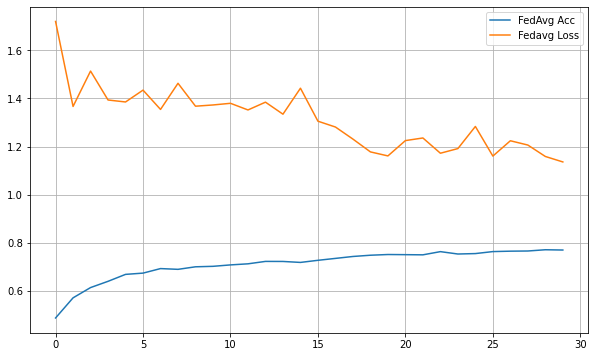

In [12]:
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

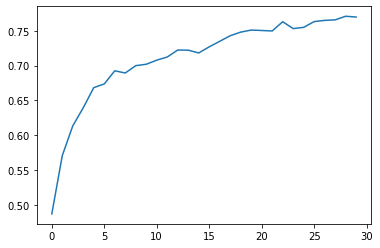

In [13]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [14]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.4870788858996497, 0.5708133323325052, 0.6134977784421709, 0.639501111374961, 0.668372220463223, 0.6736177762349446, 0.6924711101584965, 0.6893277764320374, 0.6998844438129002, 0.7018633365631103, 0.7077688892682393, 0.7122711102167765, 0.7223266674412621, 0.7221199995941586, 0.718101108736462, 0.7268866684701708, 0.7348188877105714, 0.7428133335378435, 0.7480044424533844, 0.7509655541843839, 0.7503511097696092, 0.7496422224574619, 0.7629255579577552, 0.7530577792061699, 0.7548633330398135, 0.7631377736727396, 0.7648633340994517, 0.7655899988280402, 0.7707922259966532, 0.7696322189437019] 

[1.720083632734087, 1.3666904860072666, 1.5138039019372727, 1.3934969743092855, 1.385295479827457, 1.4345909198125204, 1.354300965865453, 1.4630034267902374, 1.3677228318320378, 1.3728590832816232, 1.379767542415195, 1.352099768982993, 1.384497876962026, 1.3345017578866747, 1.4425312062104545, 1.3053514646159279, 1.2811312582757737, 1.230942122803794, 1.1776933716403113, 1.1609809948338403, 1.2246